In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm 
from matplotlib import colors as mclr

from scipy import integrate as intg

plt.rc('figure', dpi=300)
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.)
plt.rc('lines',marker='o')

loadDataDirectory = "../data/"

figDirectory = "../figures/"
figDataDirectory = "../figures/data/"
saveFigs = True
saveFigData = False

In [2]:
numrgsteps = 800
lmax = 1.e12
muv = 1.
TBKT = 0.8117147570941106
sigma_TBKT = 0.0066680498211003835
rcoeff = 0.999833309828274

print("lmax = {l:0.0E}".format(l=lmax))

lmax = 1E+12


In [3]:
qs = np.load(loadDataDirectory+"qs.npy")
ws = np.load(loadDataDirectory+"ws.npy")
zs = np.load(loadDataDirectory+"zs.npy")
temps = np.load(loadDataDirectory+"temps.npy")

logls = np.load(loadDataDirectory+"logls.npy")
y_l = np.load(loadDataDirectory+"y_l_vs_tlogl.npy")
eps_l = np.load(loadDataDirectory+"eps_l_vs_tlogl.npy")
nfs = np.load(loadDataDirectory+"nfs_vs_t.npy")
xis = np.load(loadDataDirectory+"xis_vs_t.npy")

eps_b = np.load(loadDataDirectory+"eps_b_vs_tqw.npy")
eps_f = np.load(loadDataDirectory+"eps_f_vs_tqw.npy")
eps = np.load(loadDataDirectory+"eps_vs_tqw.npy")

noise = np.load(loadDataDirectory+"noise_vs_tzw.npy")

numqs = len(qs)
numws = len(ws)
numzs = len(zs)
numtemps = len(temps)

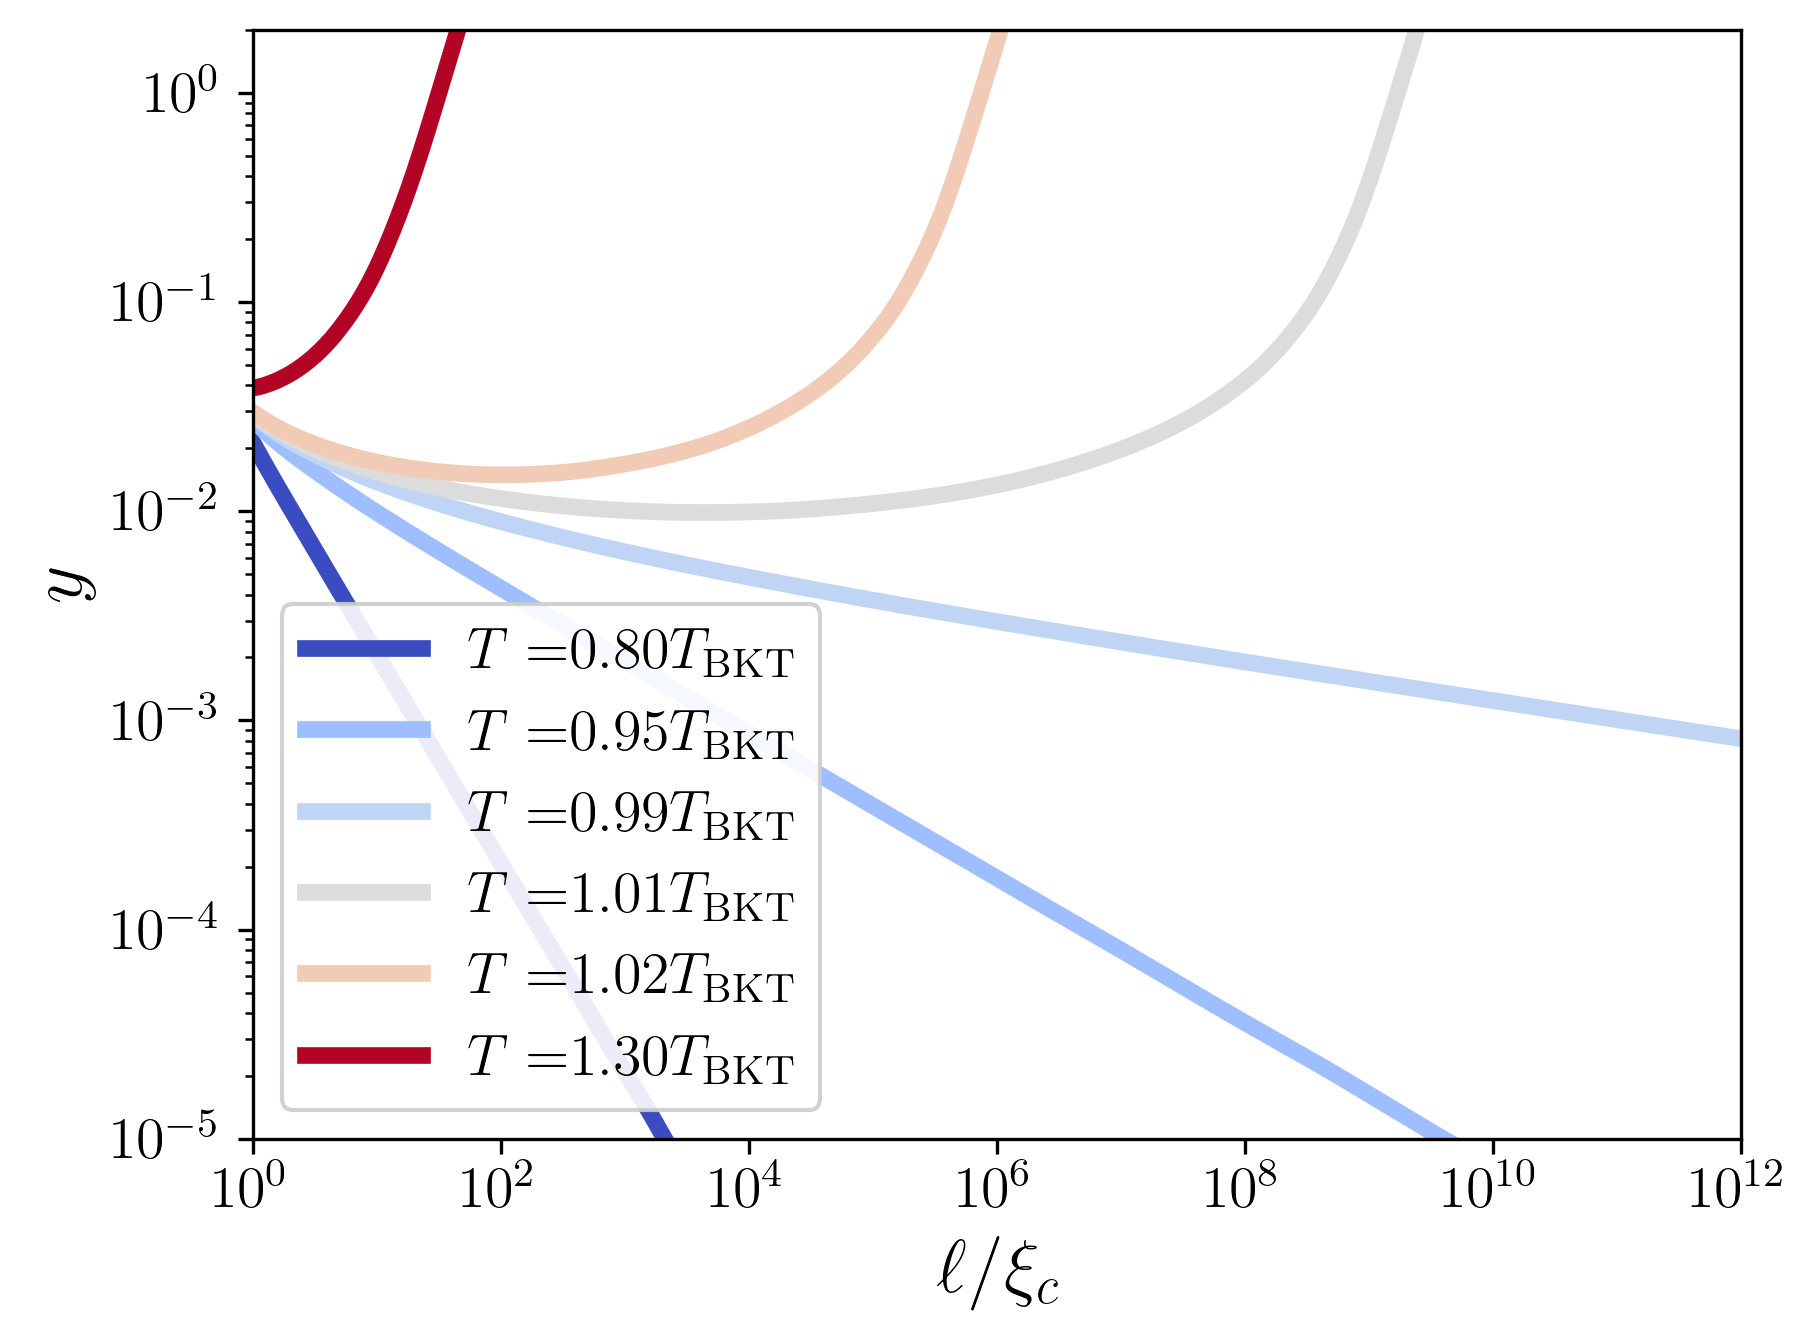

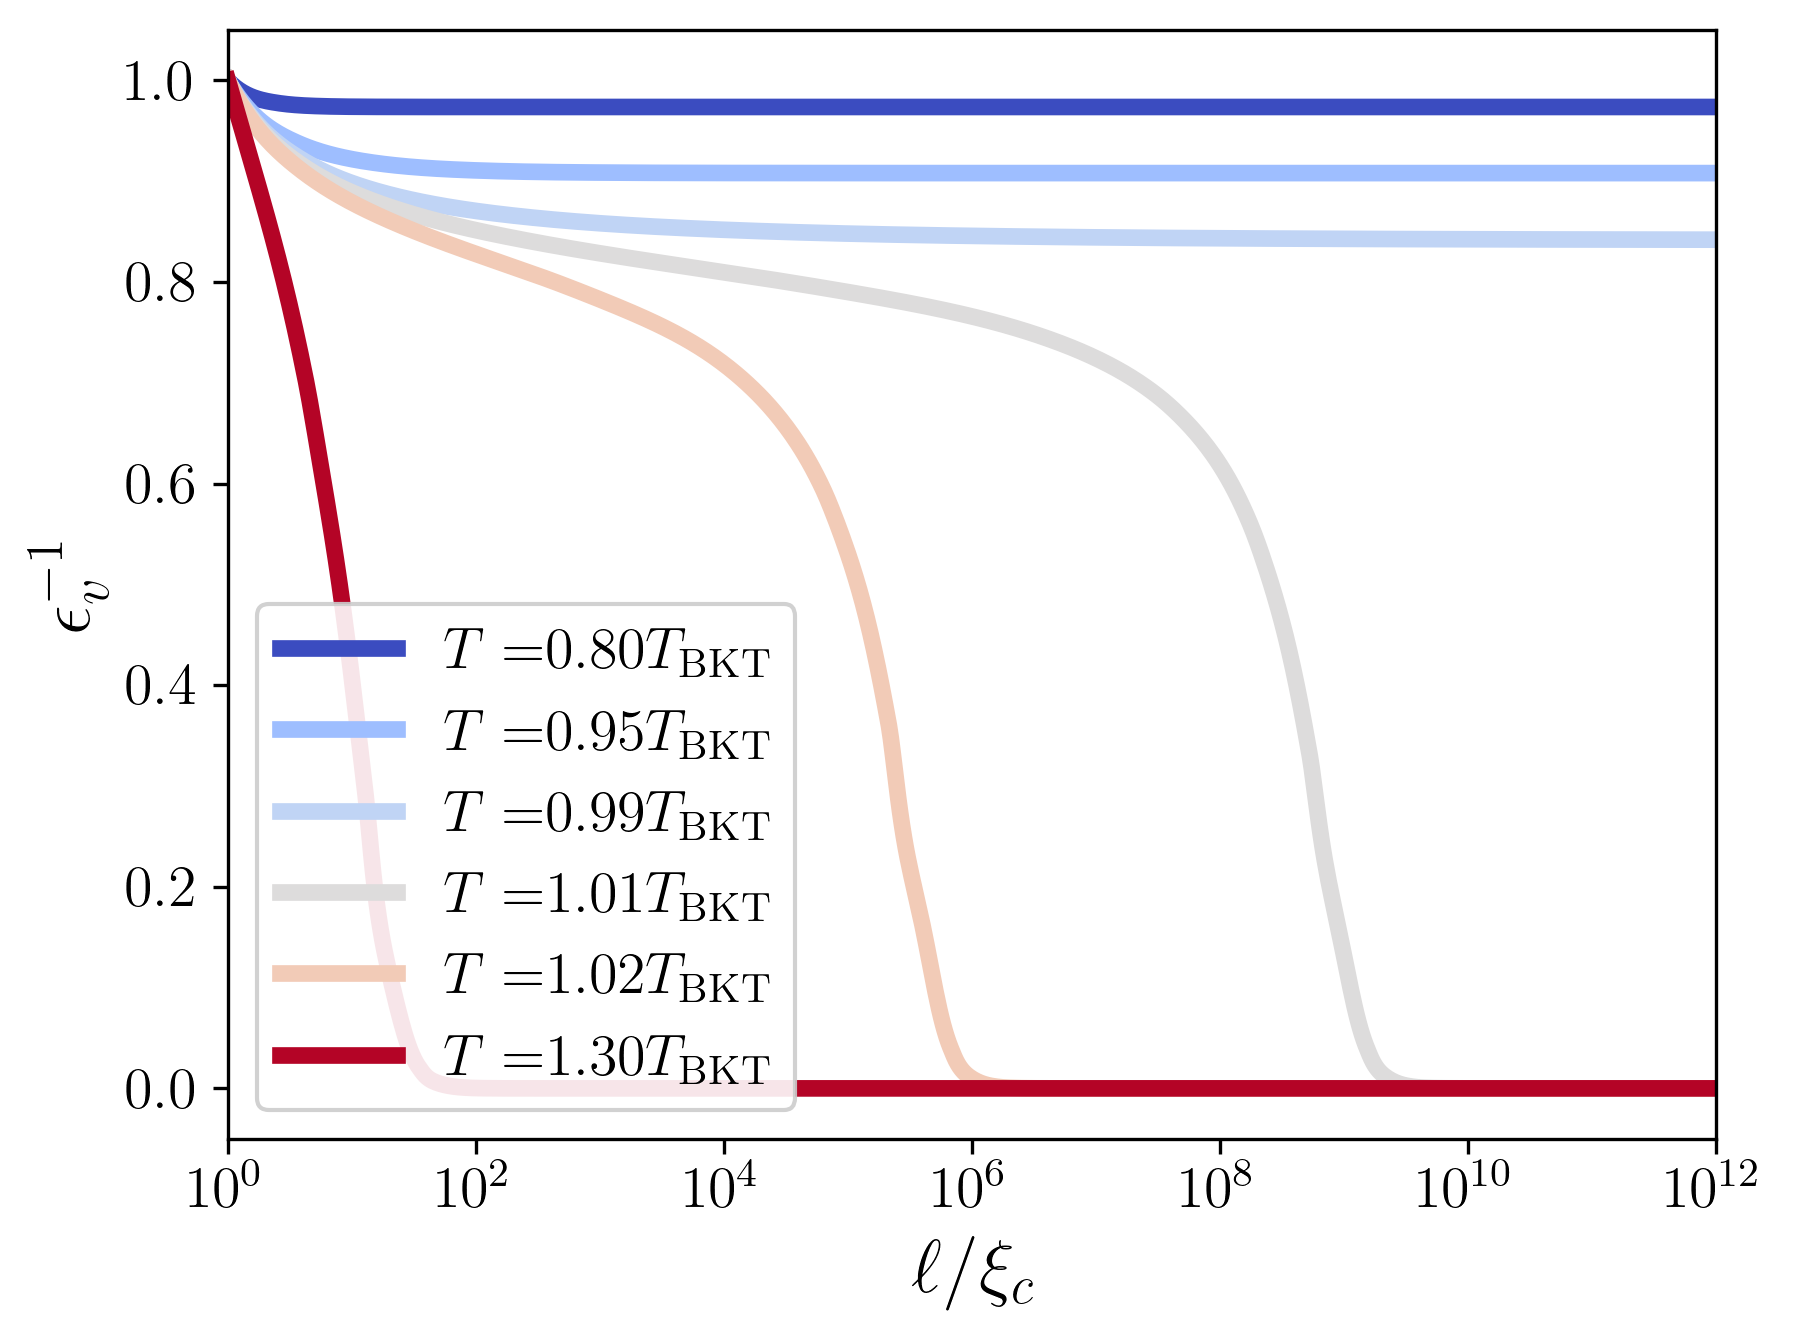

In [4]:
tindxs = [0,12,15,16,17,-1]
nplot = len(tindxs)

cs = cm.coolwarm([0.,.3,.4,.5,.6,1.])
for nt in range(nplot):
    tindx = tindxs[nt]
    plt.plot(np.exp(logls),y_l[tindx,:],color=cs[nt],label=r'$T = $'+"{ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)

plt.legend(loc='lower left',framealpha=0.9)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$y$')
plt.xlabel(r'$\ell/\xi_c$')
plt.ylim(1e-5,2e0)
plt.xlim(1,1e12)

if saveFigs:
    plt.savefig(figDirectory+"y_vs_ell.pdf",bbox_inches='tight')
plt.show()

for nt in range(nplot):
    tindx = tindxs[nt]
    plt.plot(np.exp(logls),1./eps_l[tindx,:],color=cs[nt],label=r'$T = $'+"{ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)

plt.legend(loc='lower left',framealpha=0.9)
plt.xscale('log')
plt.ylabel(r'$\epsilon_v^{-1}$')
plt.xlabel(r'$\ell/\xi_c$')
plt.xlim(1,1e12)

if saveFigs:
    plt.savefig(figDirectory+"eps_vs_ell.pdf",bbox_inches='tight')
plt.show()


if saveFigData:
    np.savetxt(figDataDirectory+"log_ell.csv",logls,delimiter=",")
    for nt in range(nplot):
            np.savetxt(figDataDirectory+"y_ell_"+"T={ratio:0.02f}".format(ratio=temps[tindxs[nt]]/TBKT)+".csv",y_l[tindxs[nt],:],delimiter=",")
            np.savetxt(figDataDirectory+"eps_ell_"+"T={ratio:0.02f}".format(ratio=temps[tindxs[nt]]/TBKT)+".csv",eps_l[tindxs[nt],:],delimiter=",")



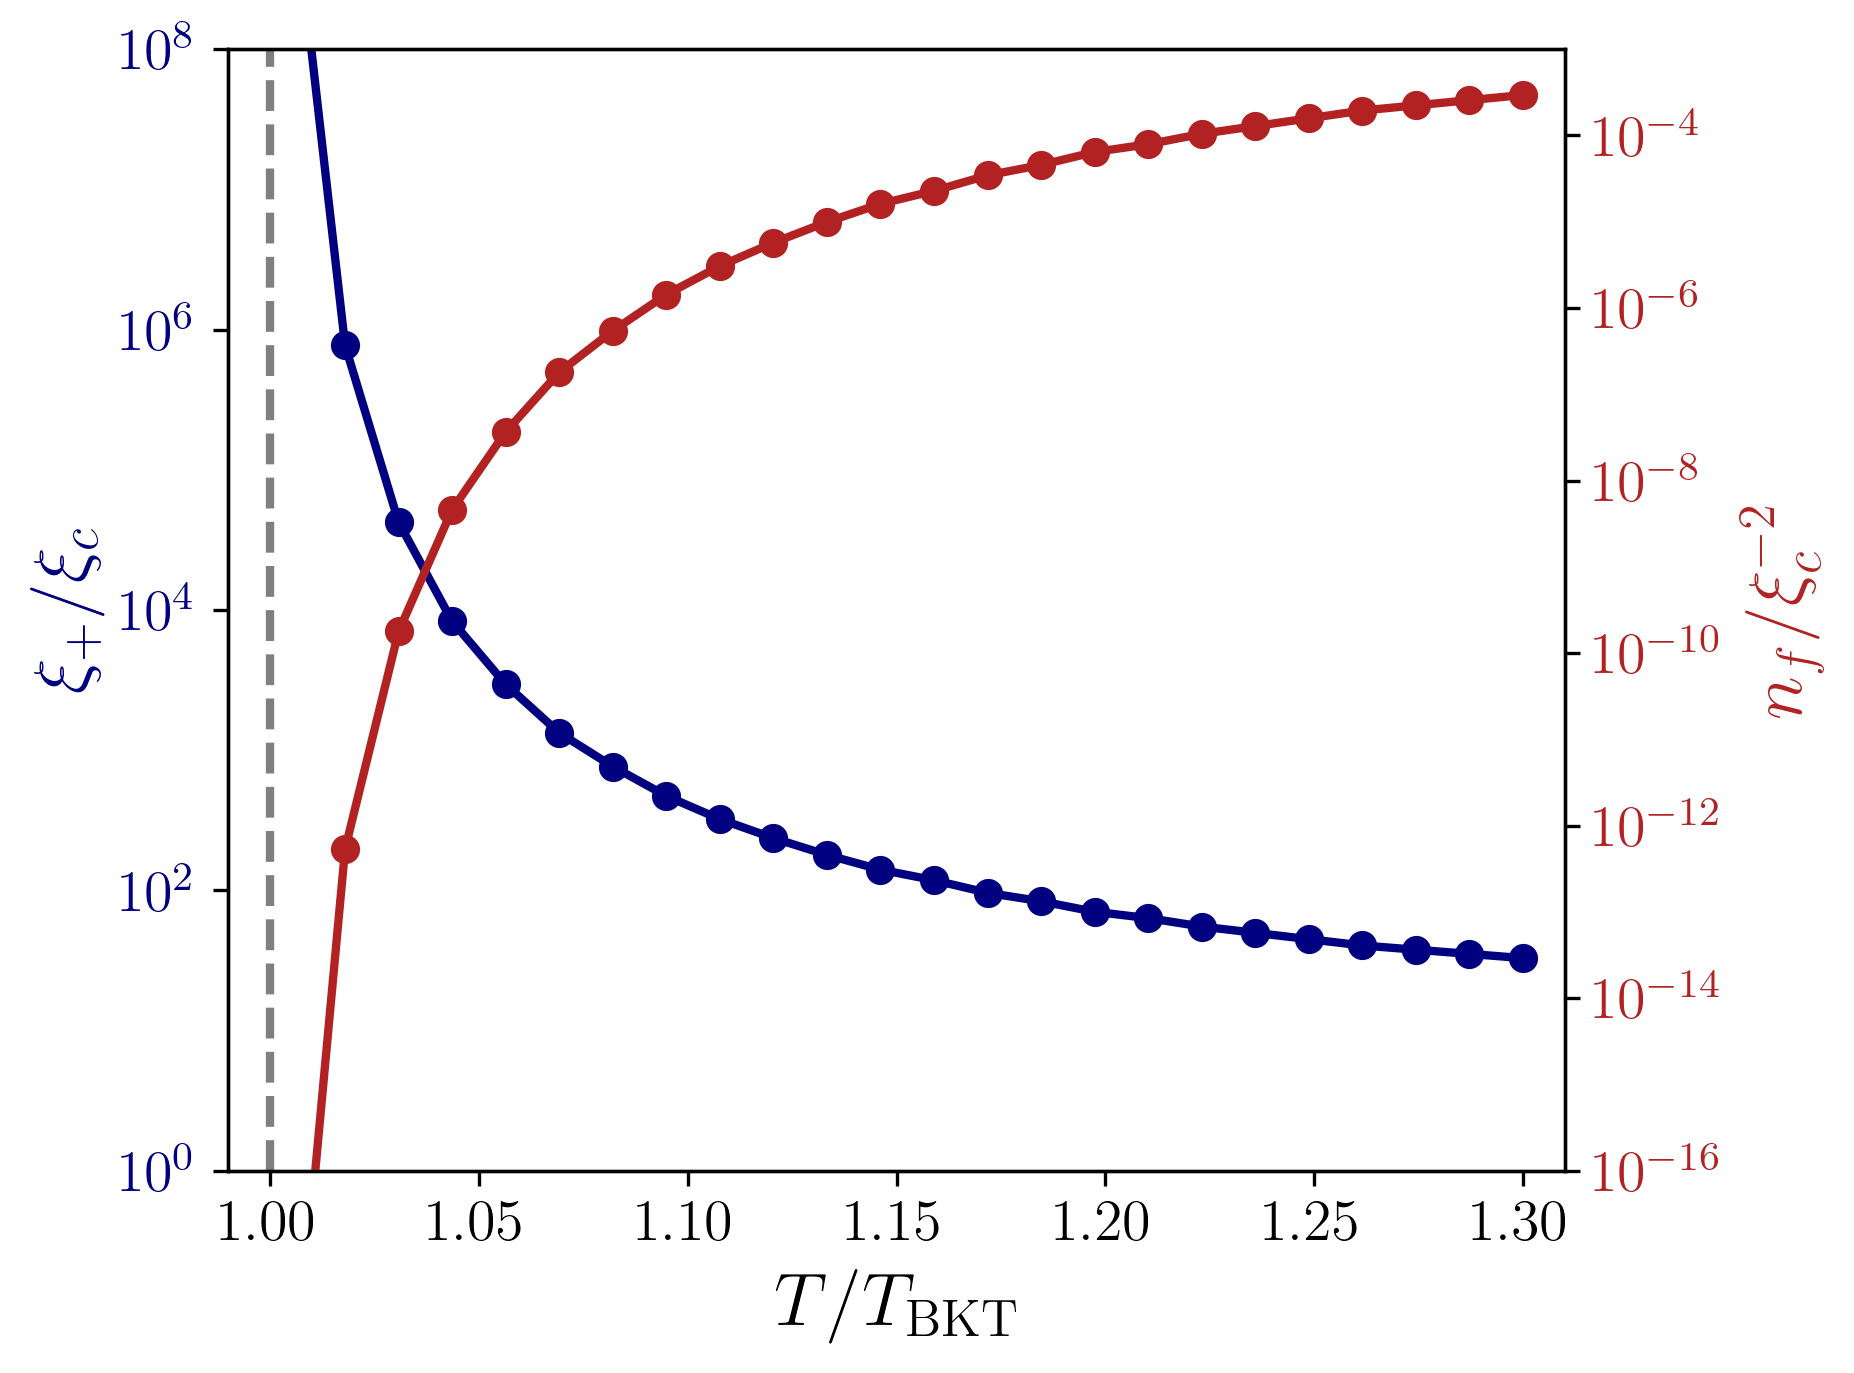

In [5]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$T/T_{\rm BKT}$')
ax1.set_ylabel(r'$\xi_+/\xi_c$',color=mclr.CSS4_COLORS['navy'])
ax1.plot(temps/TBKT,xis,color=mclr.CSS4_COLORS['navy'])
ax1.tick_params(axis='y',labelcolor=mclr.CSS4_COLORS['navy'])
ax1.set_yscale('log')
ax1.set_ylim(1e0,1e8)
ax1.set_xlim(0.99,1.31)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$n_f/\xi_c^{-2}$',color=mclr.CSS4_COLORS['firebrick'])
ax2.plot(temps/TBKT,nfs,color=mclr.CSS4_COLORS['firebrick'])
ax2.tick_params(axis='y',labelcolor=mclr.CSS4_COLORS['firebrick'])
ax2.set_yscale('log')
ax2.set_ylim(1e-16,1e-3)

ax1.axvline(1.,color='gray',linestyle='dashed',marker='none')

fig.tight_layout()

if saveFigs:
    fig.savefig(figDirectory+"xi_nf_vs_temp.pdf",bbox_inches='tight')

if saveFigData:
    np.savetxt(figDataDirectory+"temps.csv",temps/TBKT,delimiter=",")
    np.savetxt(figDataDirectory+"nf.csv",nfs,delimiter=",")
    np.savetxt(figDataDirectory+"xi.csv",xis,delimiter=",")


1e-25


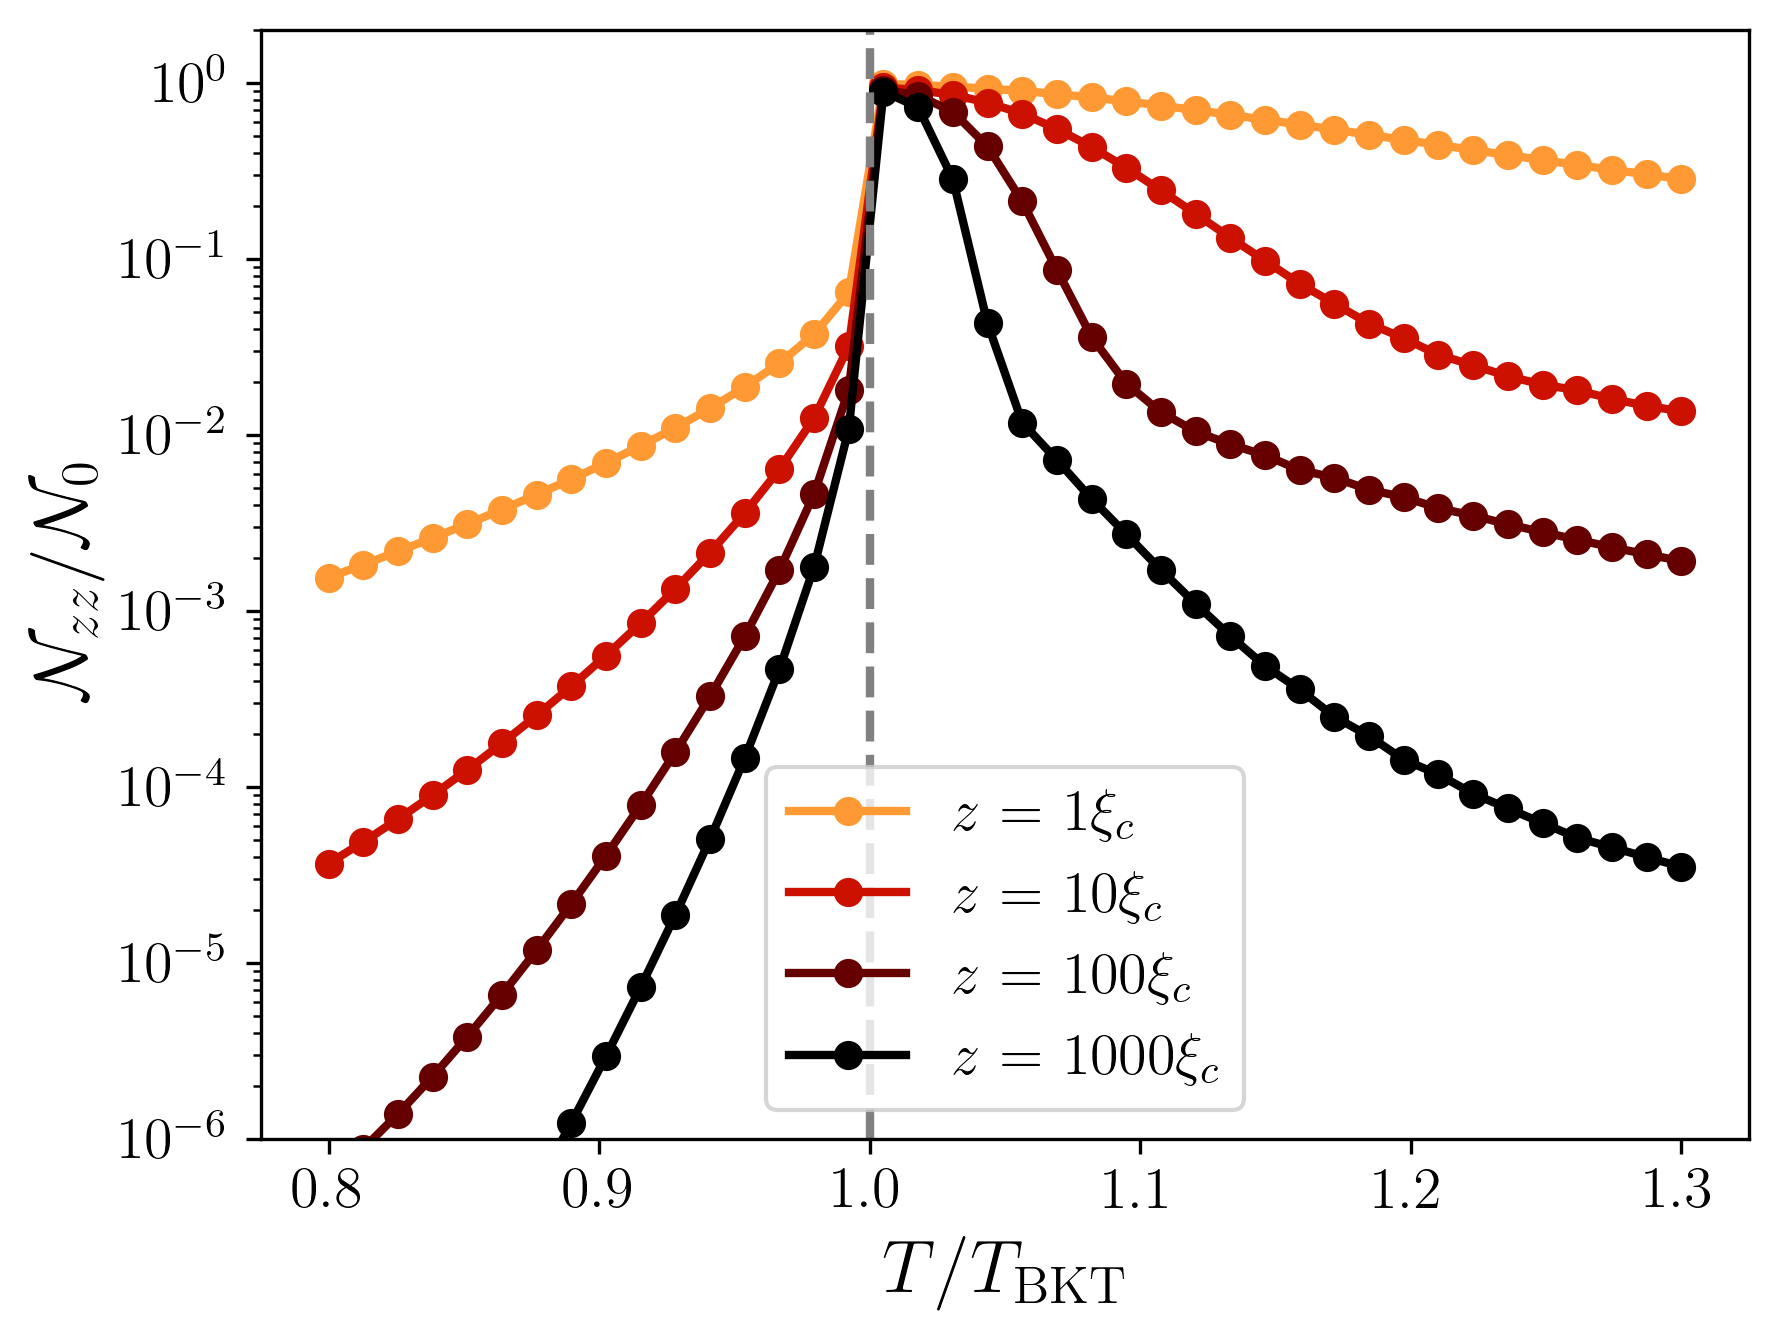

1e-08


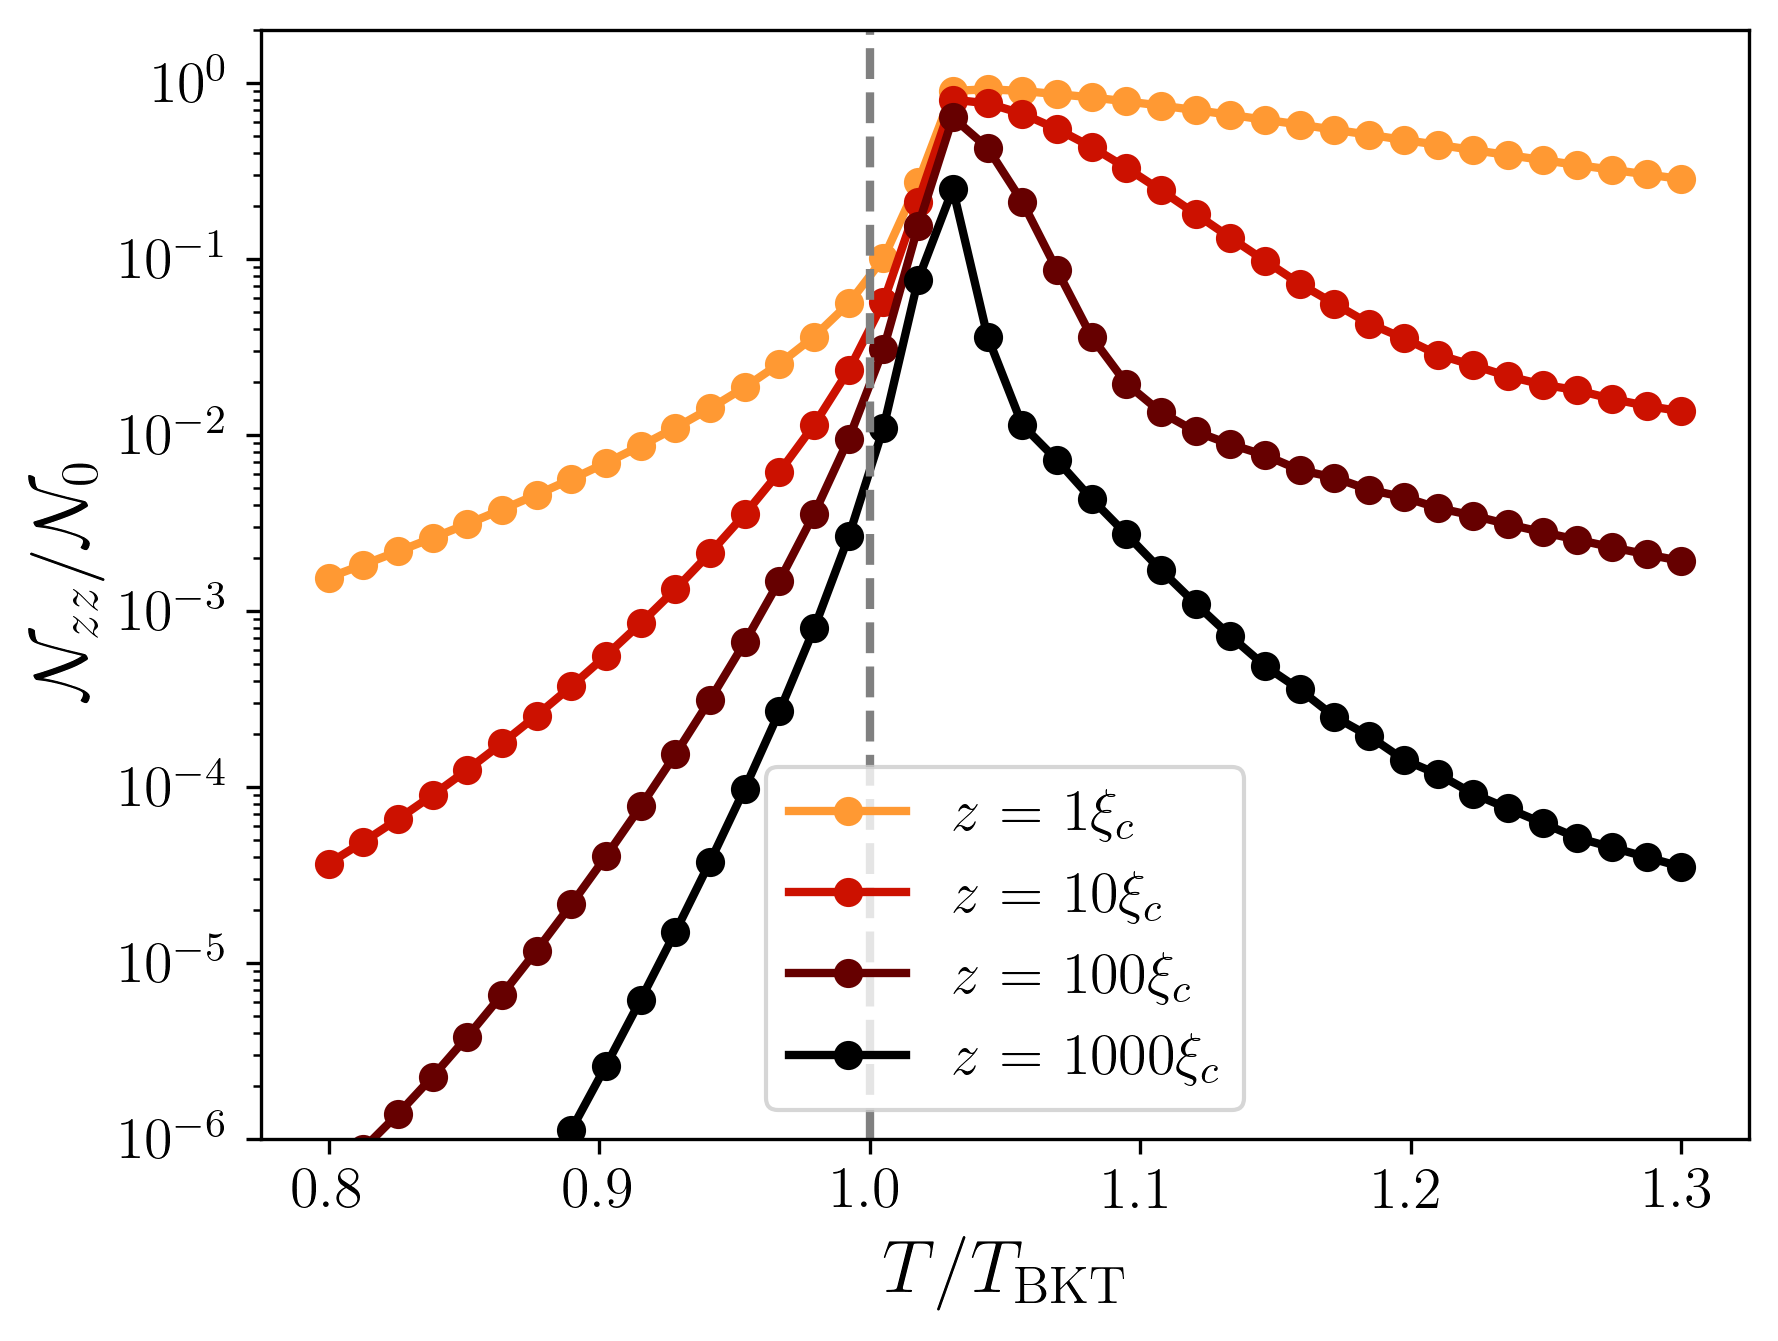

1.0000000000000003e-05


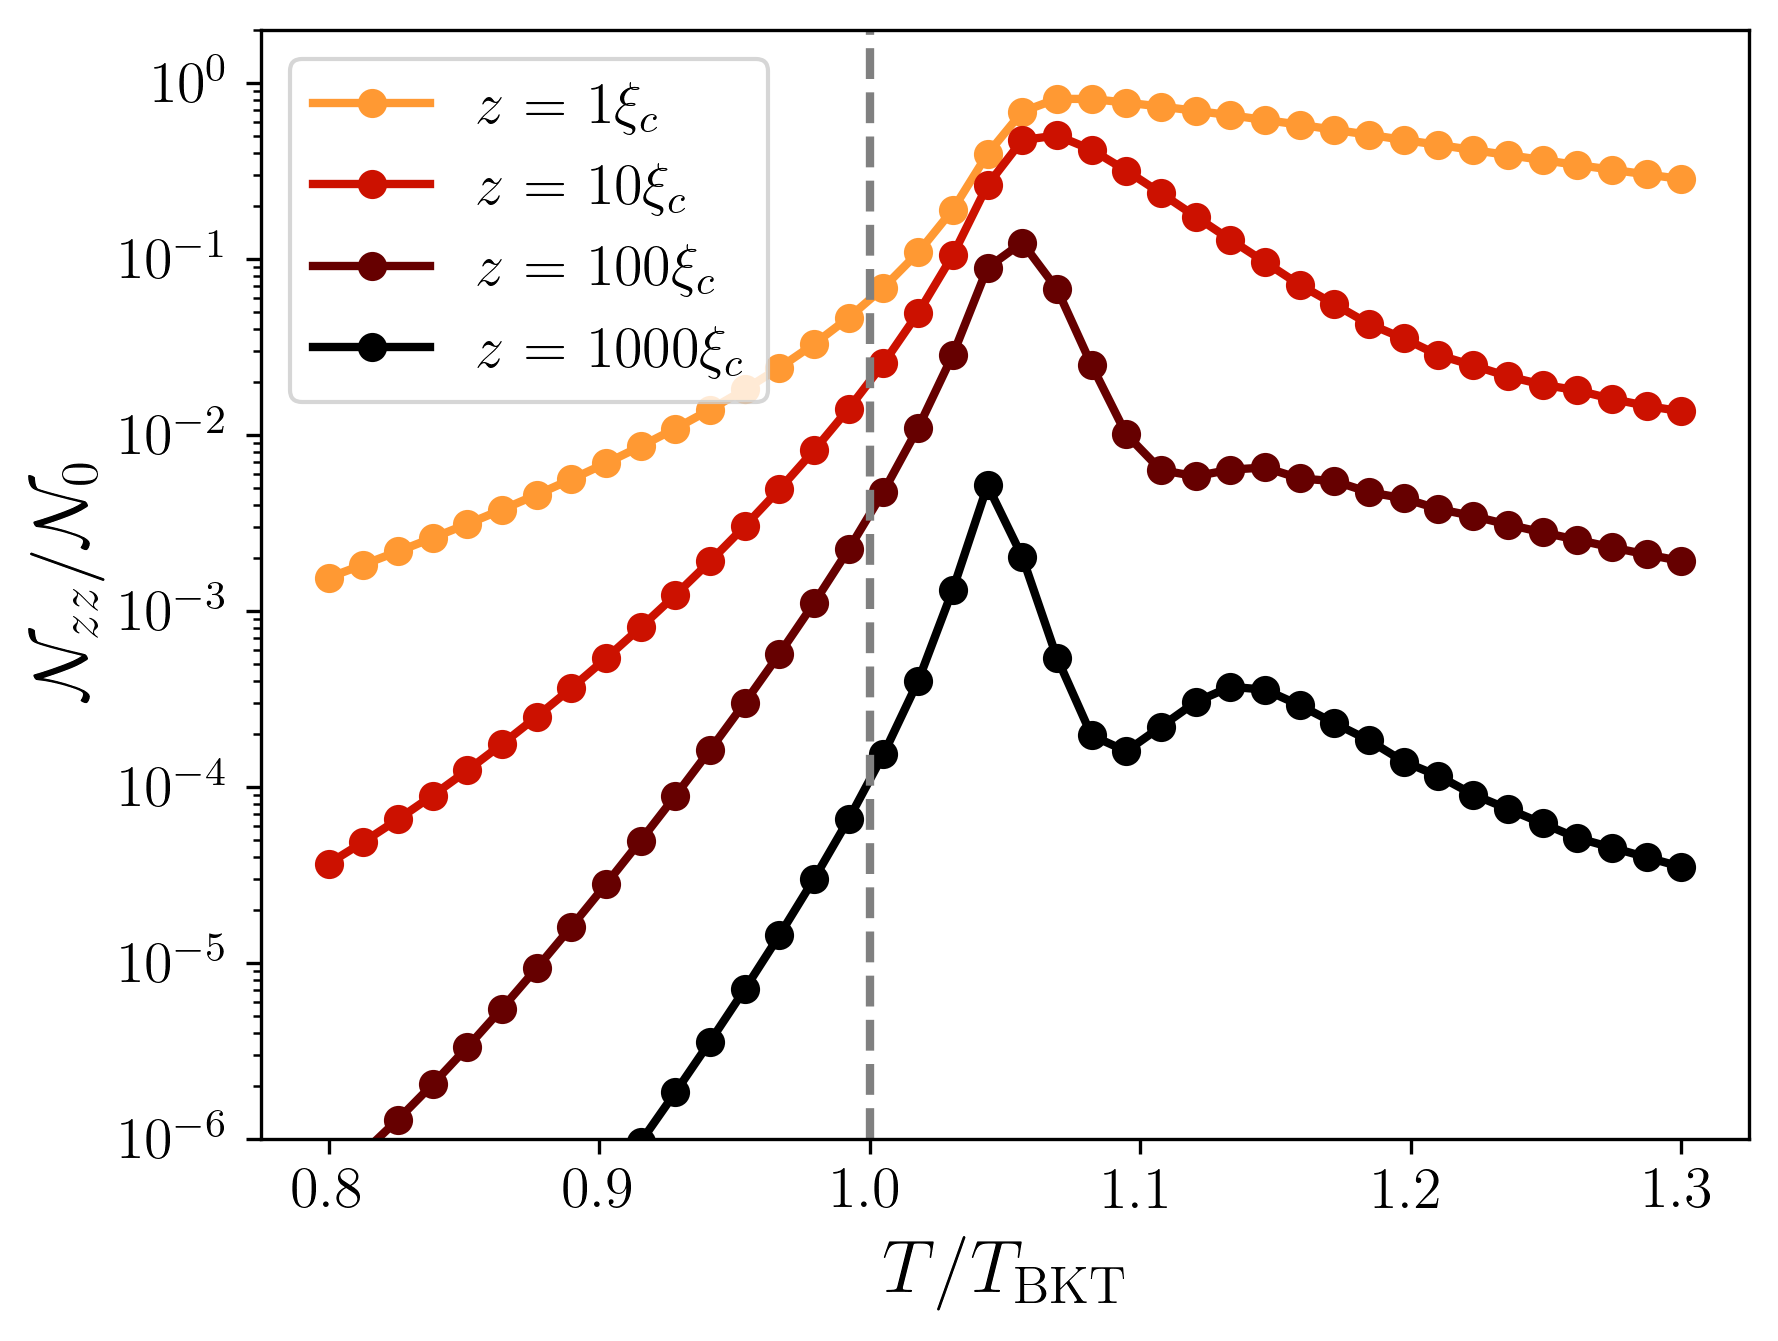

In [6]:
zindx = [0,3,6,9]
zpts = np.array([ zs[n] for n in zindx ])
windx = 0 
print(ws[windx]/(muv*TBKT))
cs = cm.gist_heat(np.linspace(0.8,0.,len(zindx)))

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_c$')
plt.axvline(1.,linestyle='dashed',color='gray',marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.ylim(1.e-6,2.e0)

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()

windx = 1
print(ws[windx]/(muv*TBKT))

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_c$')
plt.axvline(1.,linestyle='dashed',color='gray',marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.ylim(1.e-6,2.e0)

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-8.pdf",bbox_inches='tight')

plt.show()

windx = 7
print(ws[windx]/(muv*TBKT))

for n in range(len(zindx)):
    plt.plot(temps/TBKT,noise[:,zindx[n],windx],color=cs[n],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[n])+r'$\xi_c$')
plt.axvline(1.,linestyle='dashed',color='gray',marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.ylim(1.e-6,2.e0)

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_temp_w=1e-5.pdf",bbox_inches='tight')

plt.show()

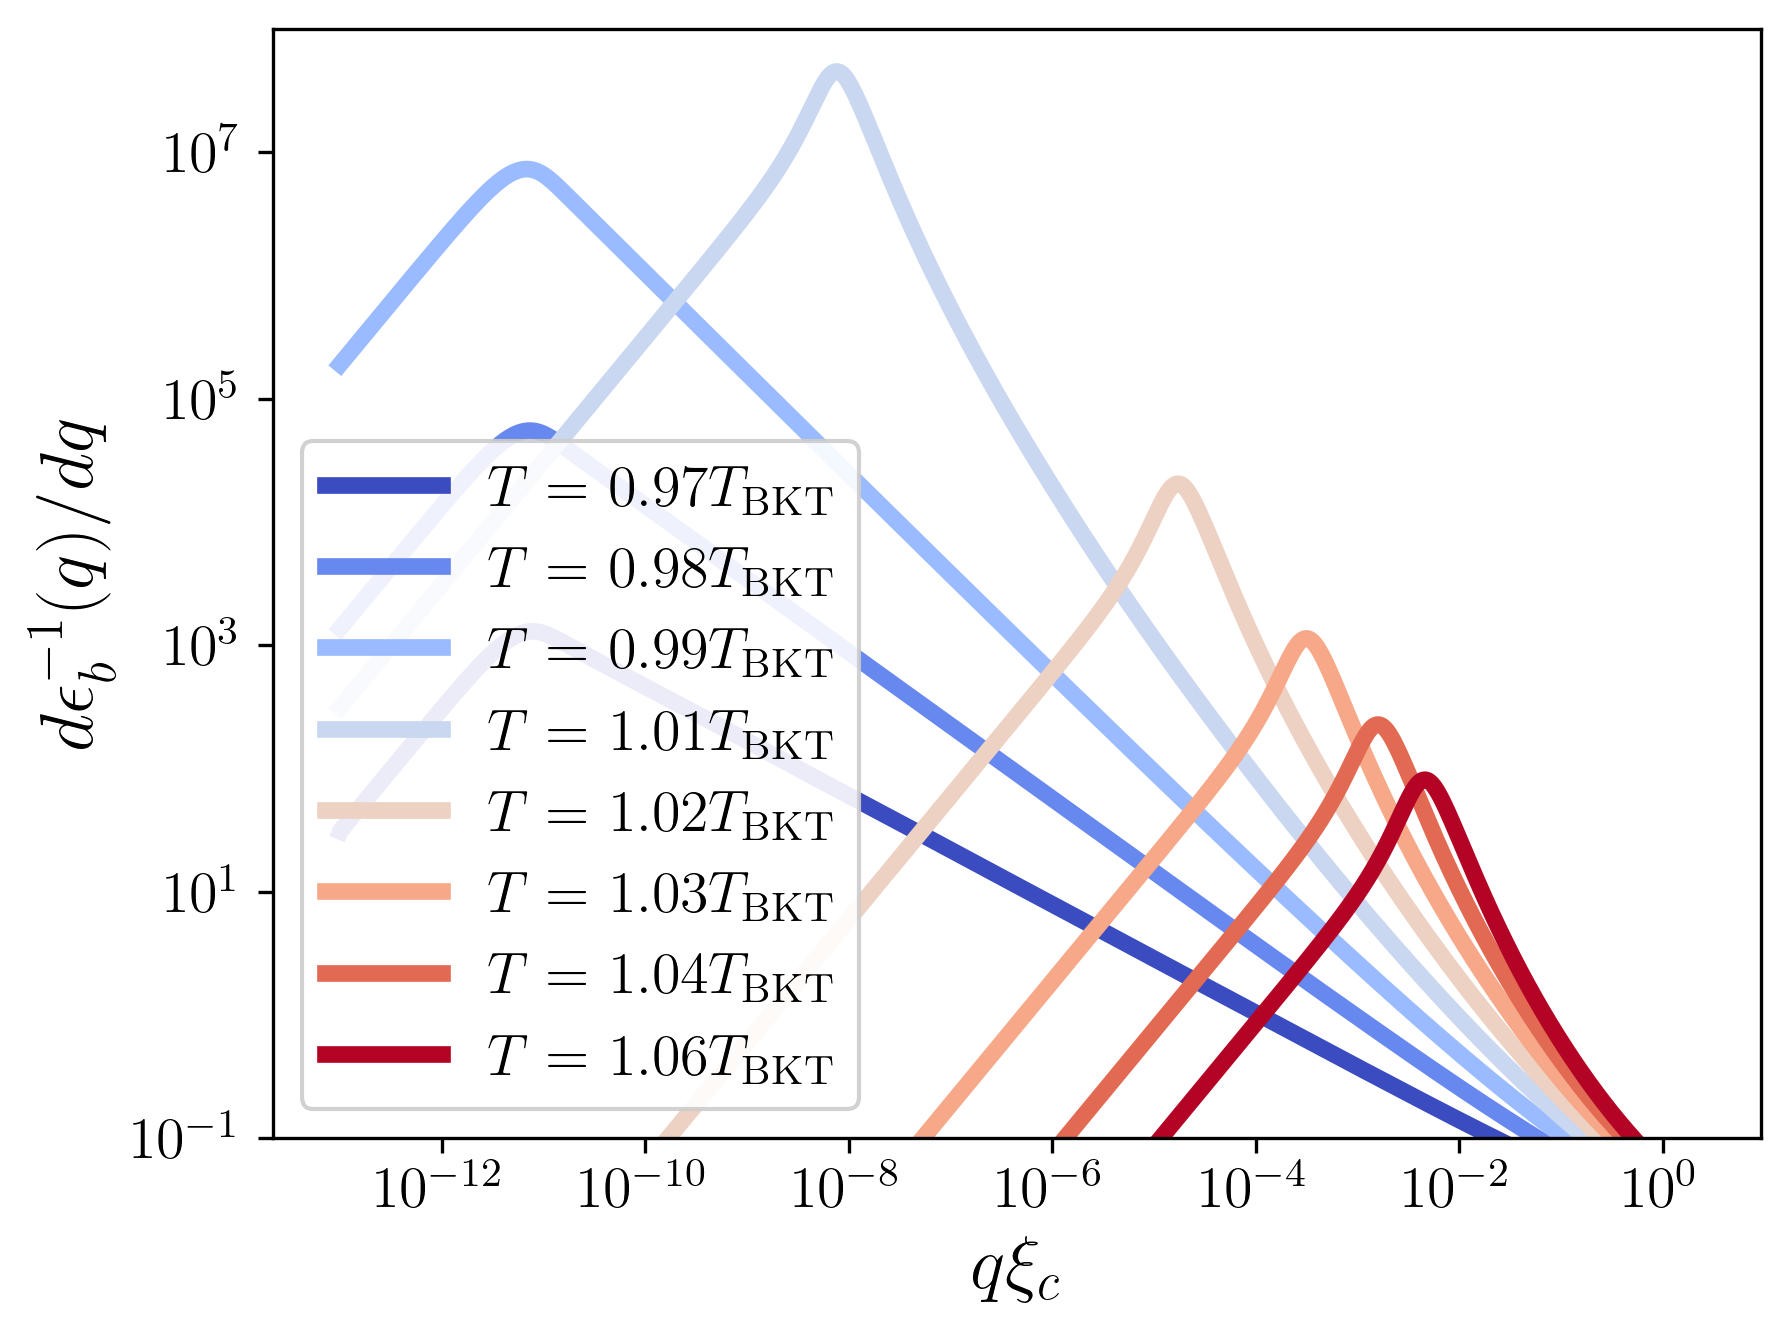

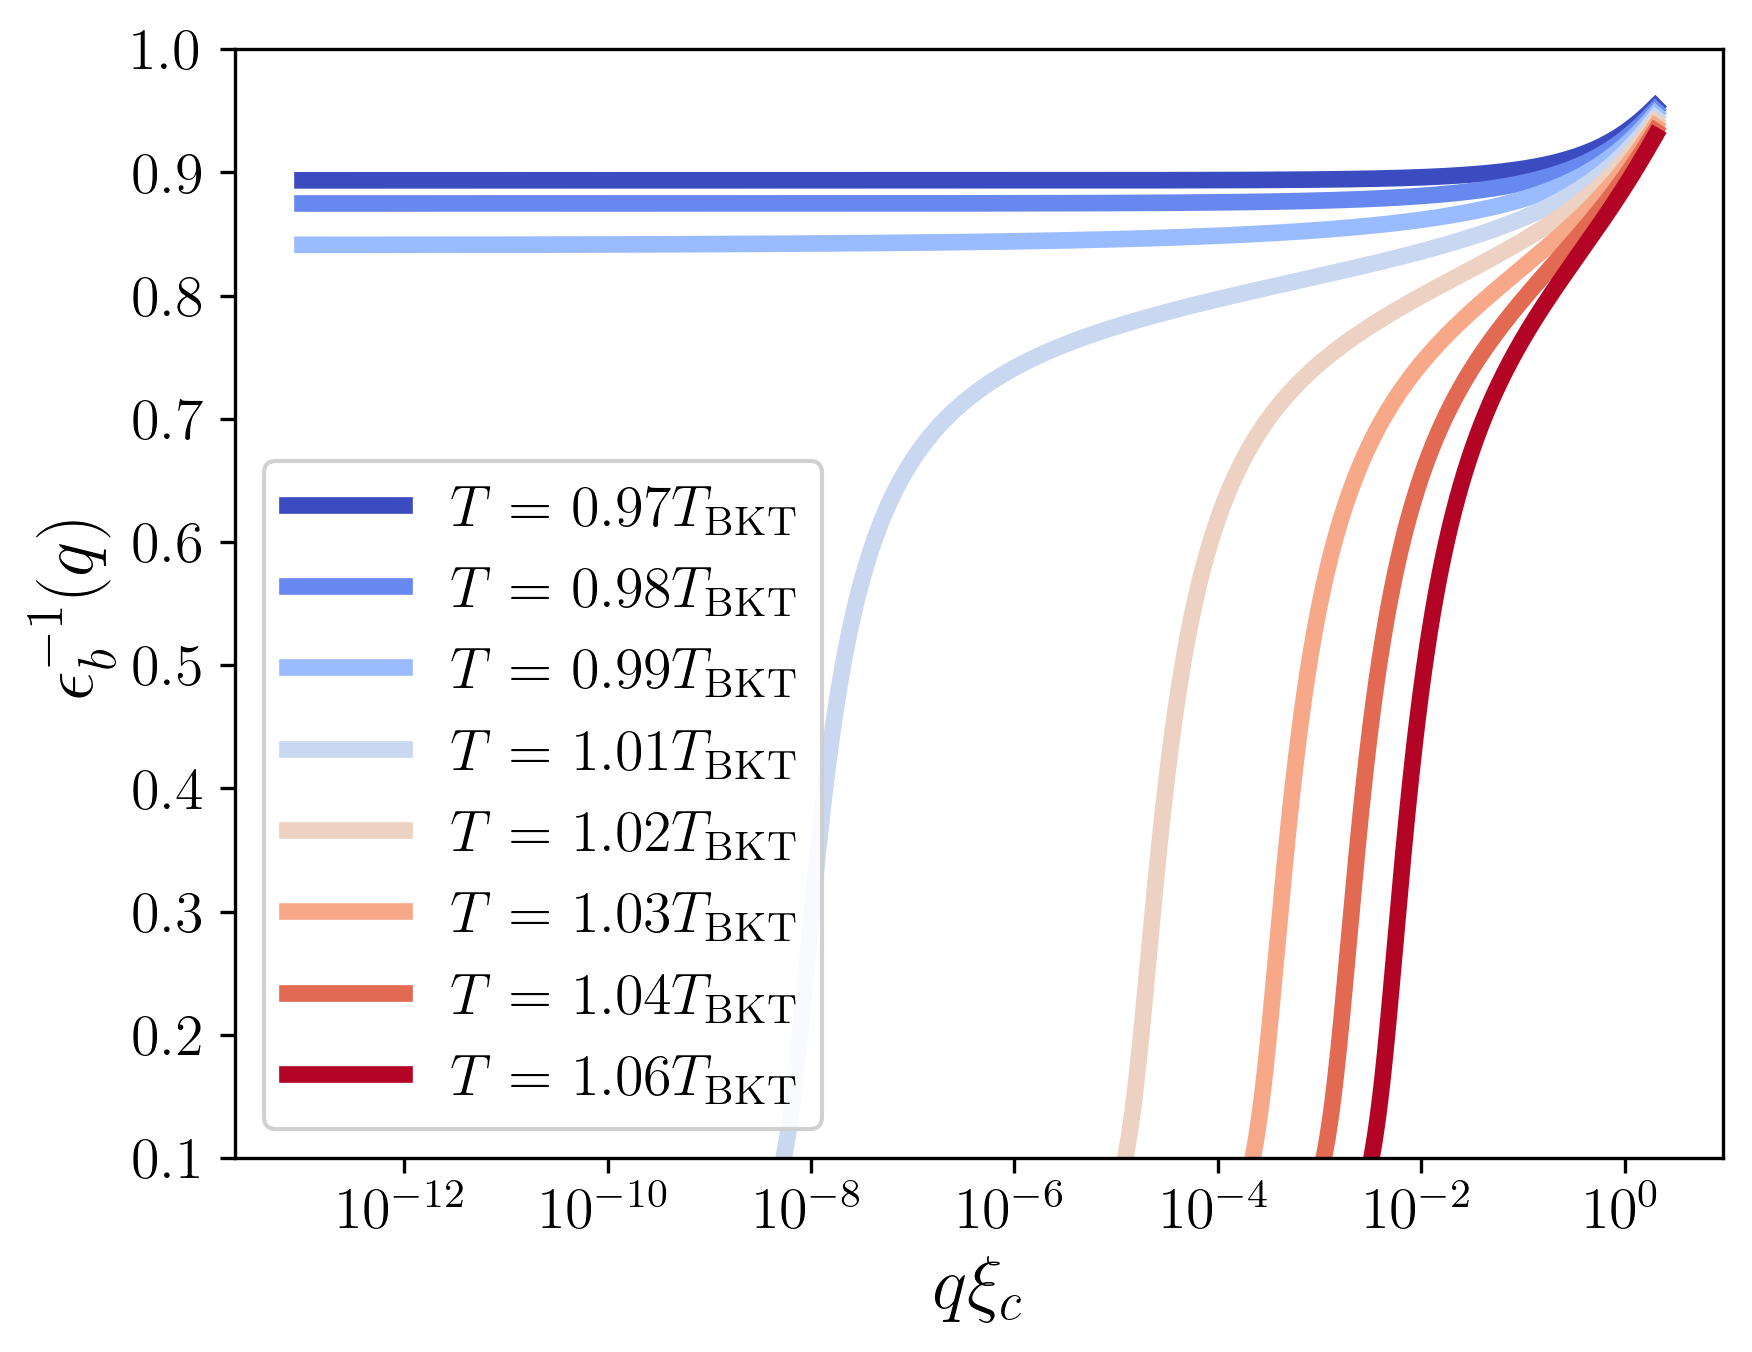

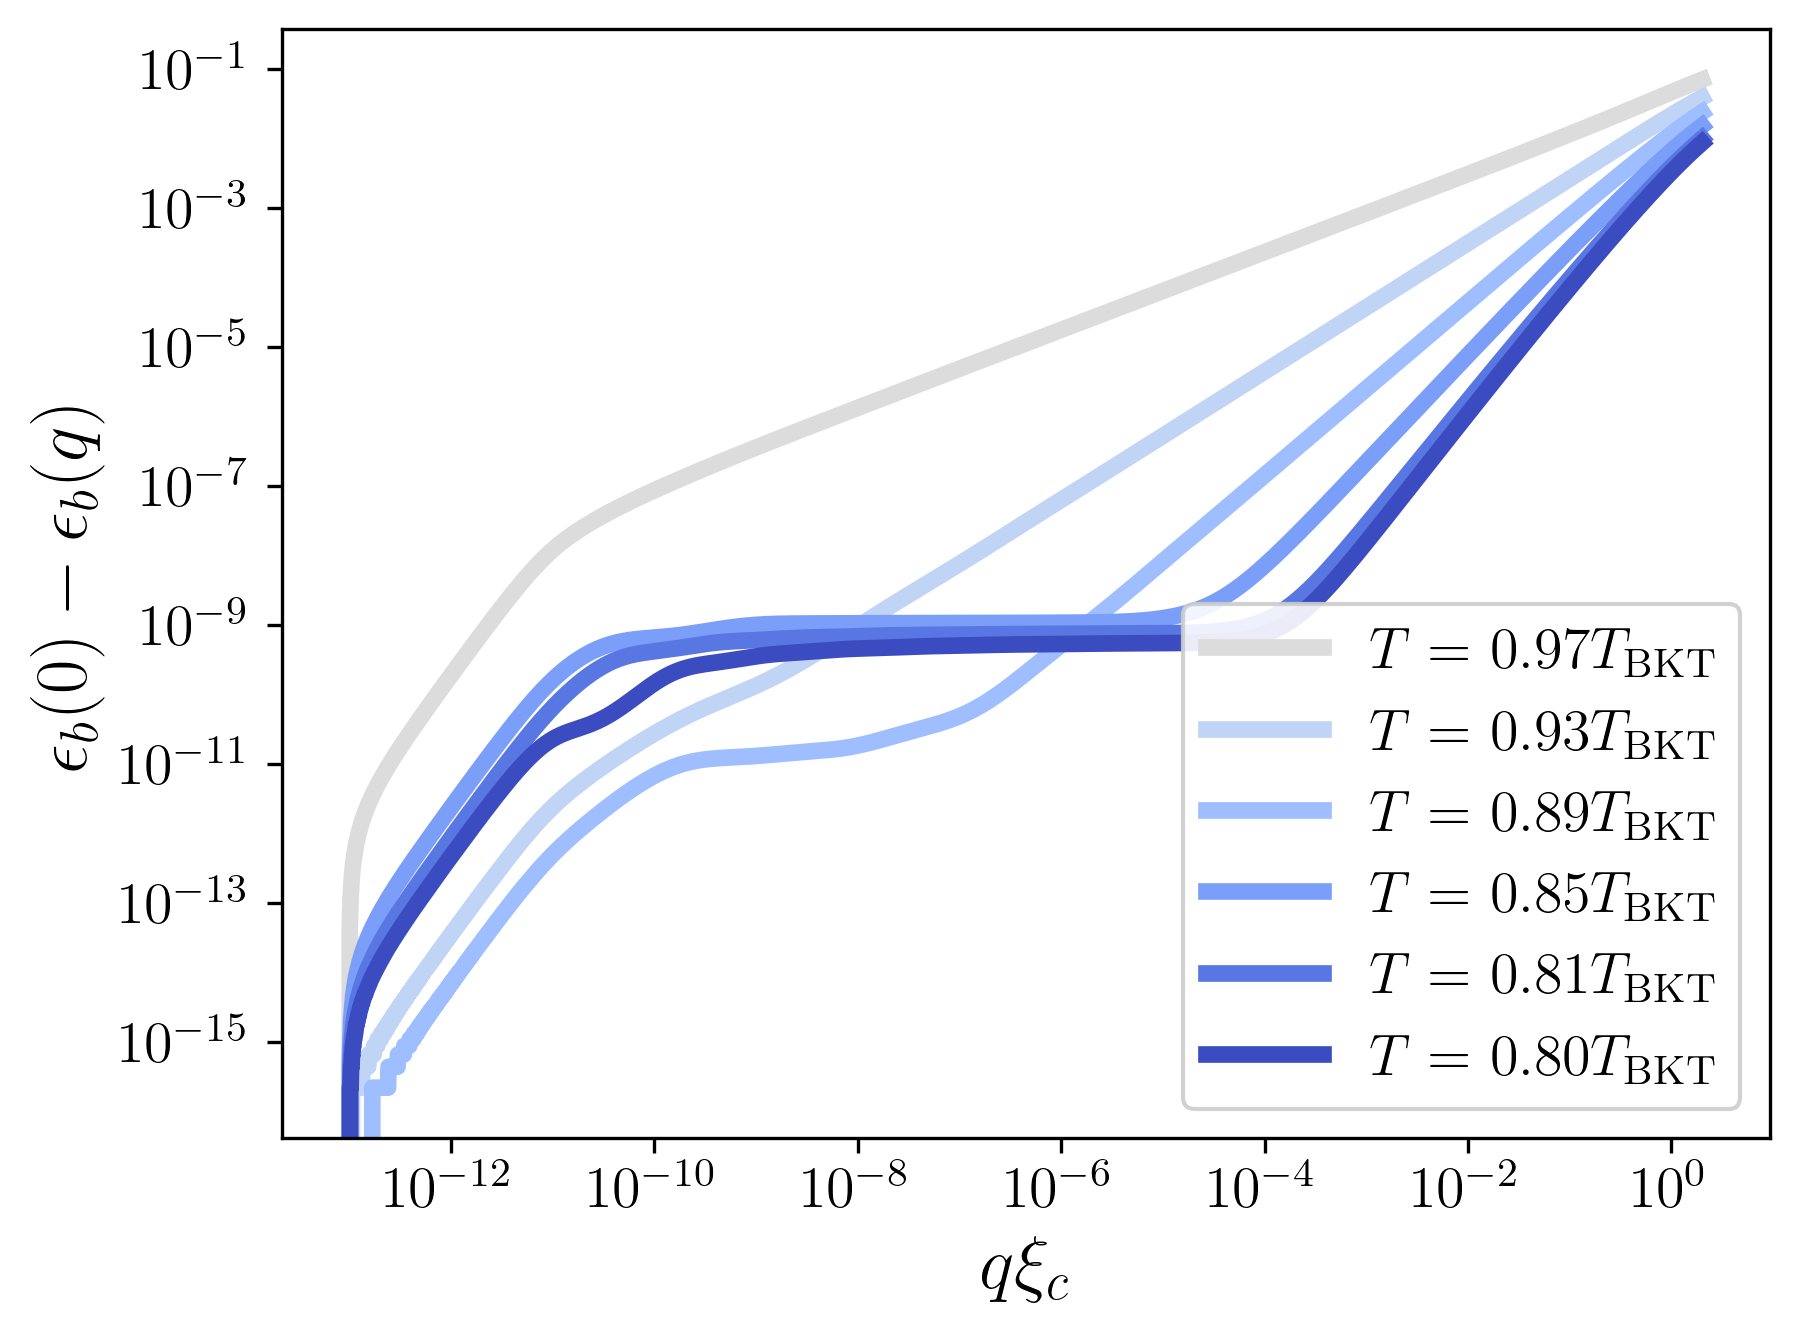

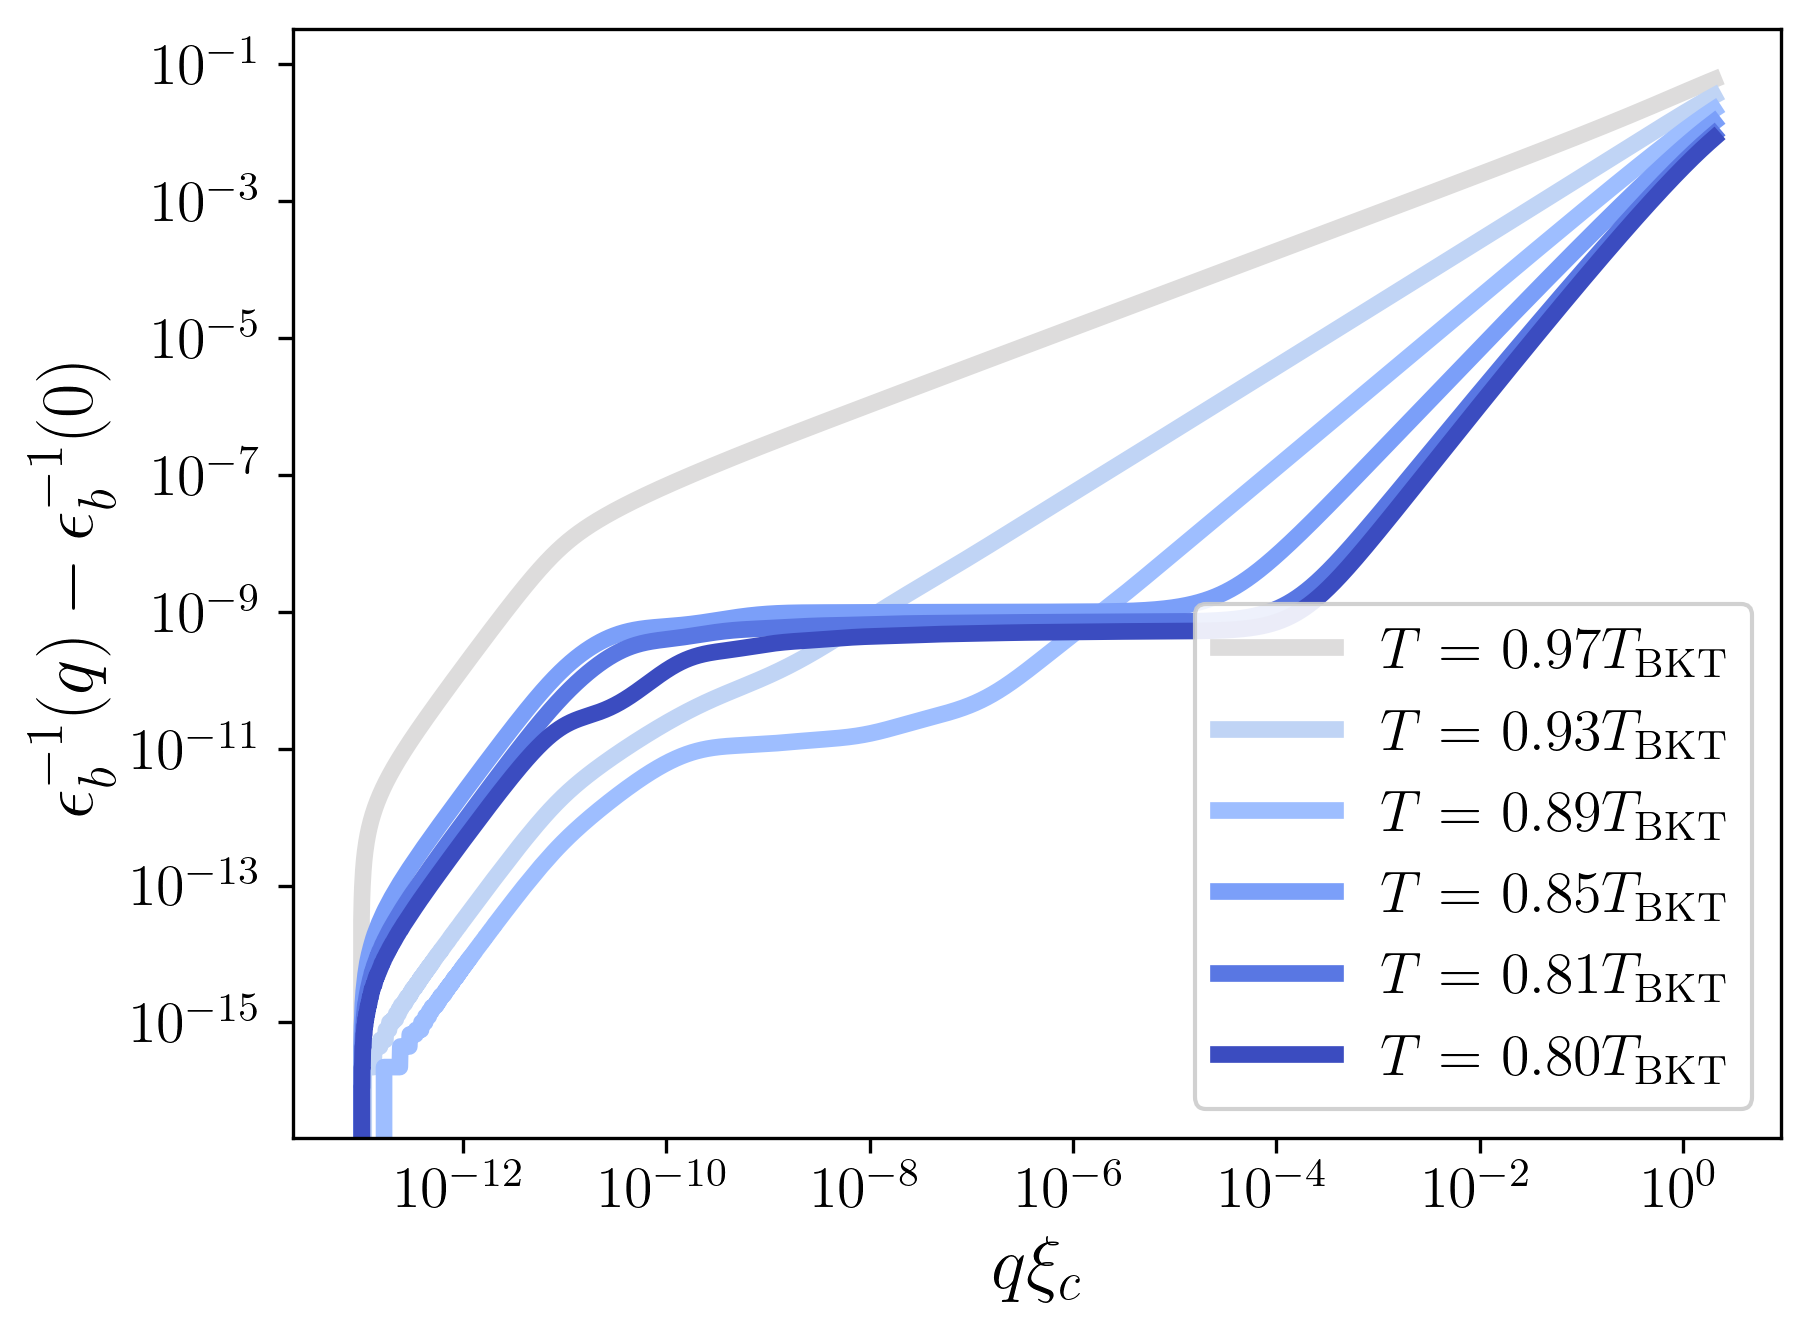

In [7]:
tempindxs = [13,14,15,16,17,18,19,20]
cs = cm.coolwarm(np.linspace(0.,1.,len(tempindxs)))

i = 0
for nt in tempindxs:
    t = temps[nt]
    deriv = np.zeros((numqs -1))
    for nq in range(numqs-1):
        deriv[nq] = (1./np.real(eps_b[nt,nq+1,0]) - 1./np.real(eps_b[nt,nq,0]))/(qs[nq+1]-qs[nq])
    
    plt.plot(qs[:-1],deriv[:],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)
    i+=1
    
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-1,1e8)
plt.xlabel(r'$q\xi_c$')
plt.ylabel(r'$d\epsilon_b^{-1}(q)/dq$')
plt.legend(loc='lower left',framealpha=0.9)


if saveFigs:
    plt.savefig(figDirectory+"depsinvdq.pdf",bbox_inches='tight')

plt.show()  


i = 0
for nt in tempindxs:
    t = temps[nt]
    plt.plot(qs[:],1./np.real(eps_b[nt,:,0]),color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)
    i+=1
    
#plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$q\xi_c$')
plt.ylabel(r'$\epsilon_b^{-1}(q)$')
plt.legend(loc='lower left',framealpha=0.9)
plt.ylim(1.e-1,1.)


if saveFigs:
    plt.savefig(figDirectory+"epsinv_q.pdf",bbox_inches='tight')

plt.show()  

if saveFigData:
    np.savetxt(figDataDirectory+"qs.csv",qs,delimiter=",")
    for nt in tempindxs:
        np.savetxt(figDataDirectory+"eps_b_q="+"{ratio:0.02f}".format(ratio=temps[nt]/TBKT)+".csv",np.real(eps_b[nt,:,0]),delimiter=",")

tempindxs = [13,10,7,4,1,0]

cs = cm.coolwarm(np.linspace(0.5,0.,len(tempindxs)))

i = 0
for nt in tempindxs:
    t = temps[nt]
    plt.plot(qs[:],np.real(eps_b[nt,0,0])-np.real(eps_b[nt,:,0]),color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)
    i+=1
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$q\xi_c$')
plt.ylabel(r'$\epsilon_b(0)-\epsilon_b(q)$')
plt.legend(framealpha=0.9)

plt.show() 

i = 0
for nt in tempindxs:
    t = temps[nt]
    plt.plot(qs[:],1./np.real(eps_b[nt,:,0])-1./np.real(eps_b[nt,0,0]),color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$',marker='none',linewidth=4.)
    i+=1
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$q\xi_c$')
plt.ylabel(r'$\epsilon_b^{-1}(q) - \epsilon_b^{-1}(0)$')
plt.legend(framealpha=0.9)

plt.show() 

1e-25


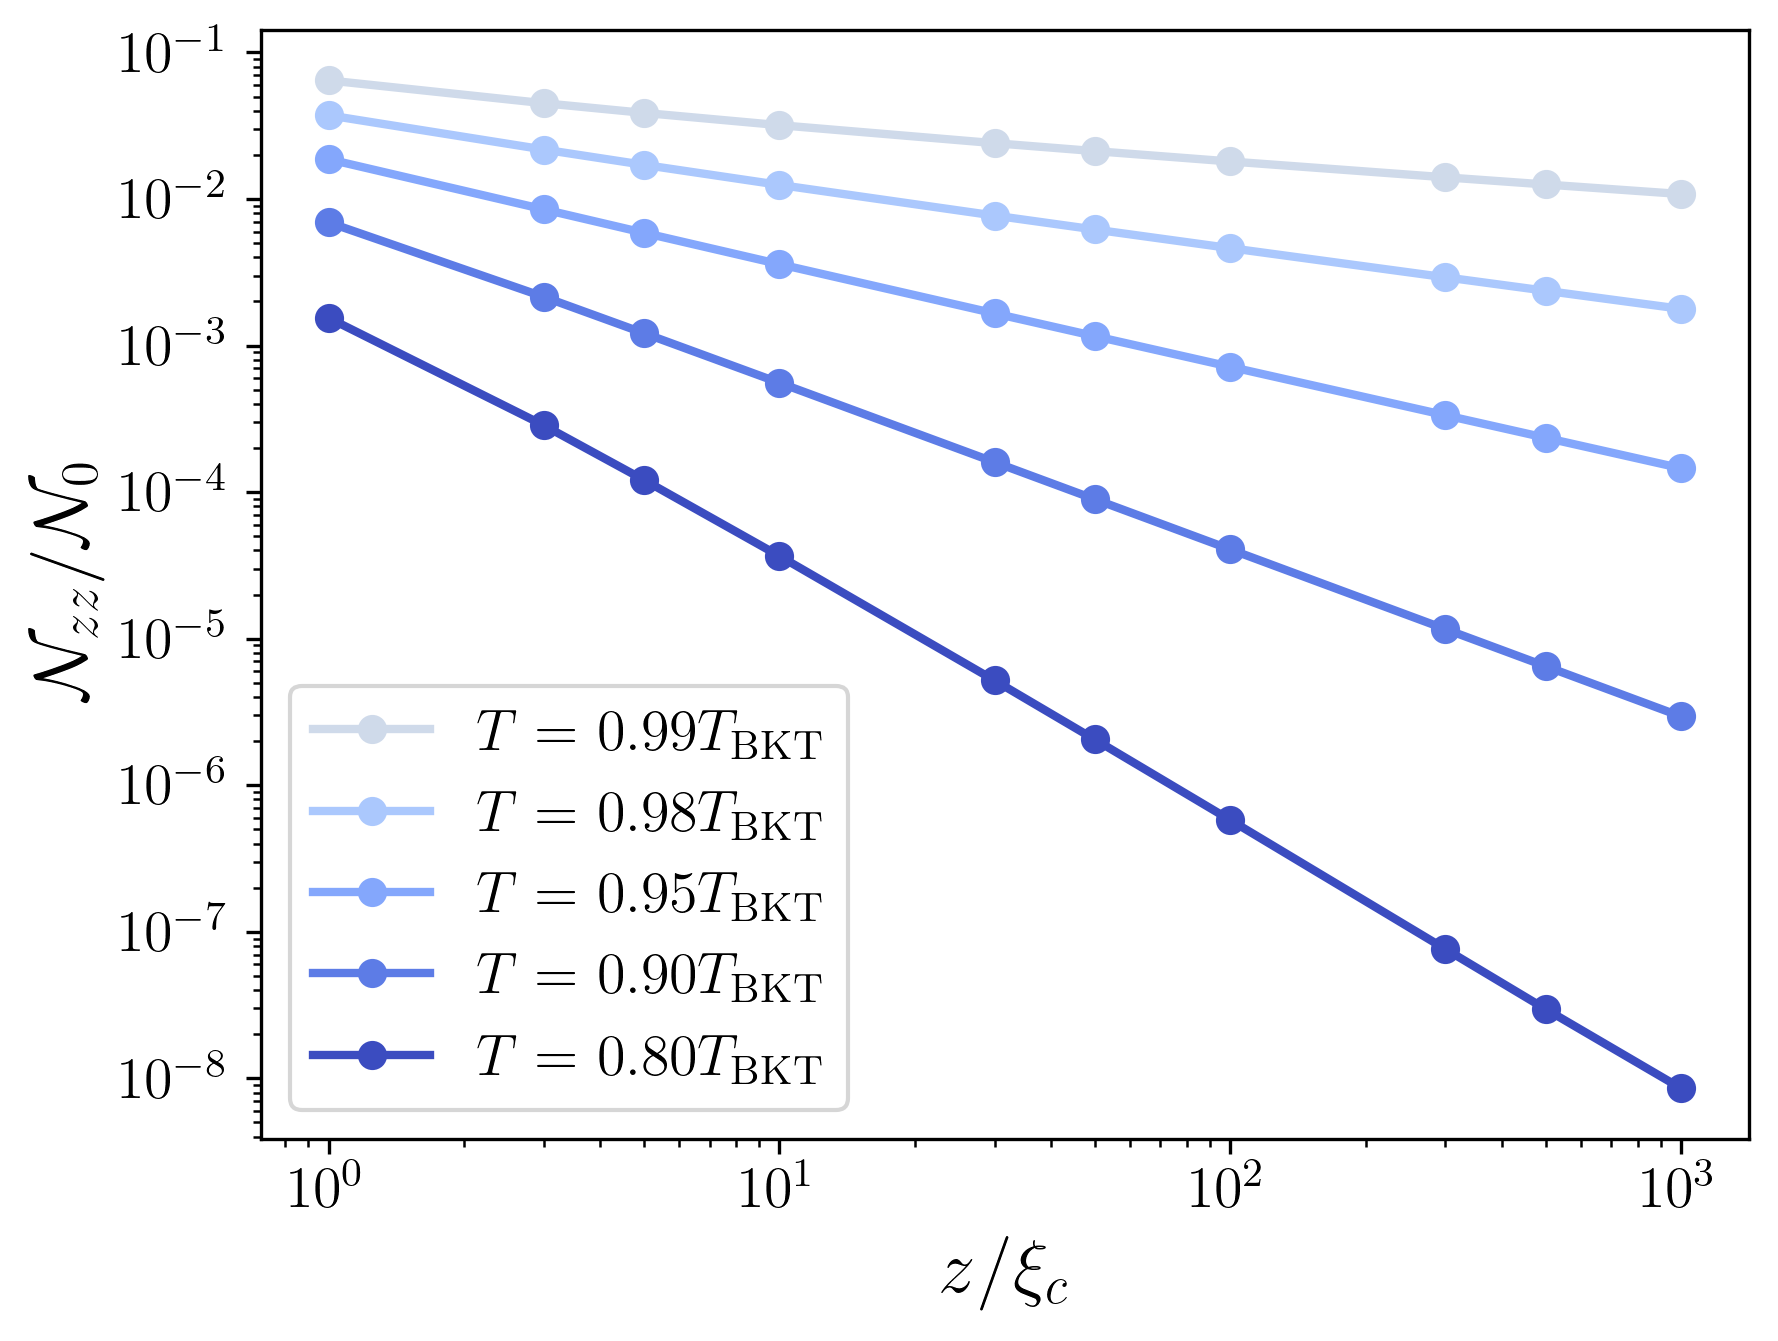

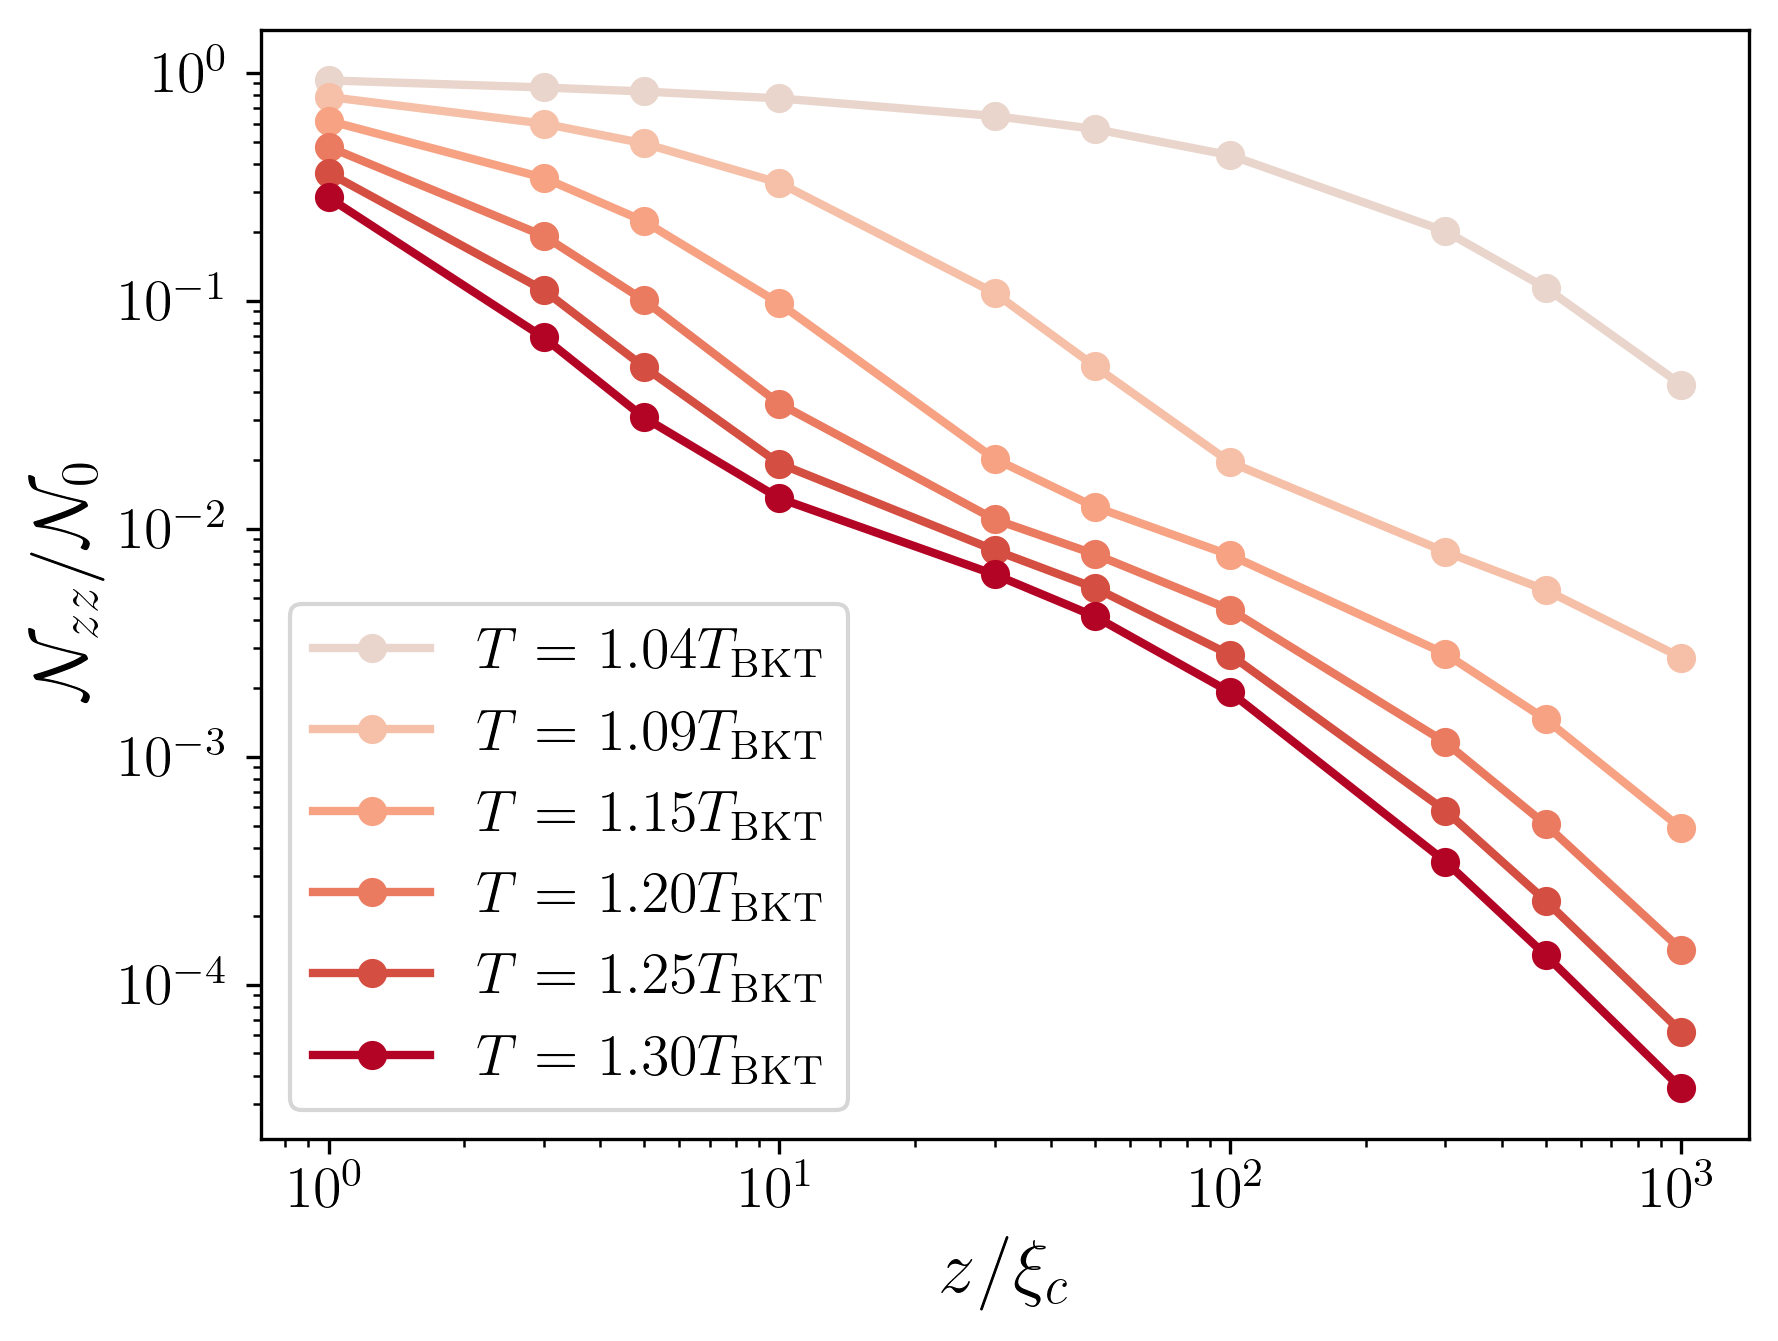

In [8]:
windx = 0
print(ws[windx]/(muv*TBKT))

tindxs = [15,14,12,8,0]
cs = cm.coolwarm(np.linspace(0.,0.45,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1

    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_c$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_low_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()

#############

tindxs = [19,23,27,31,35,39]

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_c$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_high_temp_w=1e-25.pdf",bbox_inches='tight')

plt.show()


1.0000000000000003e-05


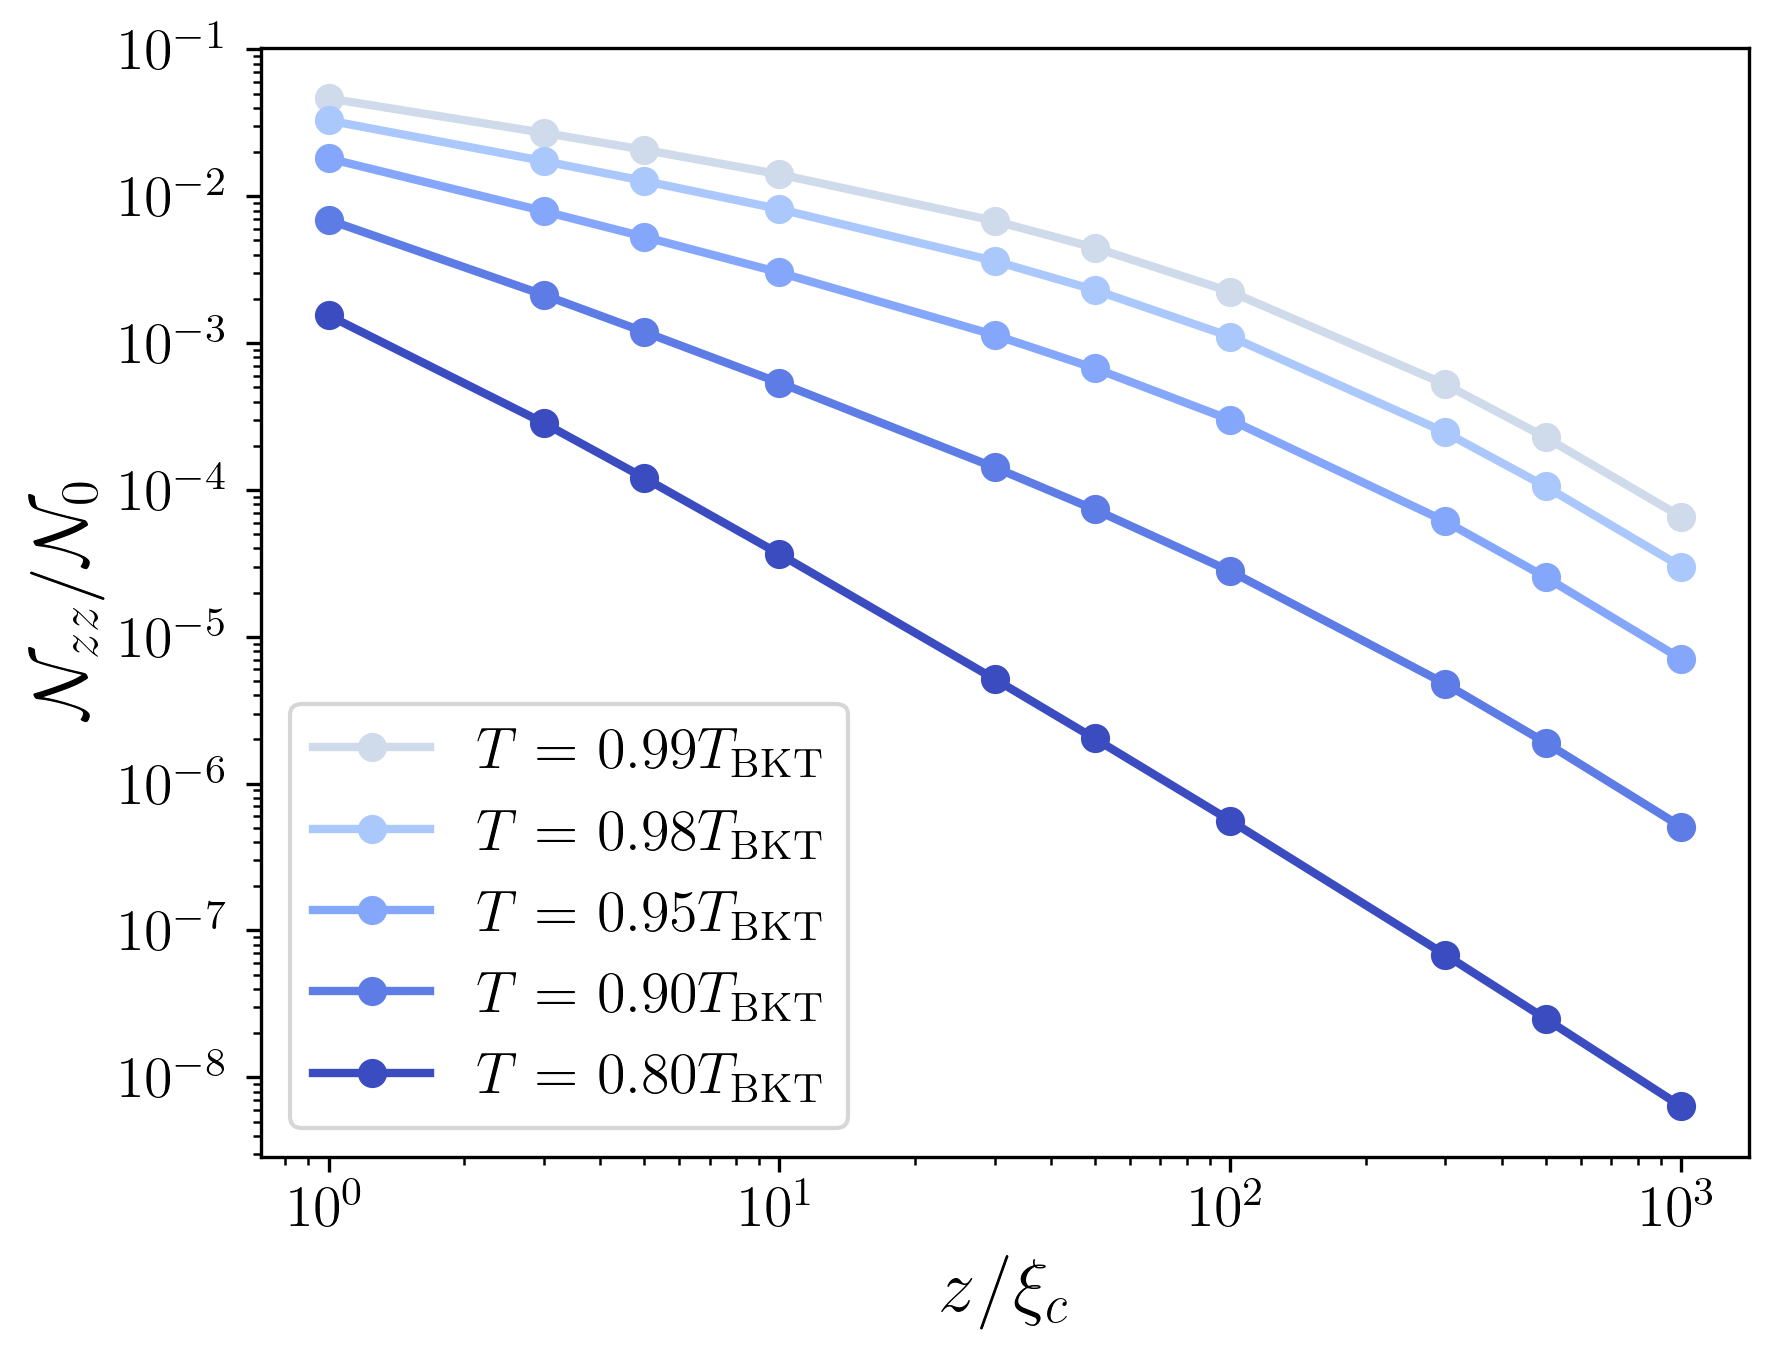

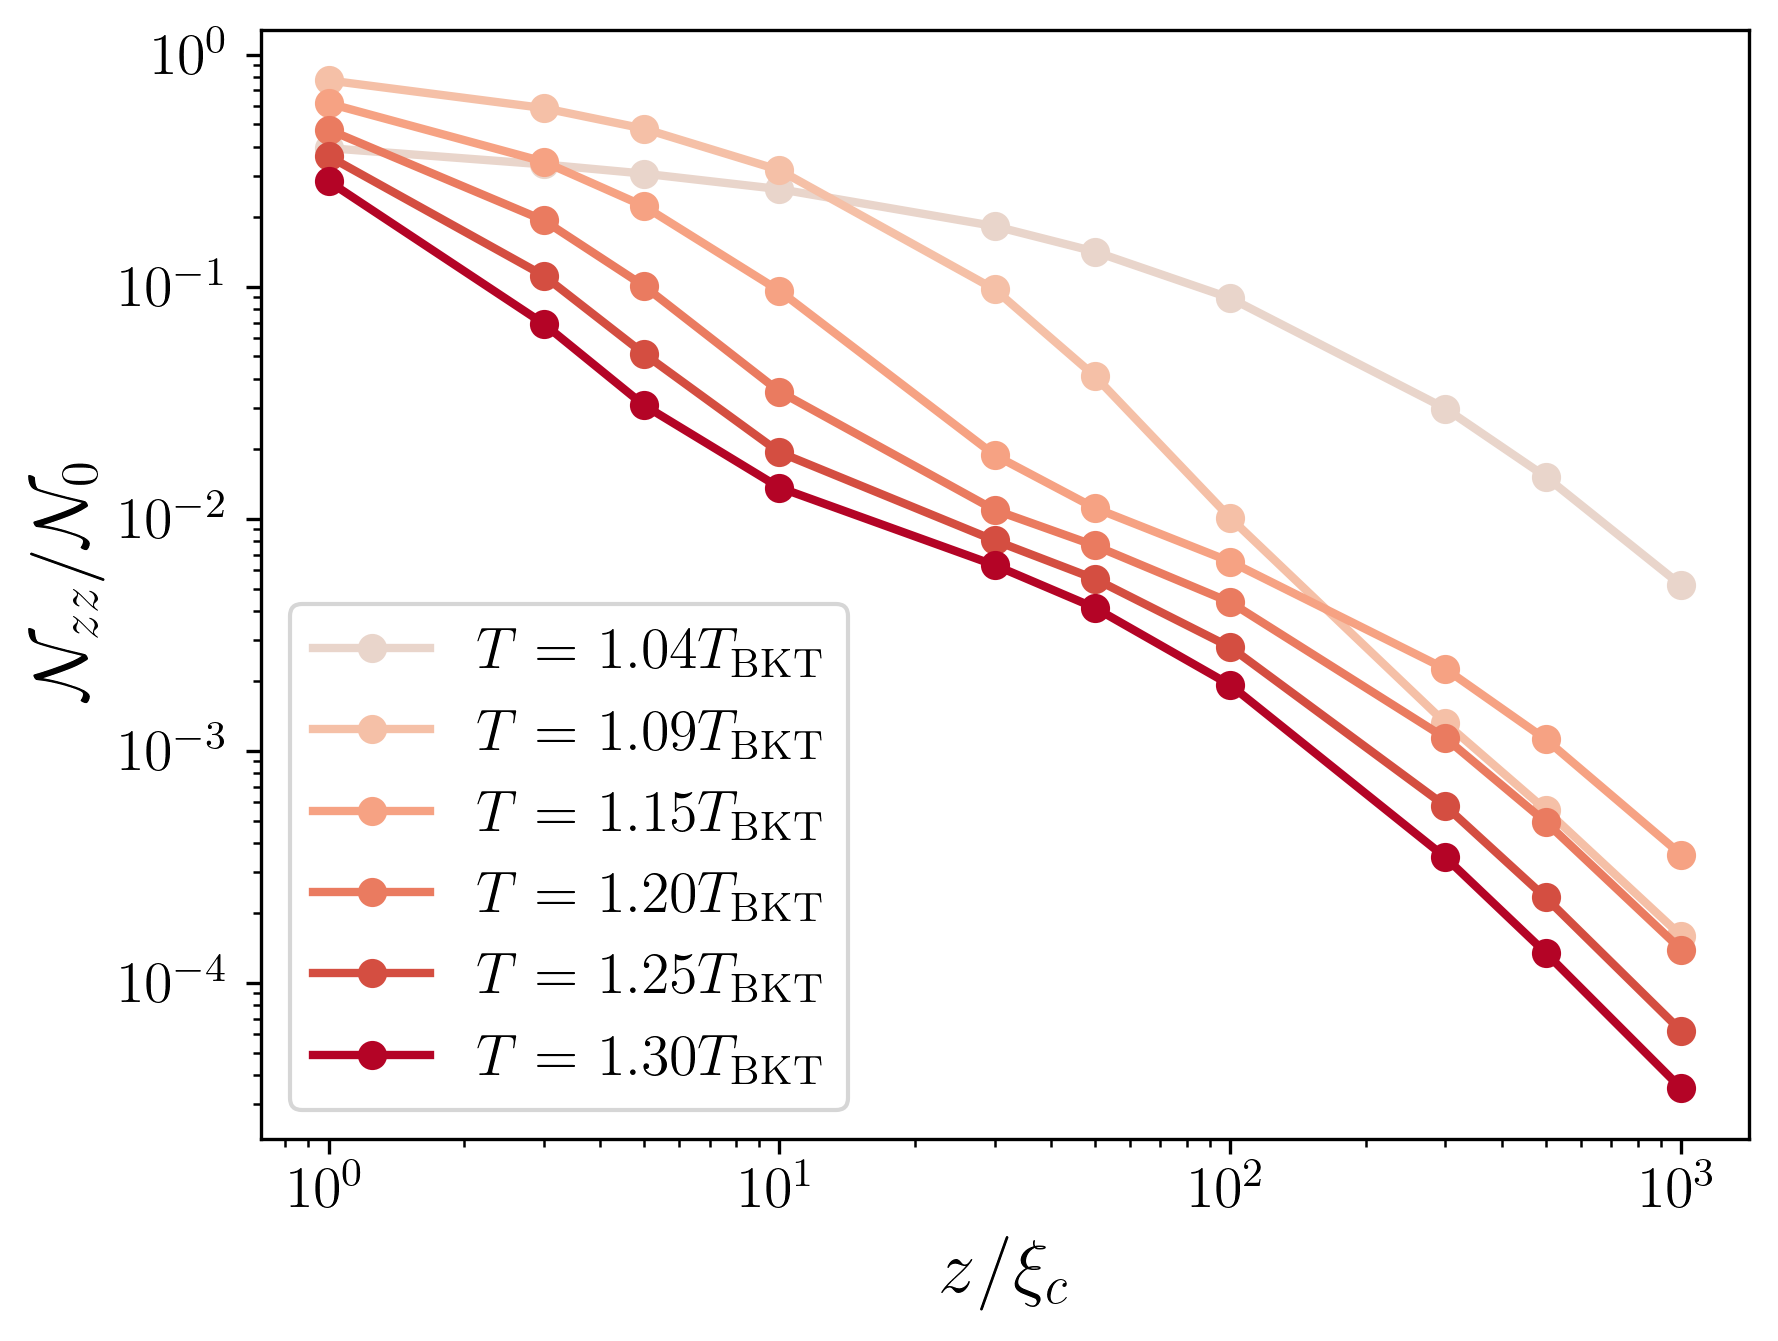

In [9]:
windx = 7
print(ws[windx]/(muv*TBKT))

tindxs = [15,14,12,8,0]
cs = cm.coolwarm(np.linspace(0.,0.45,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1

    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_c$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_low_temp_w=1e-5.pdf",bbox_inches='tight')
    
plt.show()

#############

tindxs = [19,23,27,31,35,39]

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    t = temps[tindx]
    plt.plot(zs[:-1],noise[tindx,:-1,windx],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=t/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(loc='lower left')
plt.xlabel(r'$z/\xi_c$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_z_high_temp_w=1e-5.pdf",bbox_inches='tight')
    
    
plt.show()

100.0


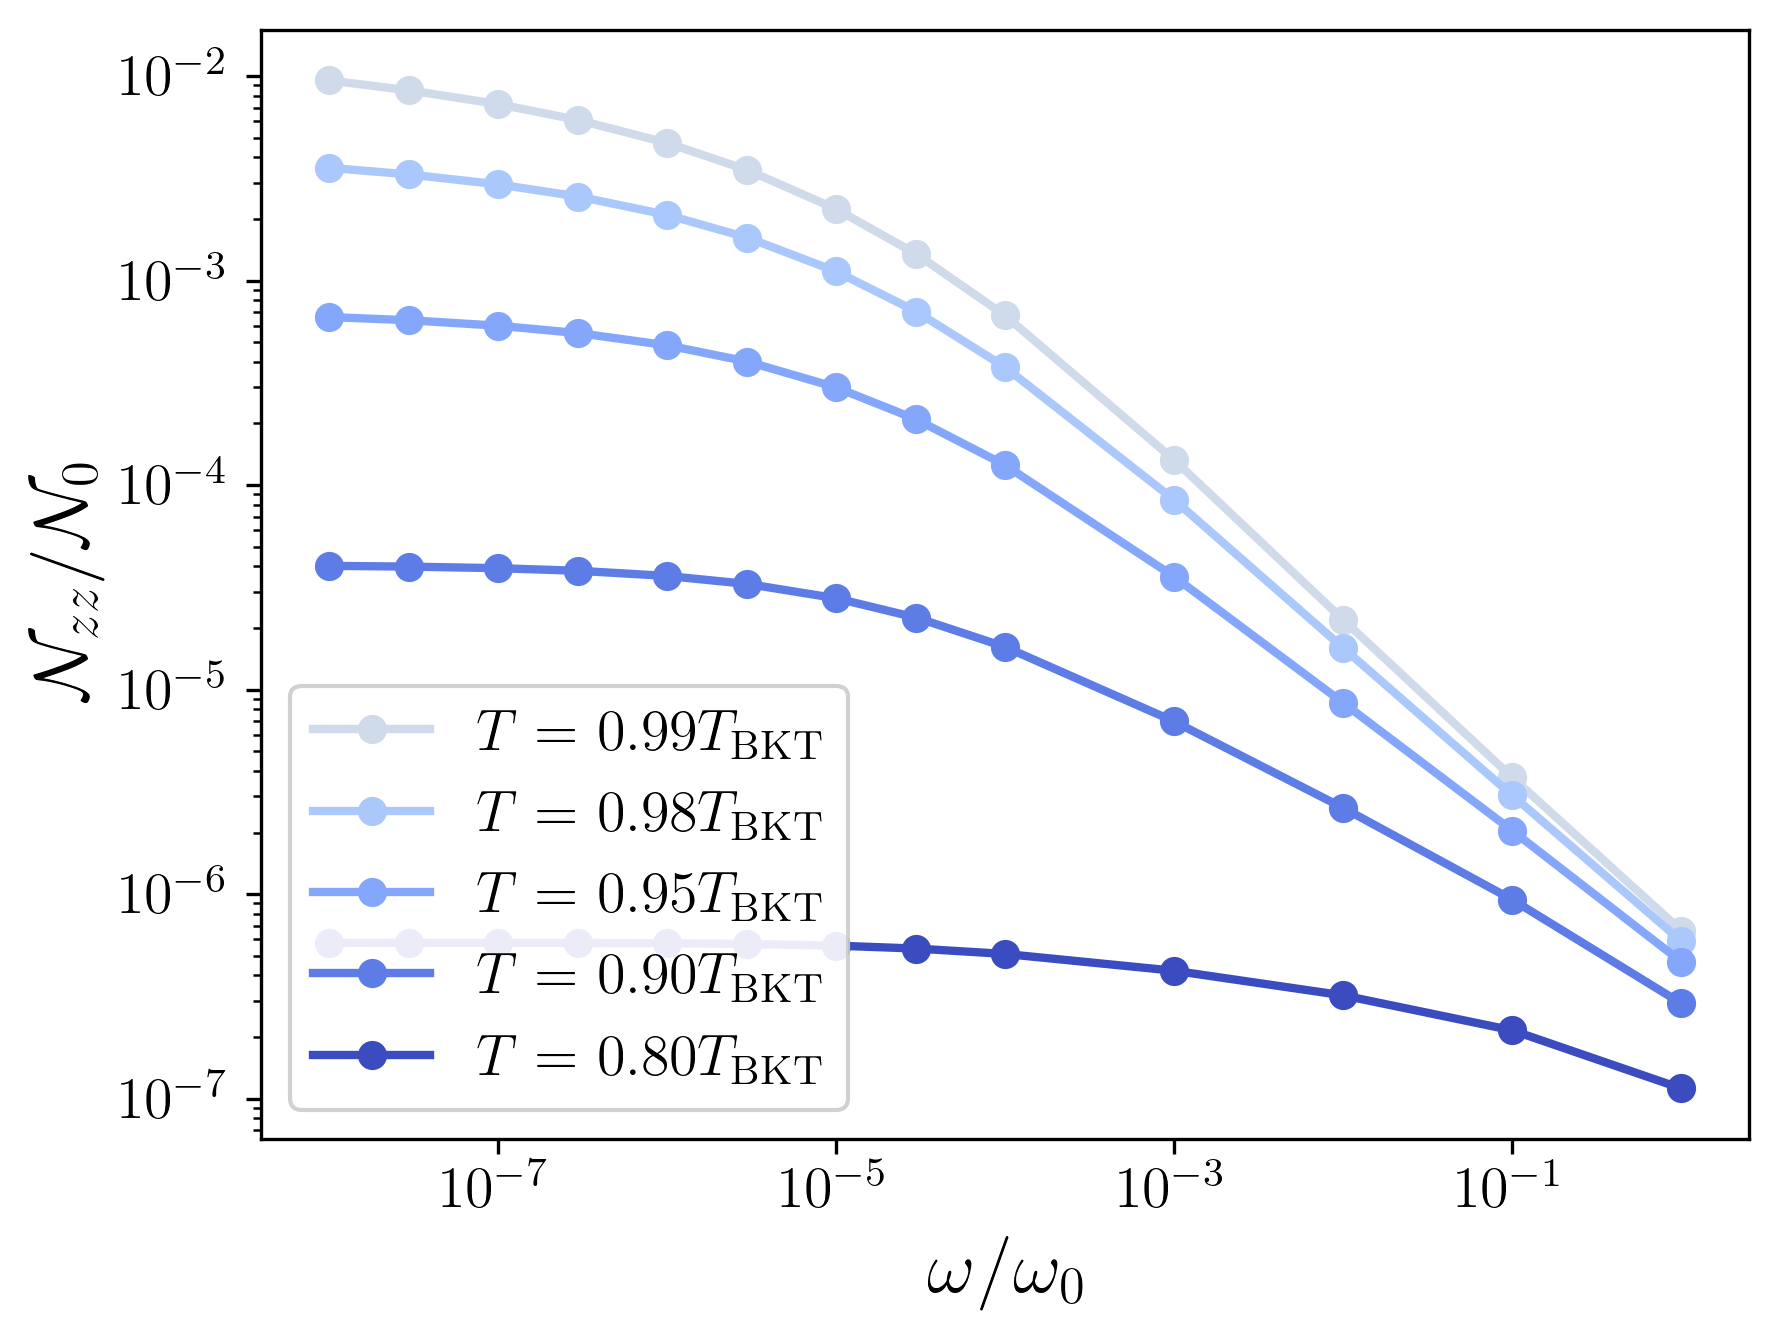

1000.0


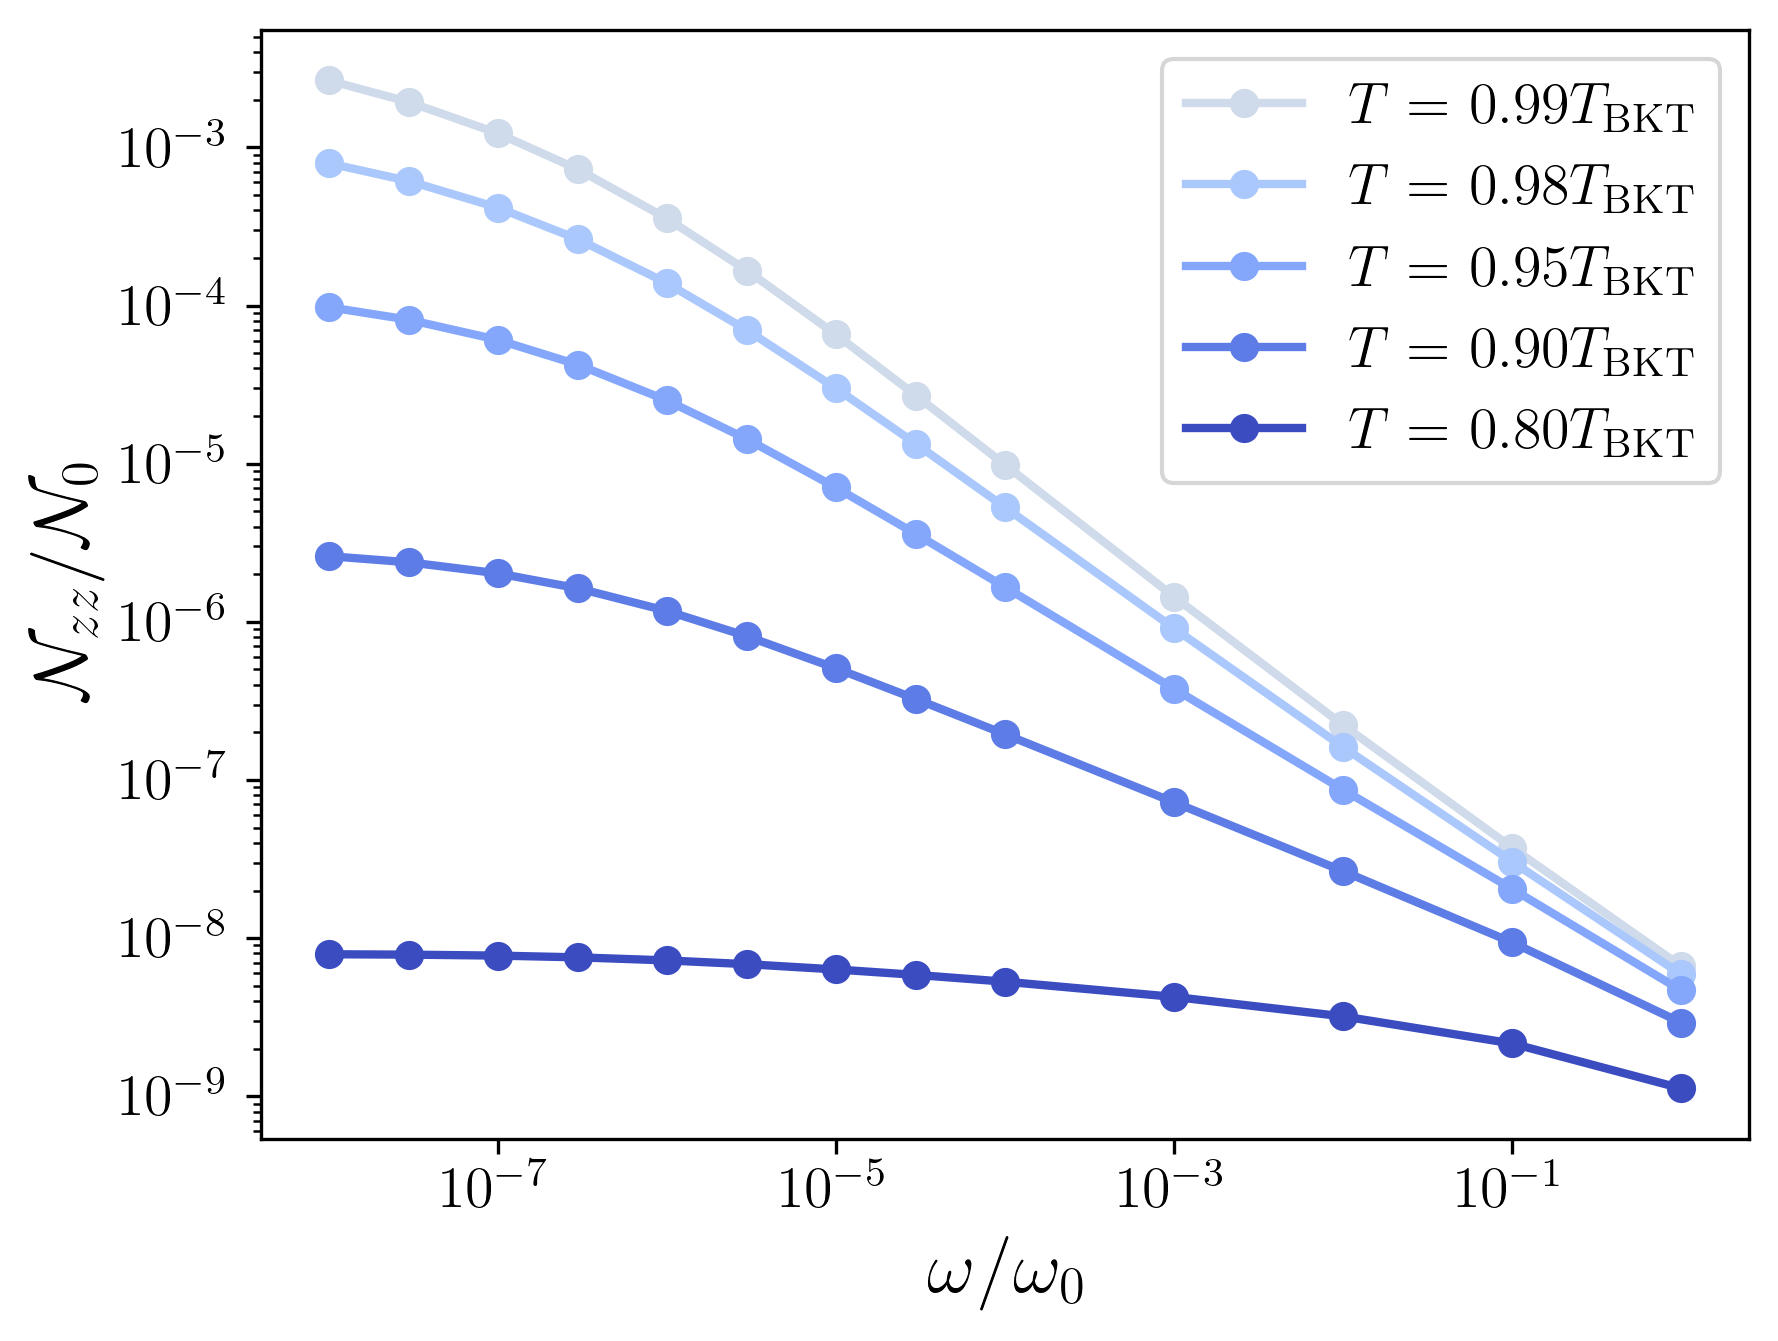

In [10]:
tindxs = [15,14,12,8,0]

zindx = 6
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.,.45,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(muv*TBKT),noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
    
plt.legend(loc='lower left',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_low_temp_z=100.pdf",bbox_inches='tight')

plt.show()

zindx = 9
print(zs[zindx])

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(muv*TBKT),noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_low_temp_z=1000.pdf",bbox_inches='tight')

plt.show()


100.0


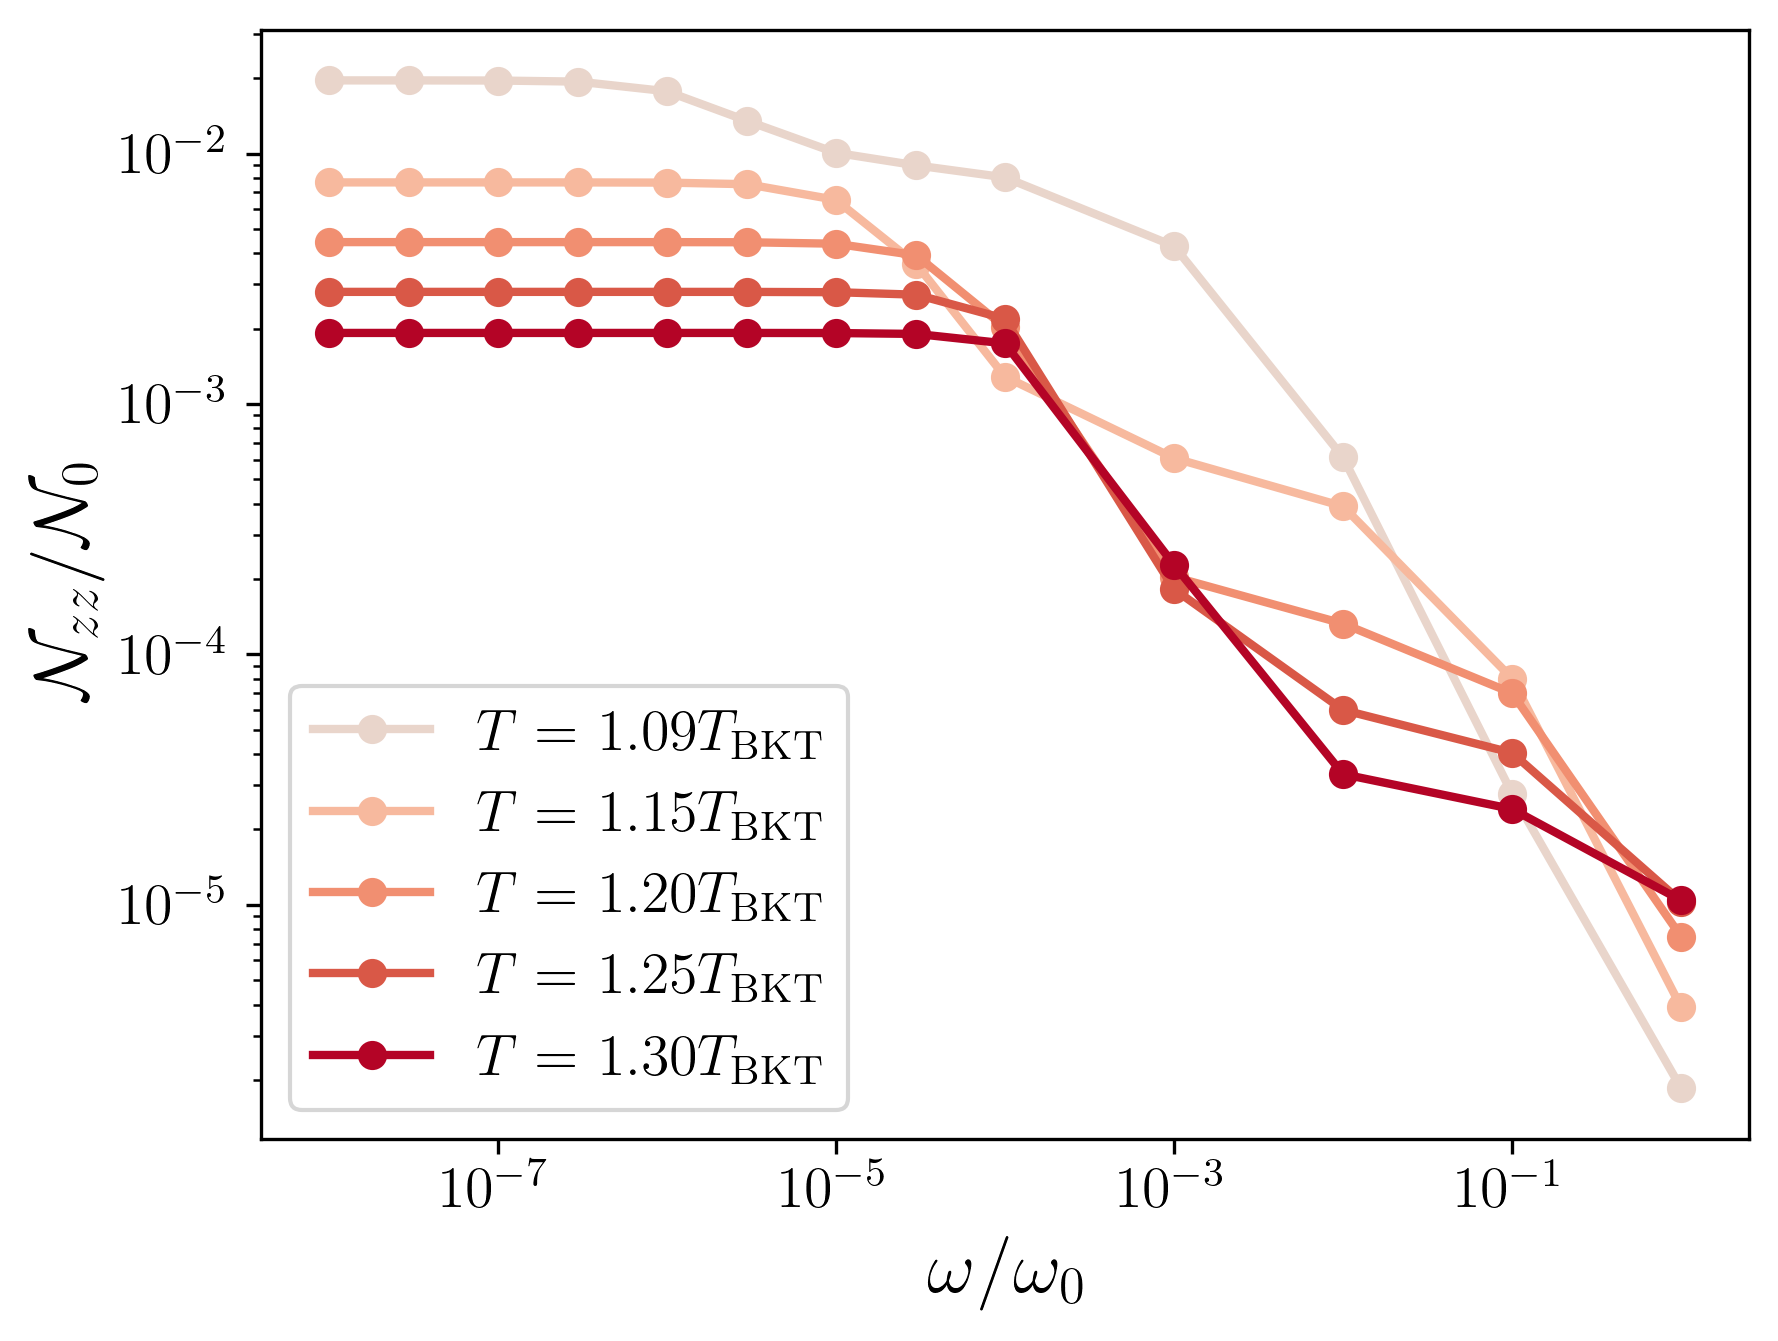

1000.0


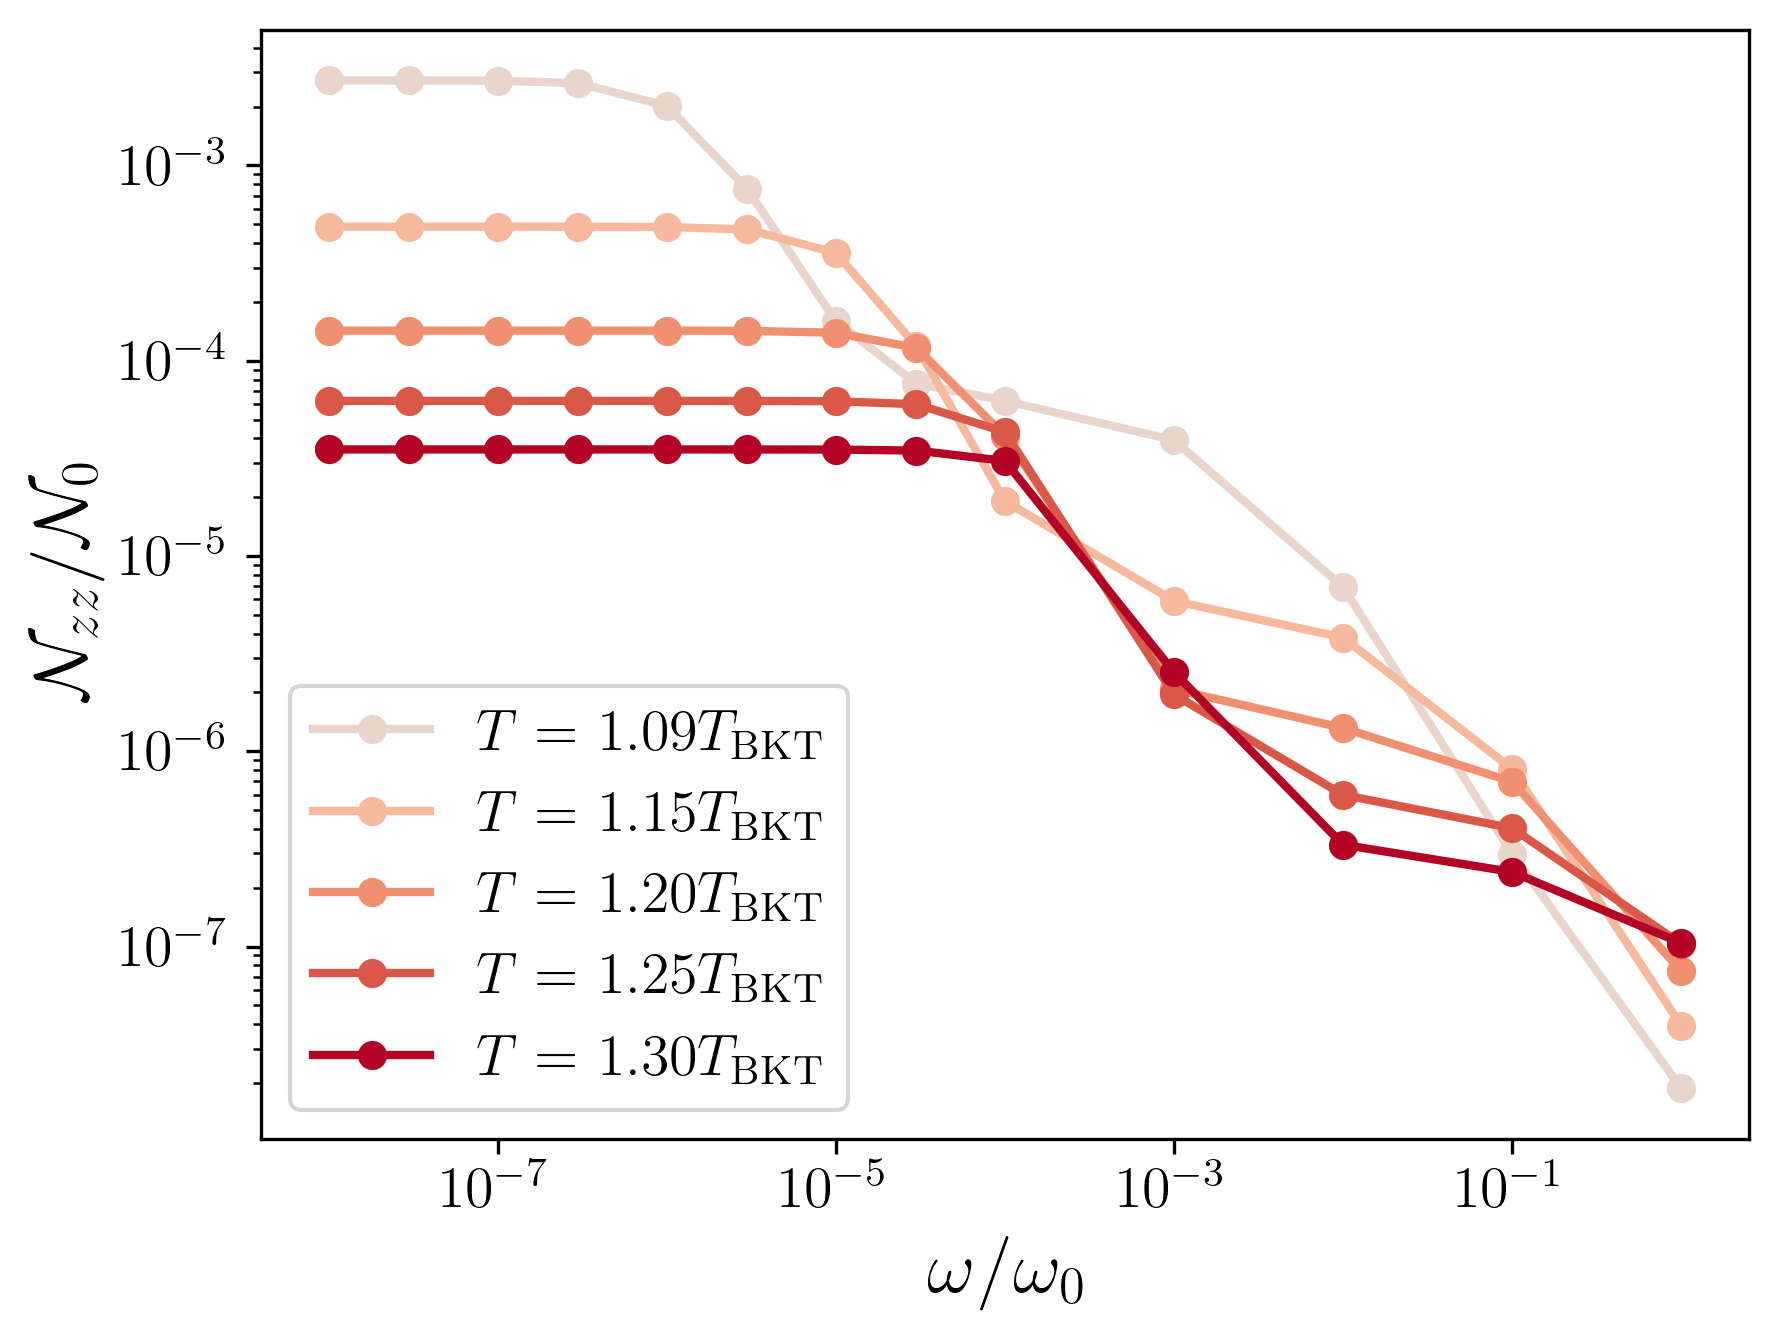

In [11]:
tindxs = [23,27,31,35,39]
zindx = 6
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_high_temp_z=100.pdf",bbox_inches='tight')

plt.show()


zindx = 9
print(zs[zindx])

cs = cm.coolwarm(np.linspace(0.55,1.,len(tindxs)))

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend()
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_high_temp_z=1000.pdf",bbox_inches='tight')

plt.show()


100.0


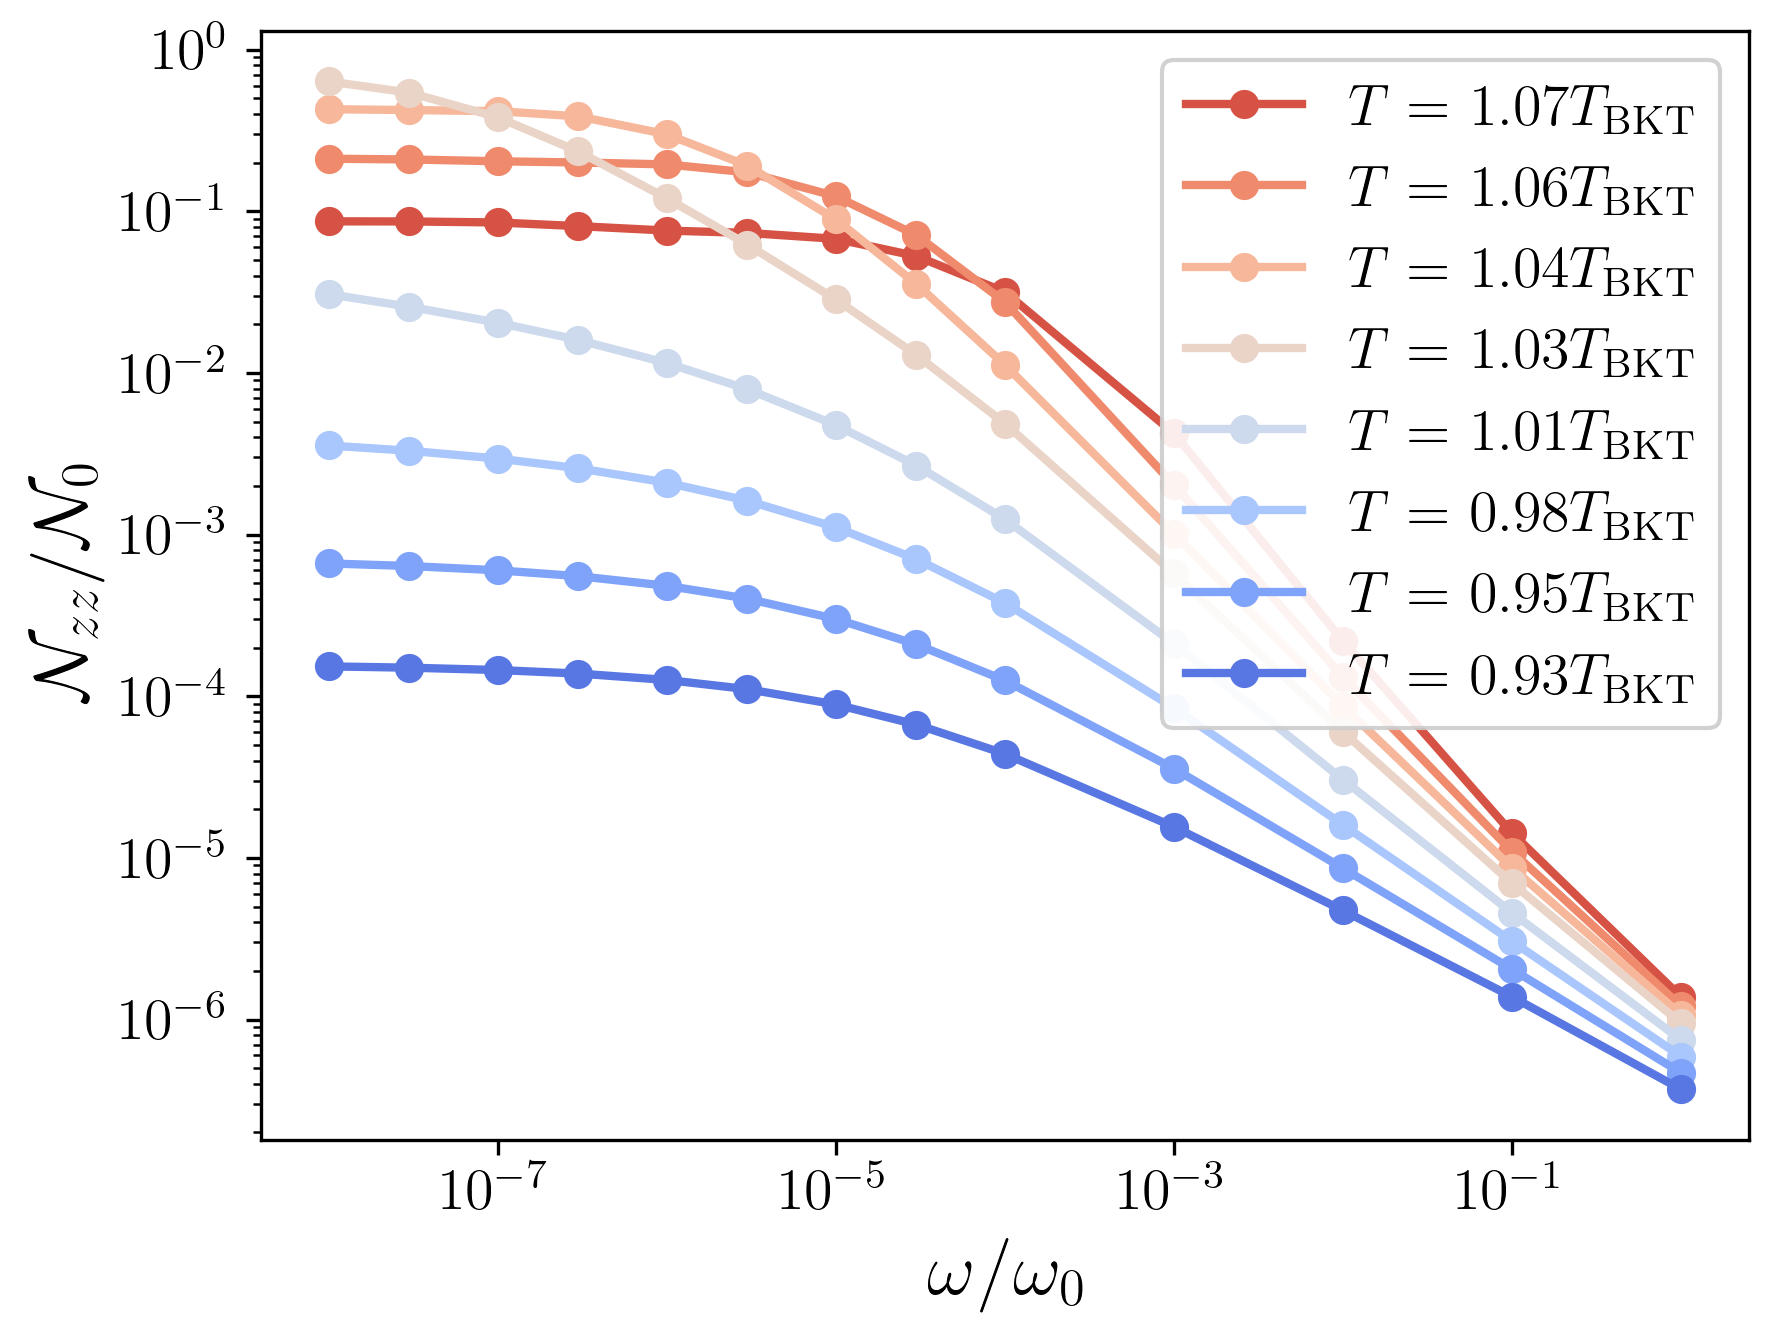

1000.0


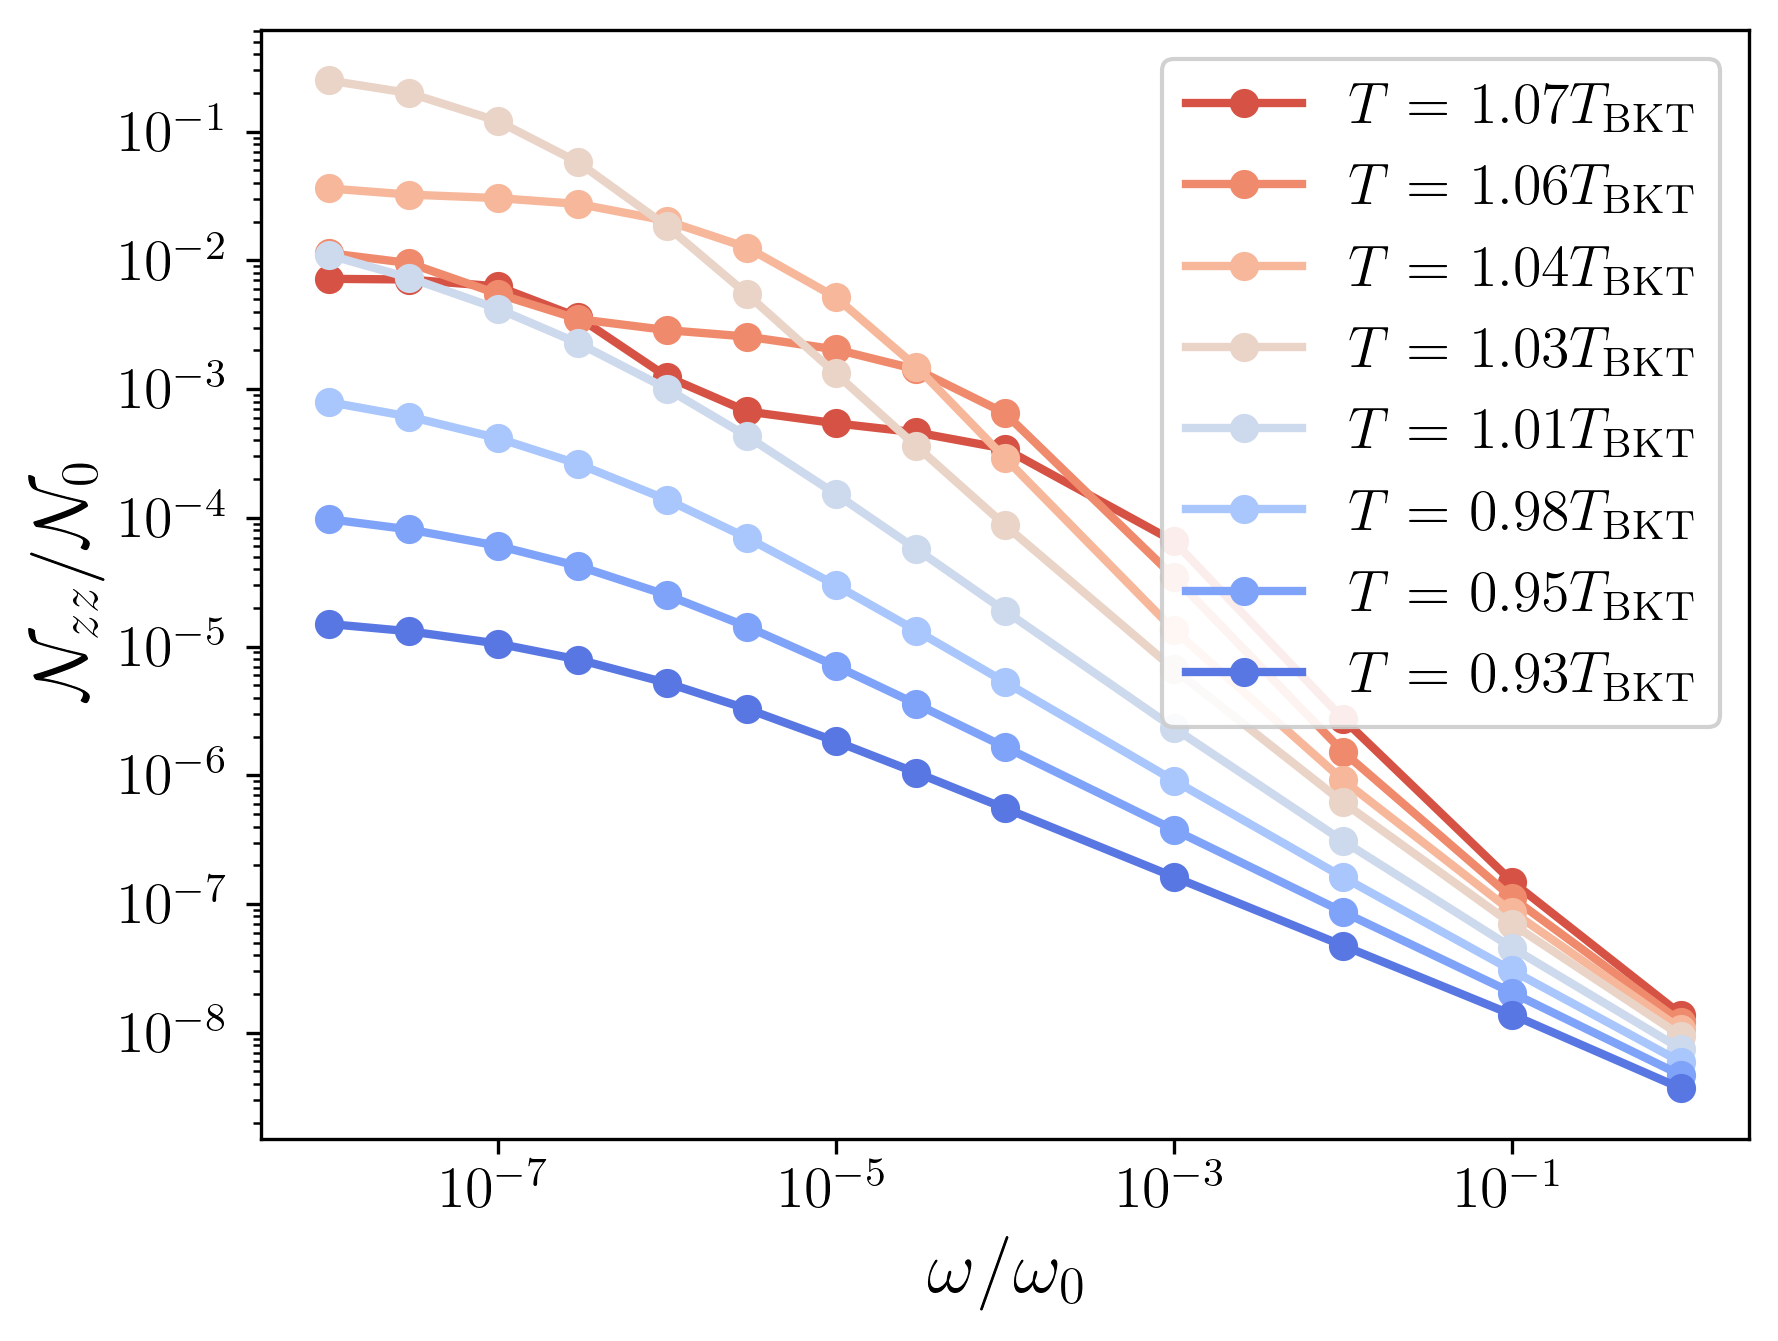

In [12]:
tindxs = [21,20,19,18,16,14,12,10]#[10,12,14,16,18,19,20,21]
cs = cm.coolwarm(np.linspace(0.1,0.9,len(tindxs)))


zindx = 6
print(zs[zindx])

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_transition_z=100.pdf",bbox_inches='tight')

plt.show()

zindx = 9
print(zs[zindx])

i=0
for tindx in tindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[-1-i],label=r'$T=$'+" {ratio:0.2f}".format(ratio=temps[tindx]/TBKT)+r'$T_{\rm BKT}$')
    i+=1
    
plt.legend(framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_transition_z=1000.pdf",bbox_inches='tight')

plt.show()

0.9538461538461539


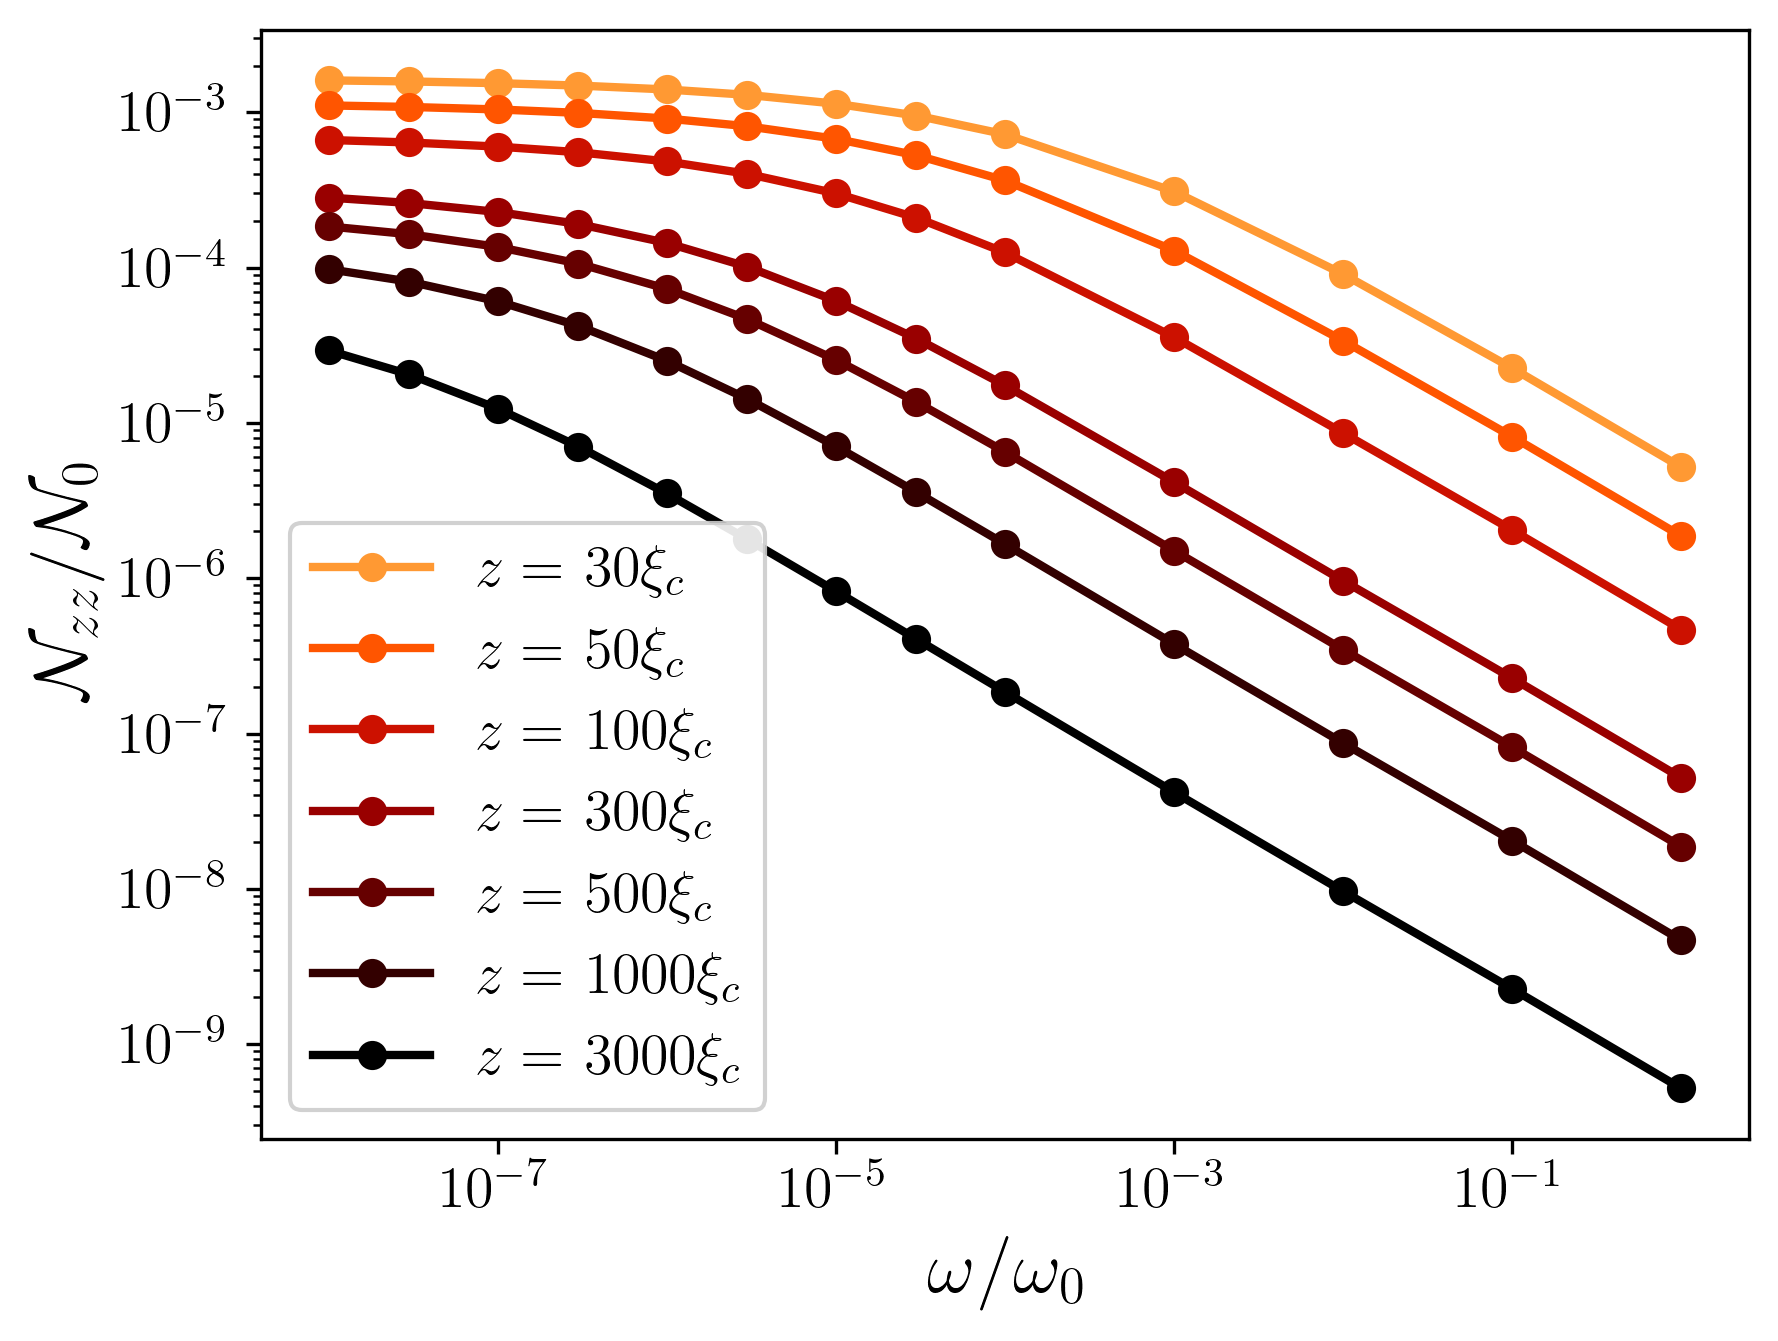

In [13]:
zindxs = [4,5,6,7,8,9,10]

tindx = 12
print(temps[tindx]/TBKT)

cs = cm.gist_heat(np.linspace(0.8,0.,len(zindxs)))

i=0
for zindx in zindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$z=$'+" {z:0.0f}".format(z=zs[zindx])+r'$\xi_c$')
    i+=1
    
    
plt.legend(loc='lower left',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_T=0.95.pdf",bbox_inches='tight')


plt.show()


1.017948717948718


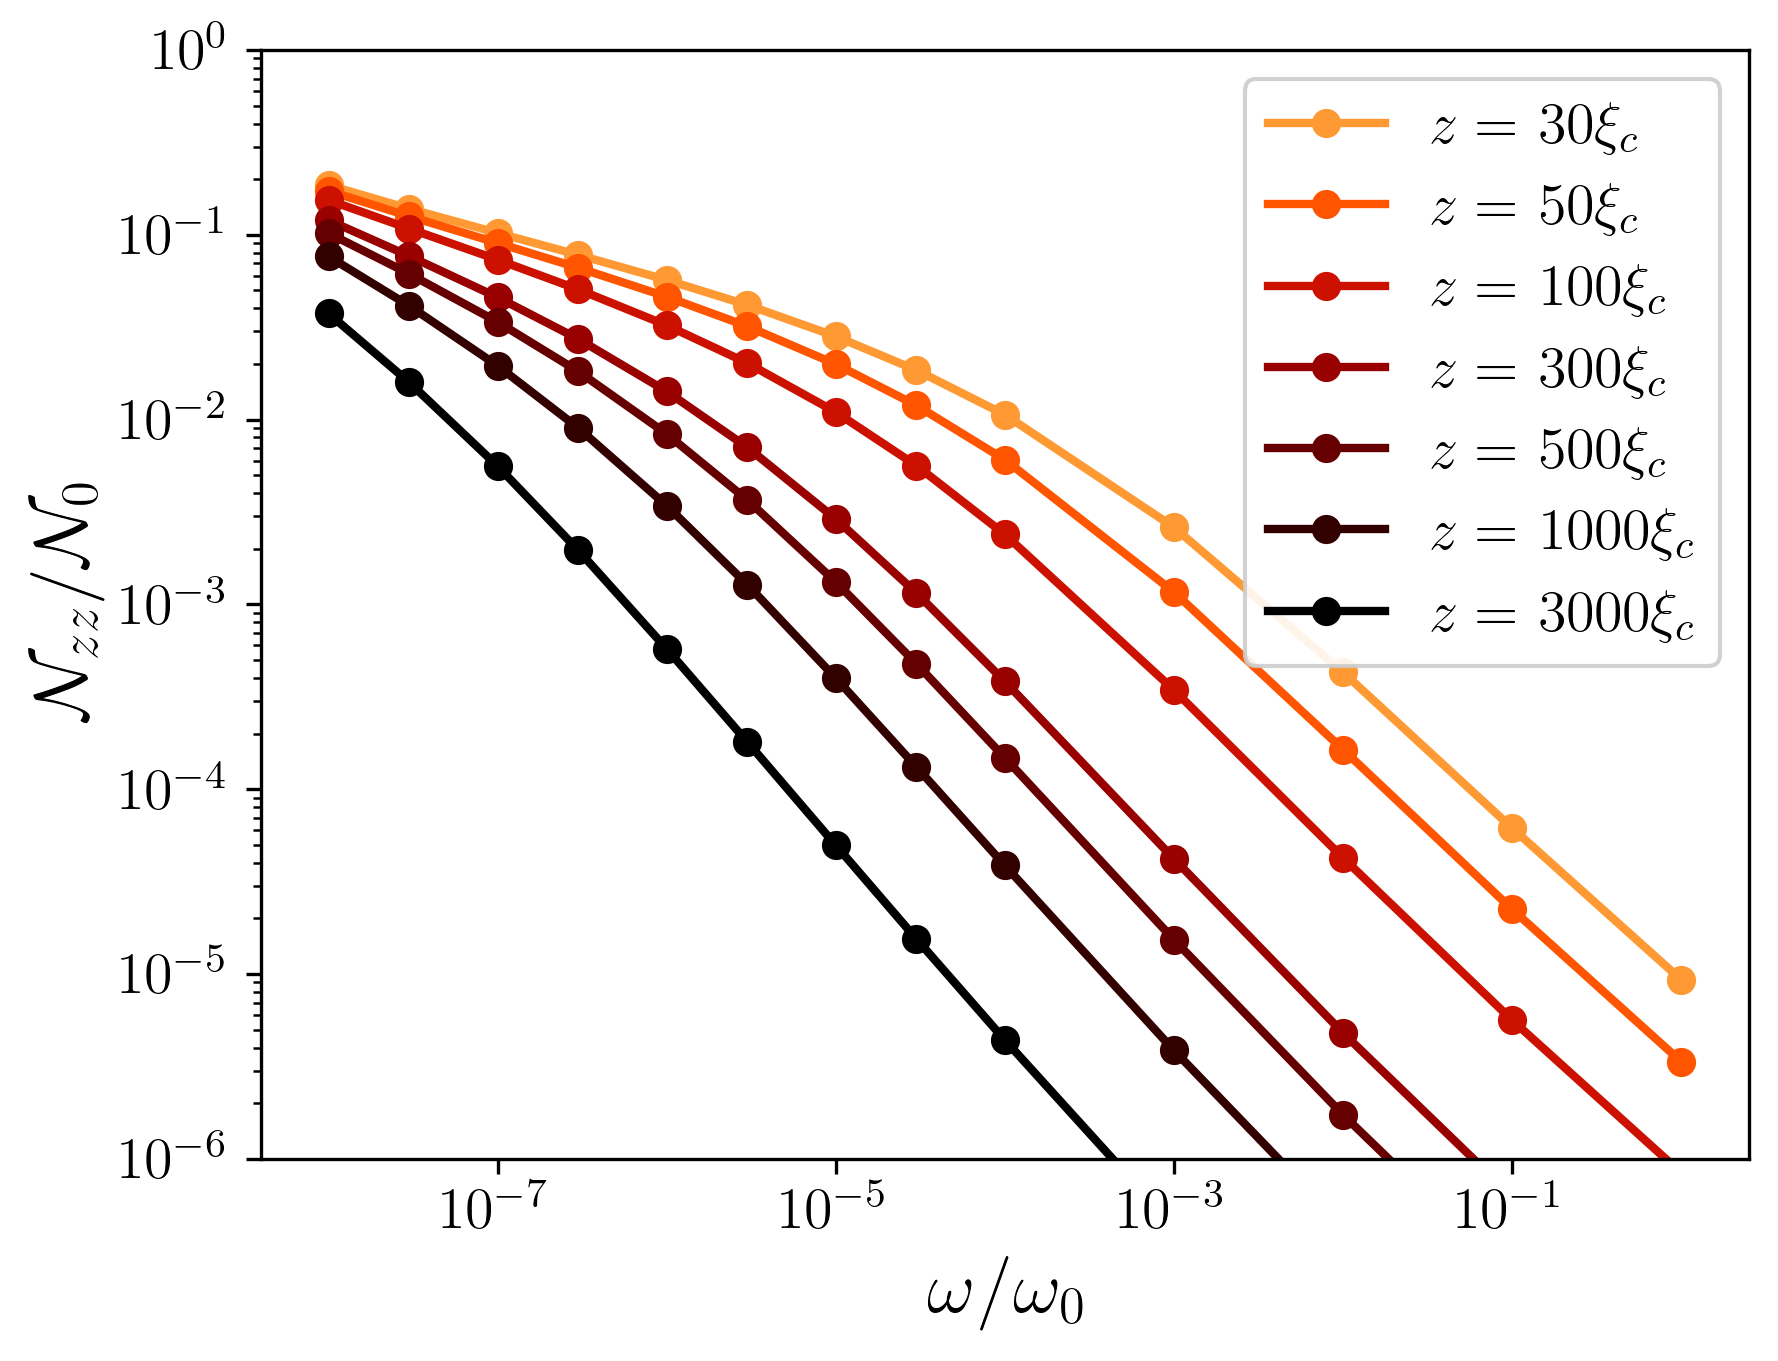

In [14]:
zindxs = [4,5,6,7,8,9,10]

tindx = 17
print(temps[tindx]/TBKT)

cs = cm.gist_heat(np.linspace(0.8,0.,len(zindxs)))

i=0
for zindx in zindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$z=$'+" {z:0.0f}".format(z=zs[zindx])+r'$\xi_c$')
    i+=1
    
    
plt.legend(loc='upper right',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

plt.ylim(1.e-6,1.e0)

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_T=1.02.pdf",bbox_inches='tight')


plt.show()


1.0435897435897437


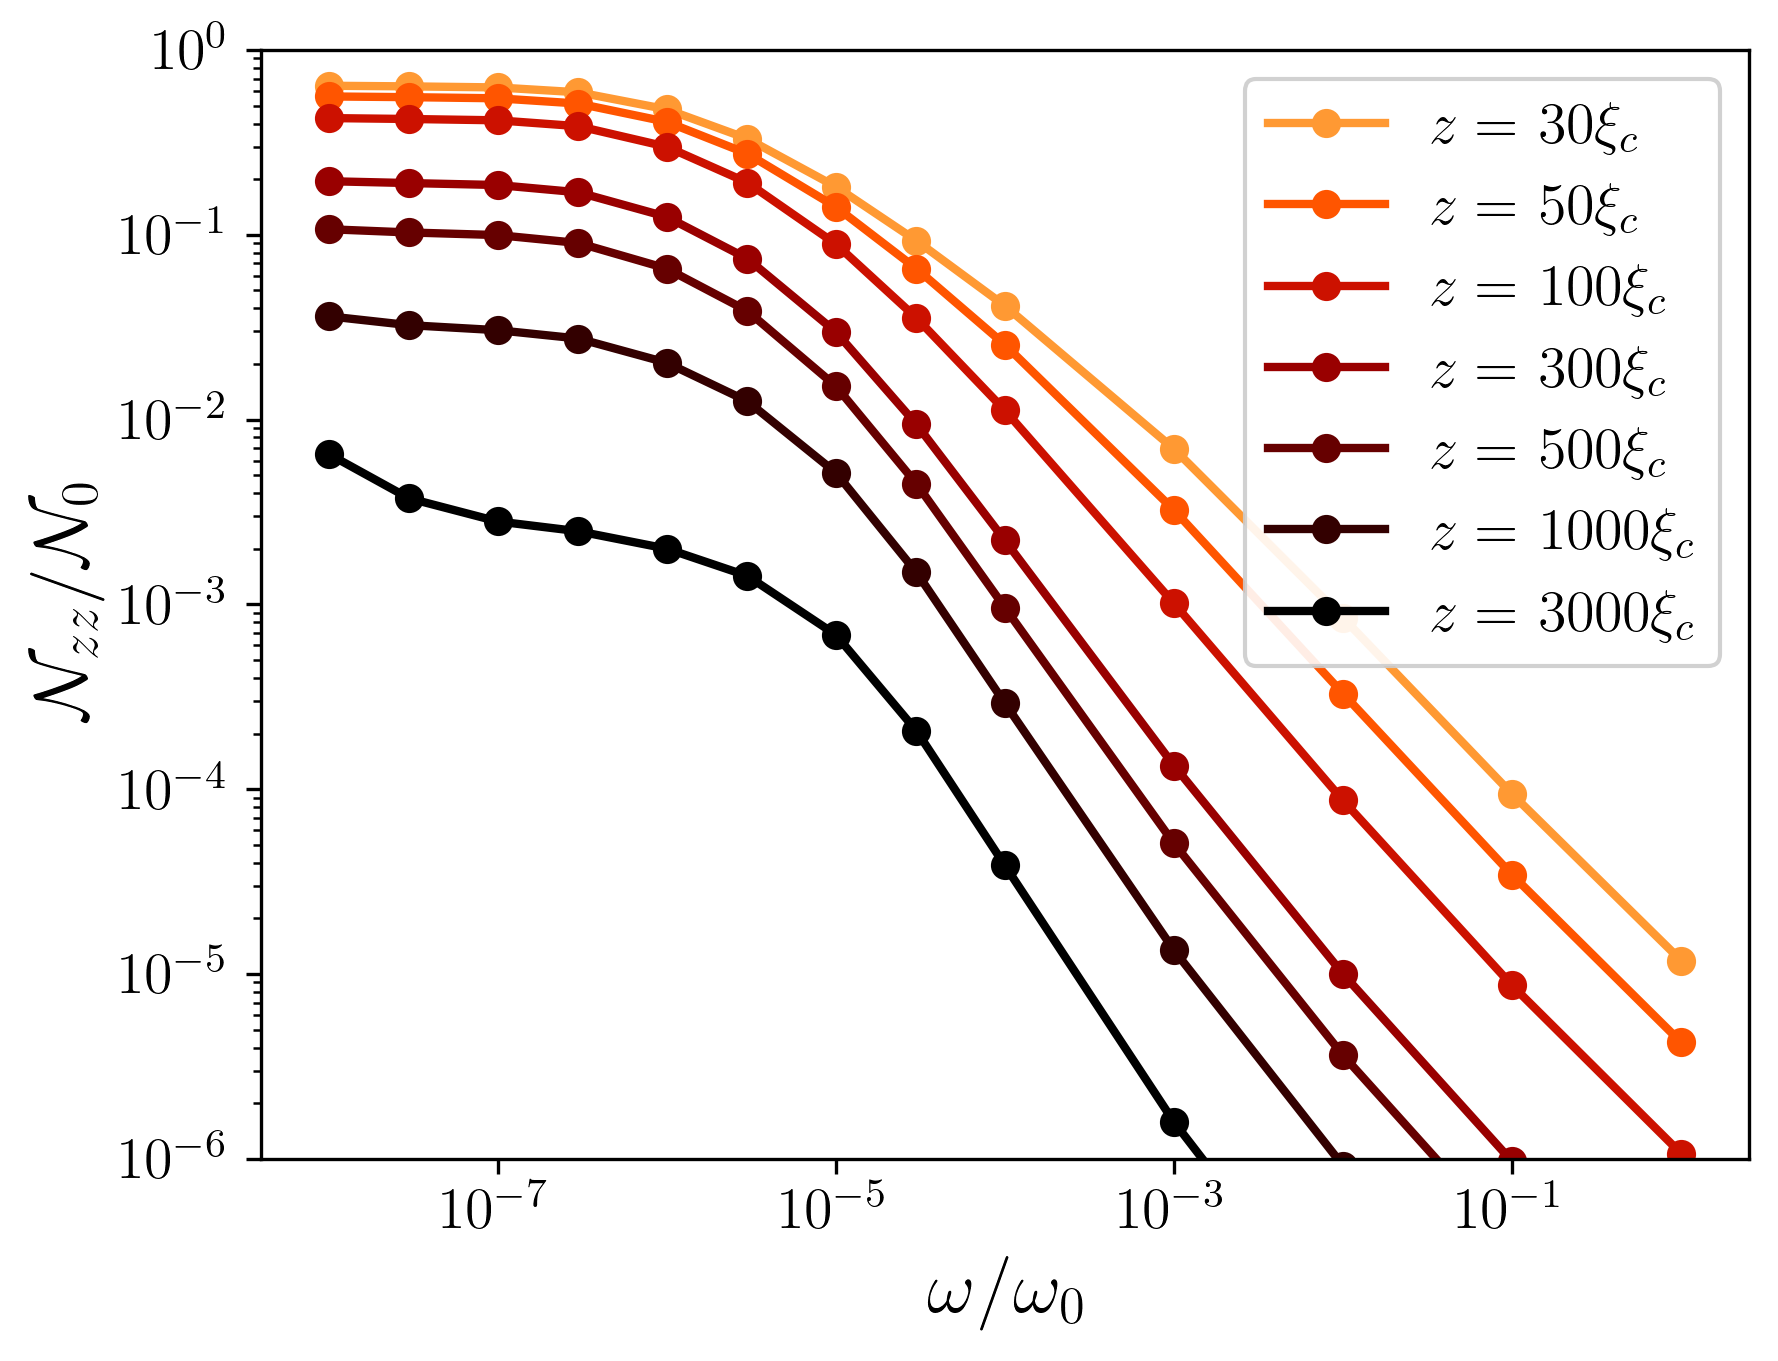

In [15]:
zindxs = [4,5,6,7,8,9,10]

tindx = 19
print(temps[tindx]/TBKT)

cs = cm.gist_heat(np.linspace(0.8,0.,len(zindxs)))

i=0
for zindx in zindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$z=$'+" {z:0.0f}".format(z=zs[zindx])+r'$\xi_c$')
    i+=1
    
    
plt.legend(loc='upper right',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

plt.ylim(1.e-6,1.e0)
if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_T=1.04.pdf",bbox_inches='tight')


plt.show()

1.0692307692307692


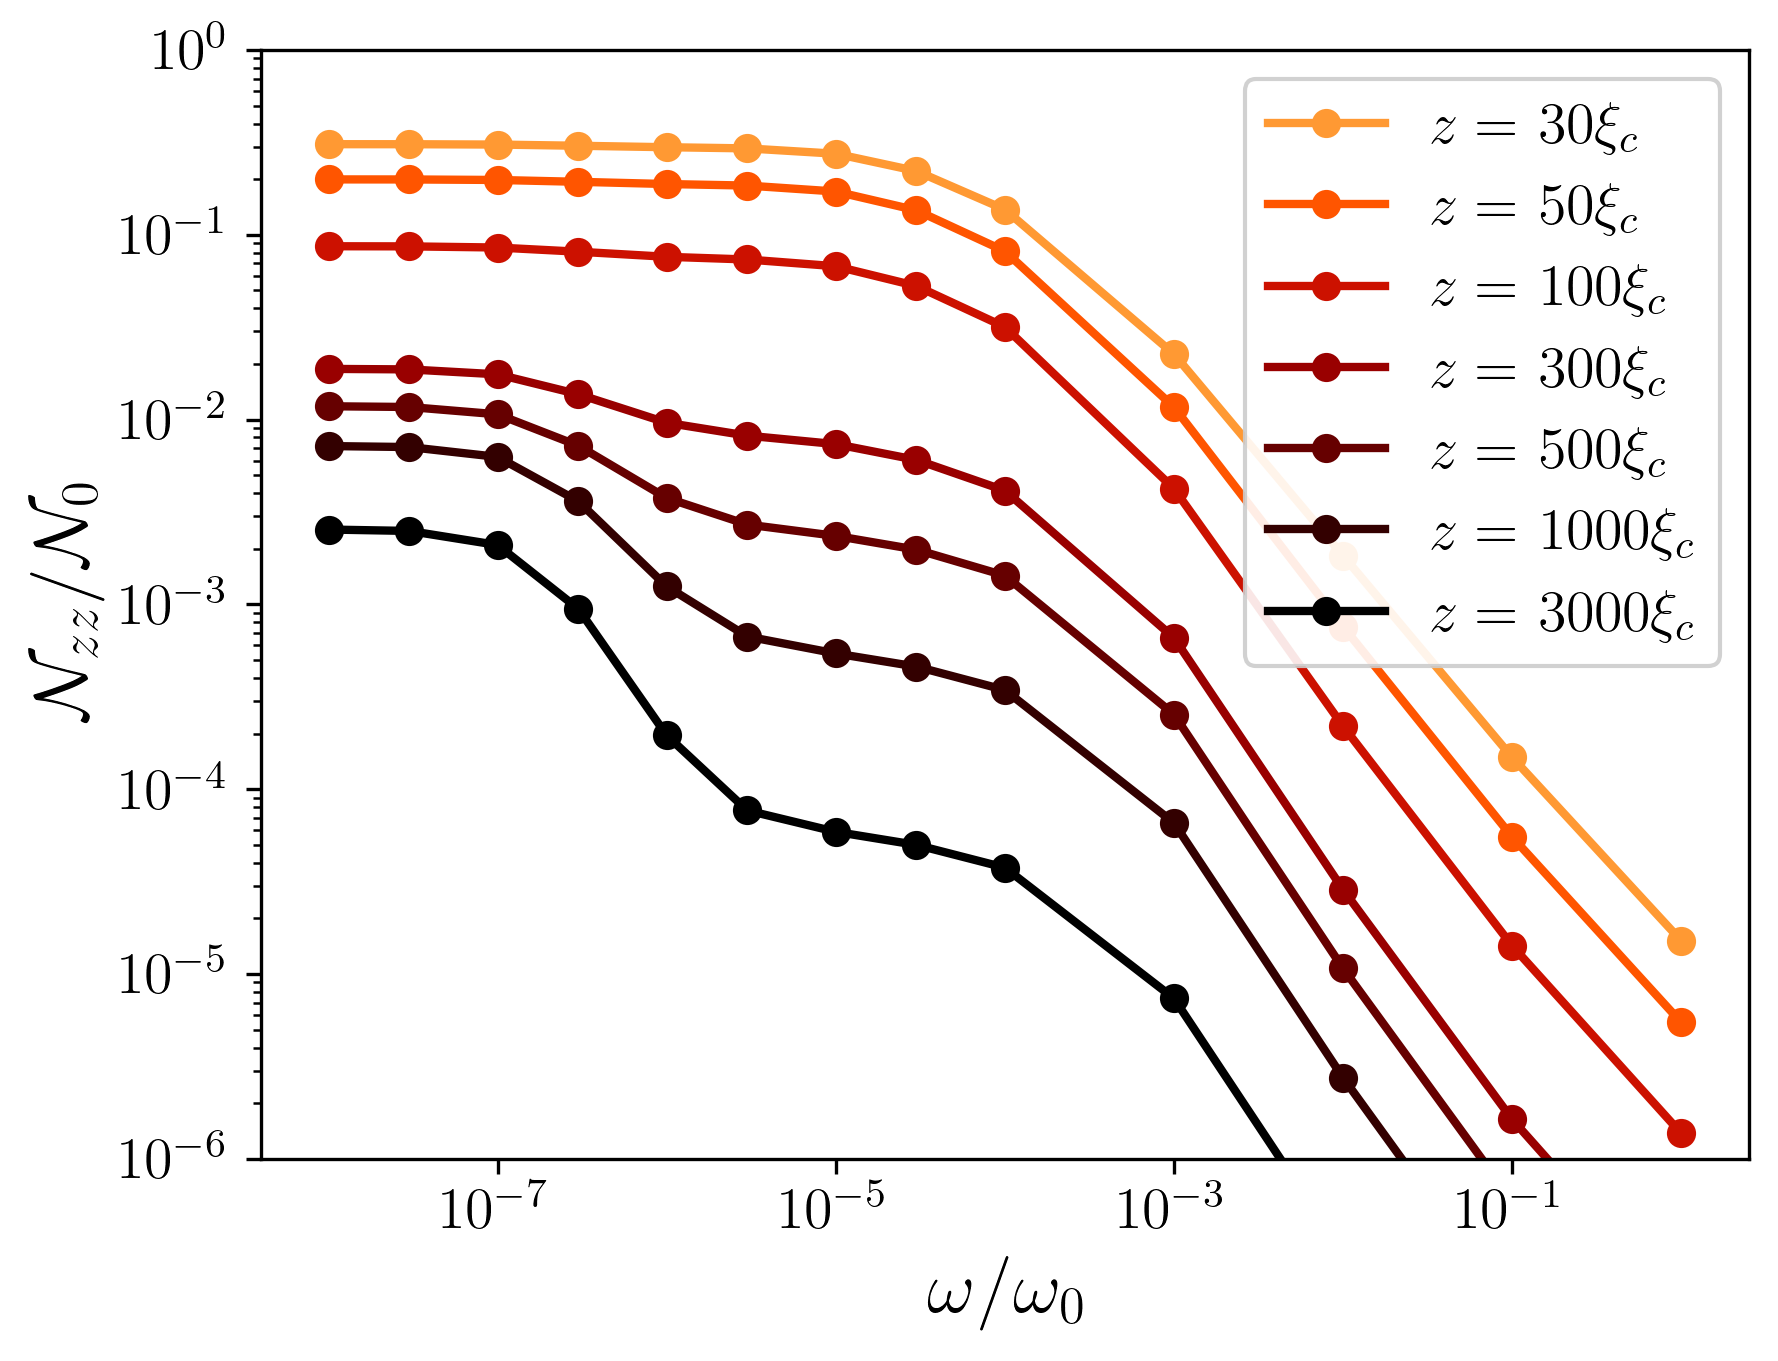

In [16]:
zindxs = [4,5,6,7,8,9,10]

tindx = 21
print(temps[tindx]/TBKT)

cs = cm.gist_heat(np.linspace(0.8,0.,len(zindxs)))

i=0
for zindx in zindxs:
    plt.plot(ws[1:]/(TBKT*muv),noise[tindx,zindx,1:],color=cs[i],label=r'$z=$'+" {z:0.0f}".format(z=zs[zindx])+r'$\xi_c$')
    i+=1
    
    
plt.legend(loc='upper right',framealpha=.9)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{N}_0$')
plt.yscale('log')
plt.xscale('log')

plt.ylim(1.e-6,1.e0)

if saveFigs:
    plt.savefig(figDirectory+"noise_vs_w_T=1.07.pdf",bbox_inches='tight')


plt.show()

In [17]:
import noise_integral as ni
from scipy import stats

nts = 50
fitstart = 25

ts = np.linspace(0.75,1.,nts)

xis = np.zeros(nts)

for nt in range(nts):
    xis[nt] = ni.xiplus(ts[nt]) 

ys = 1./(np.log(xis[fitstart:]))**2
xs = ts[fitstart:]

fit = stats.linregress(xs,ys)

m = fit.slope
b = fit.intercept
m_sigma = fit.stderr
b_sigma = fit.intercept_stderr

TBKT = -b/m 
TBKT_sigma = b_sigma/np.abs(m) + np.abs(b)/m**2 * m_sigma


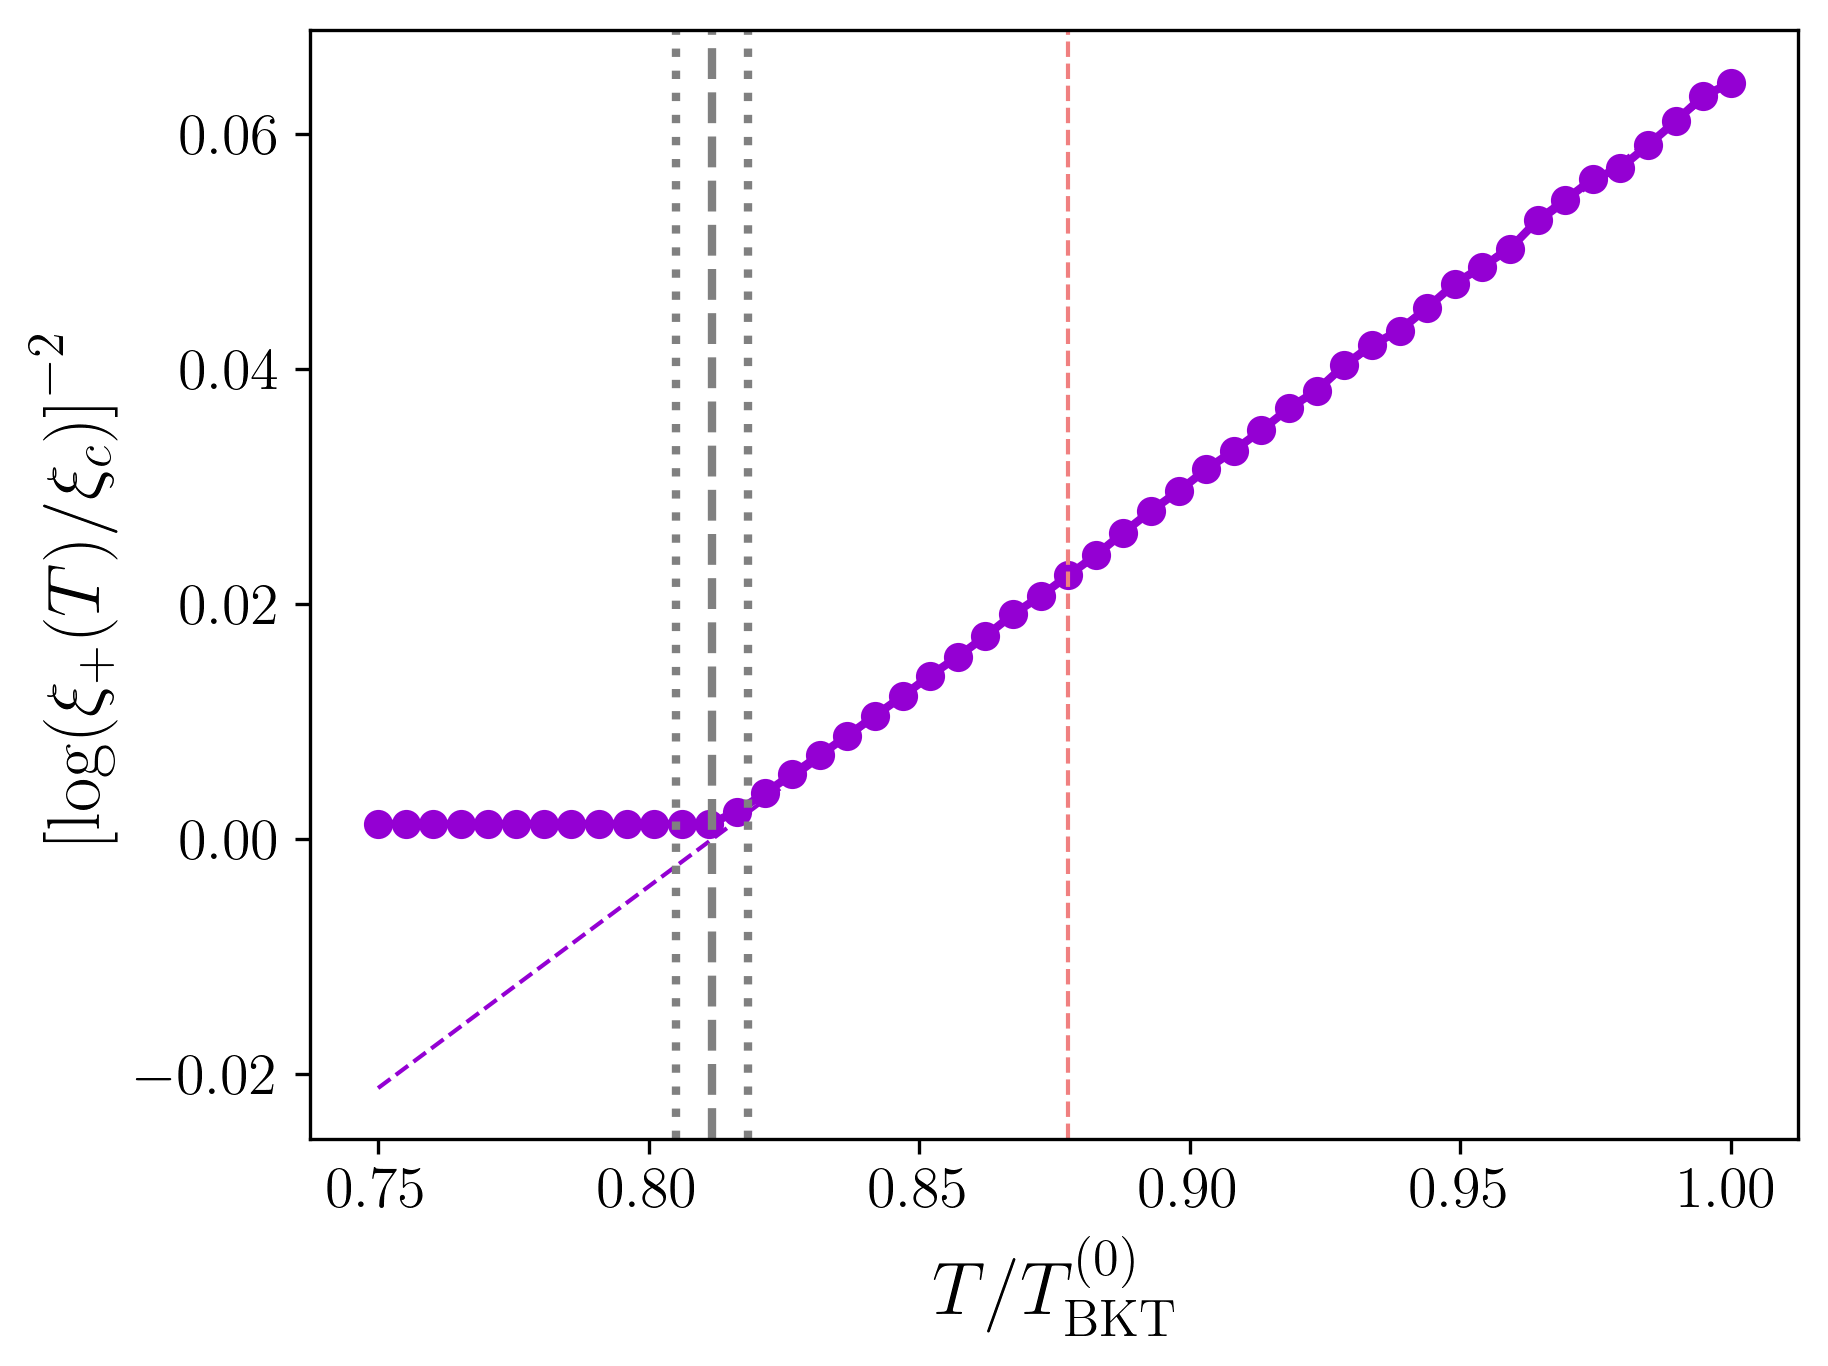

In [18]:
plt.plot(ts,(1./np.log(xis[:]))**2,color=mclr.CSS4_COLORS['darkviolet'])
plt.plot(ts,m*ts + b,color=mclr.CSS4_COLORS['darkviolet'],linewidth=1.,linestyle='dashed',marker='none')
plt.xlabel(r'$T/T_{\rm BKT}^{(0)}$')
plt.ylabel(r'$\left[\log(\xi_+(T)/\xi_c)\right]^{-2}$')
plt.axvline(TBKT,linestyle='dashed',marker='none',color='gray')
plt.axvline(TBKT+TBKT_sigma,linestyle='dotted',marker='none',color='gray')
plt.axvline(TBKT-TBKT_sigma,linestyle='dotted',marker='none',color='gray')
plt.axvline(ts[fitstart],linestyle='dashed',linewidth=1.,color=mclr.CSS4_COLORS['lightcoral'],marker='none')

if saveFigs:
    plt.savefig(figDirectory+"TBKT_fit.pdf",bbox_inches='tight')

plt.show()

In [19]:
### Returns Delta(T)/Tc
def delta(t):
    return 1.76 *np.real(np.tanh(1.74*np.emath.sqrt(1./t-1.)))

### Coherence function contribution to Mattis Bardeen integral
def coherence(e,w,d):
    return ( e*(e+w)+d**2 )/np.sqrt( ( e**2 - d**2 ) * ( (e+w)**2 - d**2 ) )

### Mattis-Bardeen noise at temperature t = T/Tc and frequency w (in units of Tc)
def noiseBQP(w,t):
    
    ### In this case the gap is zero and we will just return the normal state conductivity
    if t >= 1.:
        result = 1.
    
    else:
    
        d = delta(t)
        
        n = lambda x: 1./(np.exp(x)+1.)
    
        integrand1 = lambda e: 2.*coherence(e,w,d)*( n(e/t)-n((e+w)/t) )/w 
        integrand2 = lambda e: - np.tanh( .5*e/t)* coherence(e,-w,d)/w
        
        result = intg.quad(integrand1,d,20.*d,points=[d])[0]
    
        if w > 2.*d:
            result +=  intg.quad(integrand2,d,w - d,points=[d])[0]
        
    return result
    


In [20]:
nts = 30
ts = np.linspace(0.1,1.2,nts)
delts = np.array([delta(t) for t in ts])

###1GHz = .047K
### Assume a 40K transition
ws = np.array([0.1,.01,.001,.0001])
nws = len(ws)

noises = np.zeros((nws,nts))
for nw in range(nws):
    noises[nw,:]= np.array([ noiseBQP(ws[nw],t) for t in ts])
    

/var/folders/hl/gwthrswx1clcrvqp3t0pjtxw0000gn/T/ipykernel_14920/1979548904.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = intg.quad(integrand1,d,20.*d,points=[d])[0]


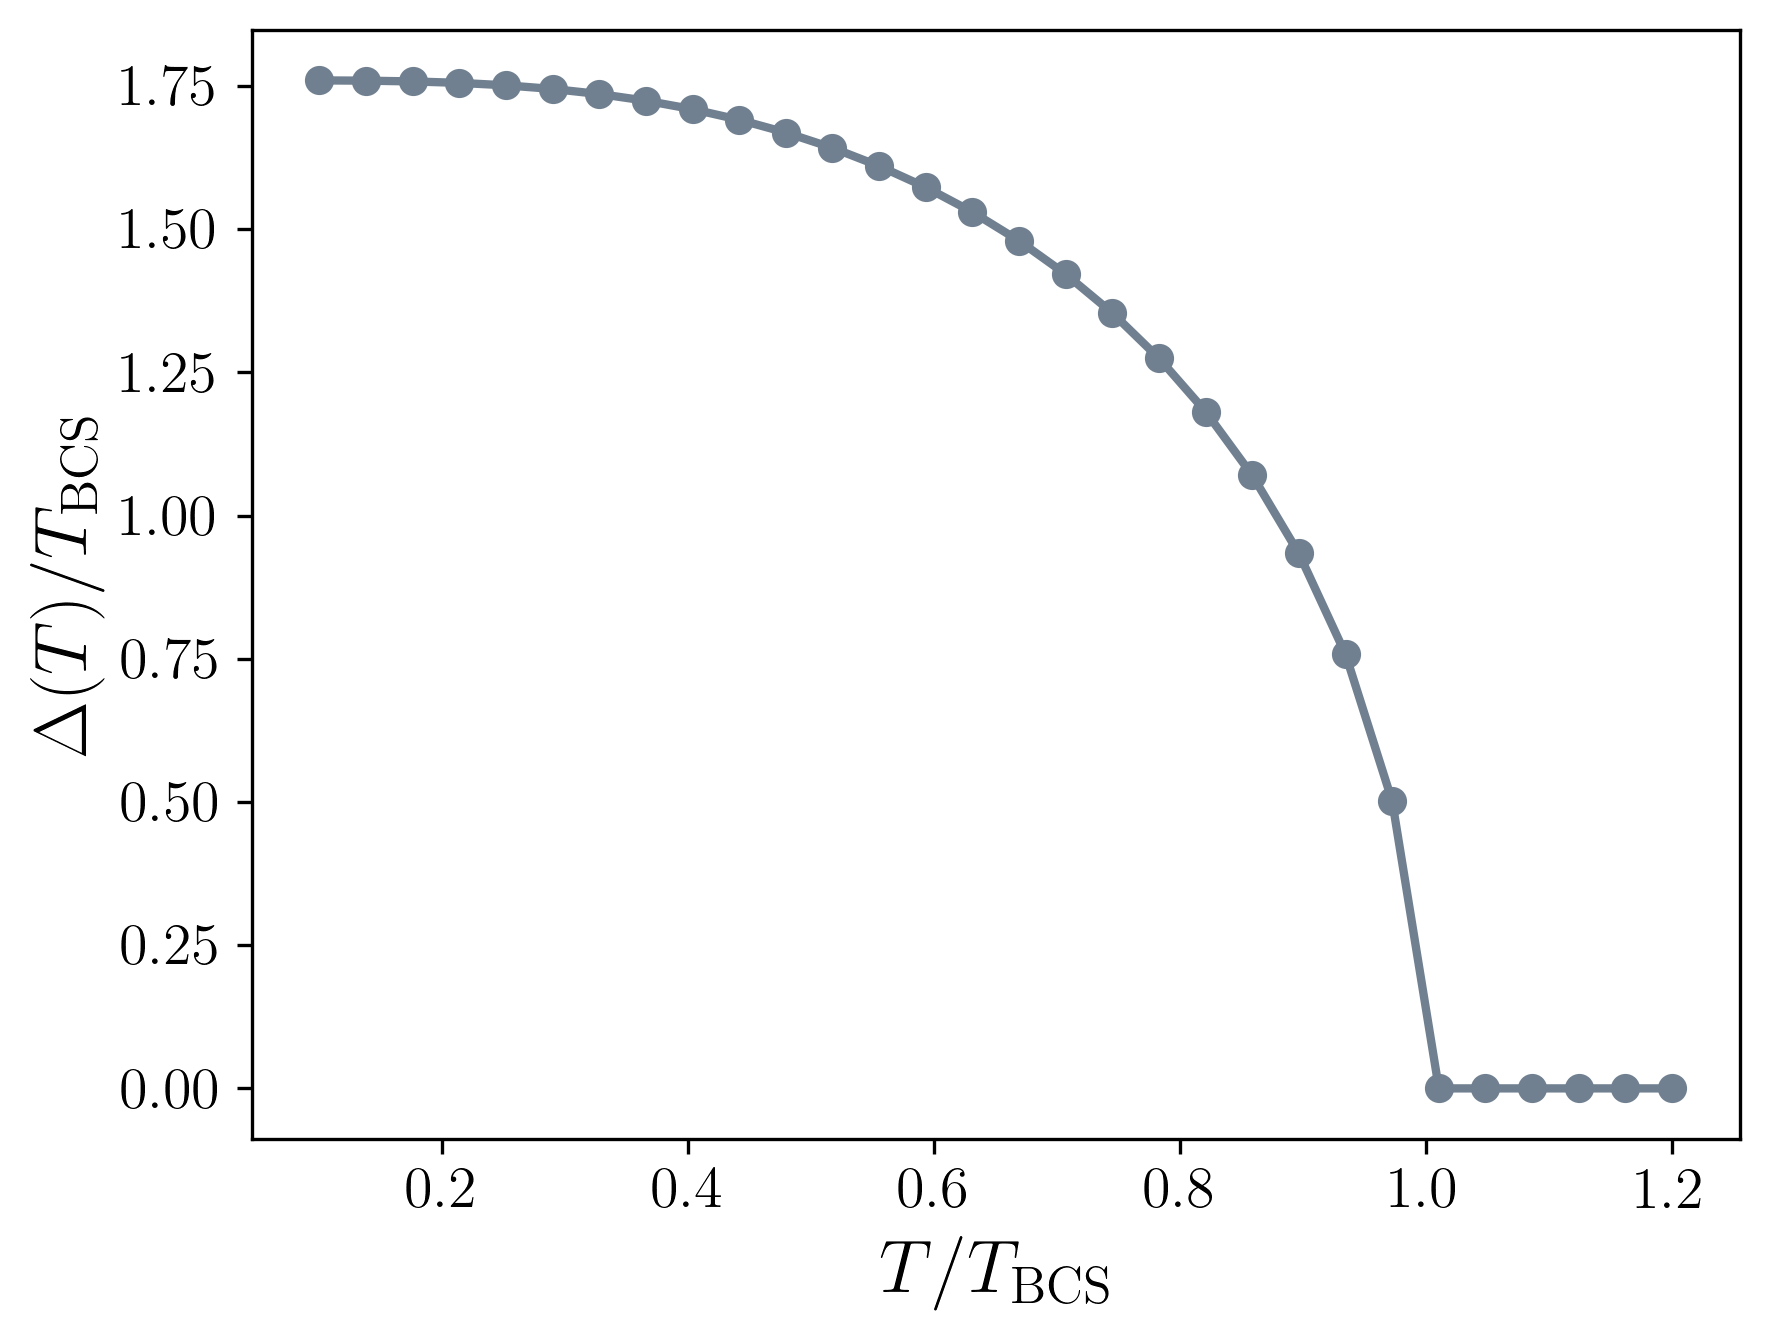

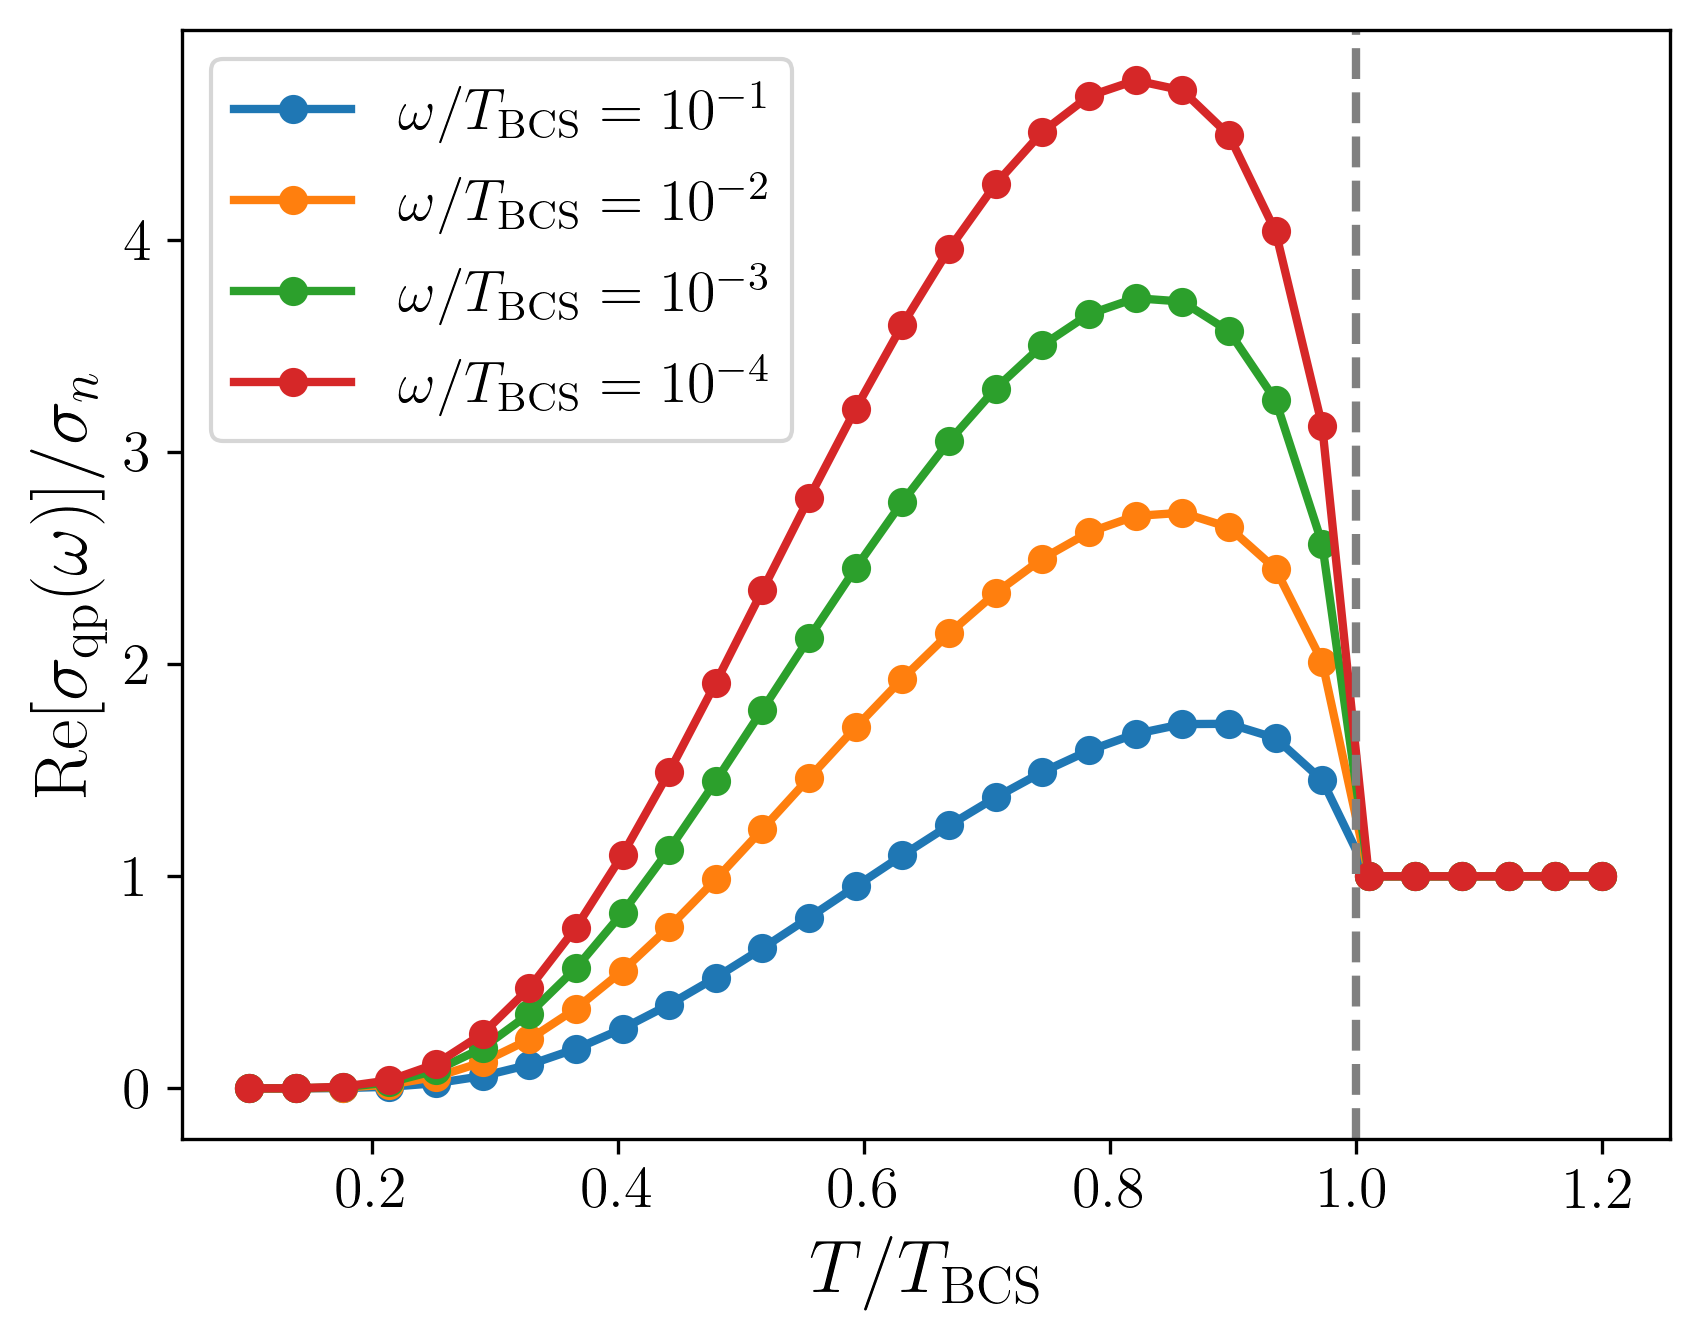

In [21]:
plt.plot(ts,delts,color=mclr.CSS4_COLORS['slategray'])
plt.xlabel(r'$T/T_{\rm BCS}$')
plt.ylabel(r'$\Delta(T)/T_{\rm BCS}$')

if saveFigs:
    plt.savefig(figDirectory+"/MB/BCSgap_vs_t.pdf",bbox_inches='tight')

plt.show()

plt.plot(ts,noises[0,:],label=r'$\omega/T_{\rm BCS} = 10^{-1}$')
plt.plot(ts,noises[1,:],label=r'$\omega/T_{\rm BCS} = 10^{-2}$')
plt.plot(ts,noises[2,:],label=r'$\omega/T_{\rm BCS} = 10^{-3}$')
plt.plot(ts,noises[3,:],label=r'$\omega/T_{\rm BCS} = 10^{-4}$')
plt.axvline(1.,linestyle='dashed',color='gray',marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BCS}$')
plt.ylabel(r'$\mathrm{Re}[\sigma_{\rm qp}(\omega)]/\sigma_n$')

if saveFigs:
    plt.savefig(figDirectory+"/MB/MB_sigma_vs_t.pdf",bbox_inches='tight')

plt.show()

In [22]:
delts = np.array([delta(t) for t in temps])

### Take w = 10^-5 Tc
w = 1.e-5

zindx = [0,3,6,9]
zpts = np.array([zs[n] for n in zindx ])

nzs = len(zpts)

noisesMB = np.zeros((nzs,numtemps))
for nz in range(nzs):
    z = zpts[nz]
    print(z)
    noisesMB[nz,:]= np.pi/2. * (temps[:]/TBKT)/(2.*z)**2* np.array([ noiseBQP(w,t) for t in temps])
    

1.0
10.0
100.0
1000.0


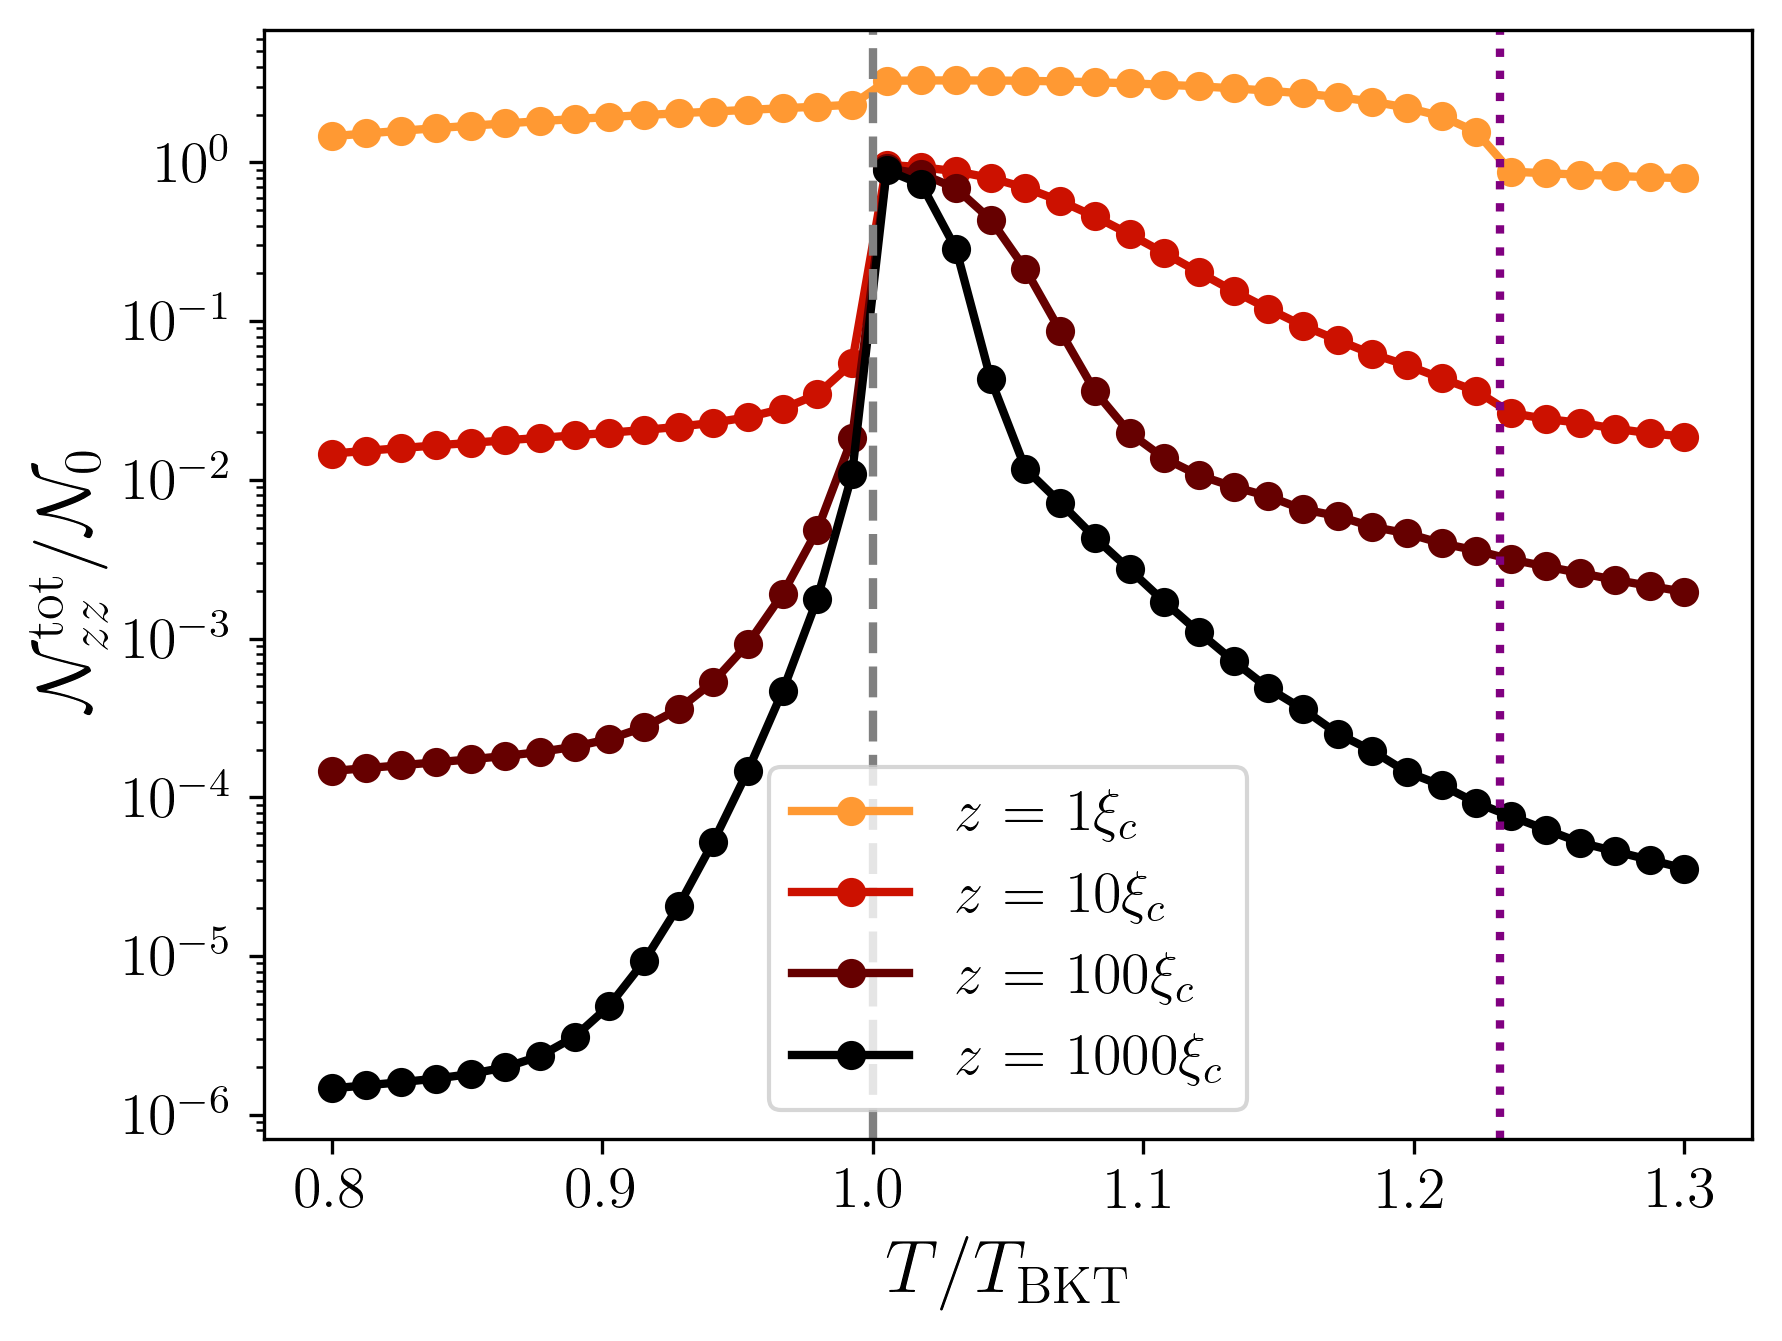

In [23]:
cs = cm.gist_heat(np.linspace(0.8,0.,nzs))
for nz in range(nzs):
    plt.plot(temps/TBKT,noisesMB[nz,:]+noise[:,zindx[nz],0] ,color=cs[nz],label=r'$z$ = '+" {ratio:0.0f}".format(ratio=zpts[nz])+r'$\xi_c$')
plt.axvline(1.,linestyle='dashed',color='gray',marker='none')
plt.axvline(1./TBKT,linestyle='dotted',color='purple',marker='none')
plt.legend()
plt.xlabel(r'$T/T_{\rm BKT}$')
plt.ylabel(r'$\mathcal{N}^{\rm tot}_{zz}/\mathcal{N}_0$')
plt.yscale('log')

if saveFigs:
    plt.savefig(figDirectory+"/MB/noise_total_vs_t.pdf",bbox_inches='tight')

plt.show()